#**GROUP 6**

1. Ishani Maitra
2. Noah, Nguyen Thanh Binh
3. Chen Jisen
4. Zoe

---

>[GROUP 6](#scrollTo=4_eor81J5d9f)

>[Dependencies](#scrollTo=Q8kFARBzdCRw)

>[Part 1](#scrollTo=9GTjjmUI1N1k)

>>[Momentum Strategy (Binh)](#scrollTo=qqt-6HRF3fdf)

>>>[Overall idea of the Pure Momentum strategy](#scrollTo=AFsApCKhZIIq)

>>>[Suplementary functions](#scrollTo=859Nv7bJ119D)

>>>[Layer 1: Using MACD to identify Long entries](#scrollTo=XDNXSjkXa4lp)

>>>[Layer 2: Adding the EMA 200/252 and Volume-Weighted Average Price 200/252](#scrollTo=l8OHOo9vbGWD)

>>>[Layer 3: Defining a customized momentrum strategy to anticipate the signficant Shorts and exploit them](#scrollTo=H1G5_rafbdXx)

>>[Mean-Reversion and Moving Average Strategies - ishani](#scrollTo=4o0Yk13t3lNY)

>>>>[Mean Reversion](#scrollTo=iIpgKgMVlv5R)

>>>>[Simple moving average](#scrollTo=uVdW5c6hjFQS)

>>>>[Exponetial moving average](#scrollTo=R3Qes8gJ4PE9)

>>>>[Combine EMA, SMA and Mean Reversion](#scrollTo=1kMaMFQQ6Xip)

>>[Machine Learning Strategy - Jisen](#scrollTo=E_oeFVkf1ok1)

>>>[Technical Indicators](#scrollTo=9fBFw0Jz4pxH)

>>>[All Models](#scrollTo=k1Jetv81xqeV)

>[Part 2](#scrollTo=0GmfW94S1hJi)

>>[Pure momentum strategy (Binh)](#scrollTo=YZpRTnLBujhK)

>>>[On the whole period](#scrollTo=c7QGkPM95vp1)

>>>[For the test set](#scrollTo=Vw-1C1Ji5zbB)

>>[Mean Reversion and Moving Average Strategies - ishani](#scrollTo=mQlah60QGJjN)

>>>[Mean reversion](#scrollTo=mG73GbptGNHn)

>>>[Simple moving average](#scrollTo=oLlzVsVTGX8K)

>>>[Exponential Moving Average](#scrollTo=I1Q36aj2GgNm)

>>>[Combined EMA, SMA, and Mean Reversion](#scrollTo=0TICIKjSGq2Z)

>>[Machine Learning Strategy - Jisen](#scrollTo=NZt9T0VEIWkE)

>>>[Sharpe Ratio, CAGR and MDD Performance](#scrollTo=tUbG5MT04eOC)

>>>[MDD Visualization](#scrollTo=hKDA8eWD4_IQ)

>>>[Strategy Return Visualization](#scrollTo=BYiEFb8H7LWH)

>[Part 3 - Zuoyu](#scrollTo=uvvm1AGZ1itJ)

>>[Executive summary of strategies](#scrollTo=vUuapCRpsMuG)

>>>[Momentum Strategy](#scrollTo=5HJPaQ6xvi1V)

>>>[Mean-Reversion Strategy](#scrollTo=zuc62R_ouEbA)

>>>[Machine Learning Strategy](#scrollTo=nW1hWgCmuNeg)

>>[Sharpe Ratio](#scrollTo=gqYybVnHUT0U)

>>[Compound annual growth rate](#scrollTo=-IxZ7FOaUVjT)

>>[Maximum drawdown](#scrollTo=kl1TWLnbUdQU)

>>[Total Compare (Recommendation)](#scrollTo=3BEiMr-mrPo8)

>[Part 4](#scrollTo=28OdWl781kV-)

>>[Data discussion - Ishani](#scrollTo=SA4HzjZf-Oe-)

>>[Mean-Reversion and Moving Average Strategies critique - Ishani](#scrollTo=2NMjW30VD5ti)

>>[Pure Momentum Strategy Discussions (Binh)](#scrollTo=jWTy6_n8Y-dh)

>>[Machine Learning Strategy - Jisen](#scrollTo=FjO__LsBPvxB)

>>>[Self-Critique of Machine Learning Models](#scrollTo=FjO__LsBPvxB)

>>>>[Random Forest](#scrollTo=FjO__LsBPvxB)

>>>>[Gradient Boosting](#scrollTo=FjO__LsBPvxB)

>>>>[Logistic Regression](#scrollTo=FjO__LsBPvxB)

>>>>[SVM (Support Vector Machine)](#scrollTo=FjO__LsBPvxB)

>>>>[Decision Tree](#scrollTo=FjO__LsBPvxB)

>>>>[Extra Trees](#scrollTo=FjO__LsBPvxB)

>>>>[General Observations and Critique](#scrollTo=FjO__LsBPvxB)

>[Contribution](#scrollTo=QkZOc3na4cj7)

>>[Ishani](#scrollTo=4CH-H3V34iAB)

>>[Noah (Binh)](#scrollTo=GwsX4jUI4h1A)

>>[Jisen](#scrollTo=JV_oecD-4hv_)

>>[Zuoyu](#scrollTo=YSn9ubkt4hnT)



---
#**Dependencies**

In [ ]:
!pip install yfinance==0.2.40
!pip install lets_plot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.49
    Uninstalling yfinance-0.2.49:
      Successfully uninstalled yfinance-0.2.49
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 1.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import inspect

import pandas_datareader.data as web
from pandas_datareader import data as pdr

from datetime import date
from datetime import datetime as dt, timedelta
import yfinance as yf

import re

import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [3]:
np.set_printoptions(precision = 3)

plt.style.use("ggplot")

mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "grey"
mpl.rcParams["grid.alpha"] = 0.25

mpl.rcParams["axes.facecolor"] = "white"

mpl.rcParams["legend.fontsize"] = 14
%matplotlib inline

---
#**Part 1**

##**Momentum Strategy (Binh)**

### 1. Overall idea of the Pure Momentum strategy

In [ ]:
SPY_momentum = yf.download('SPY', start='2005-11-01', end='2024-10-30')
# I will use all the price data for my later logics
SPY_momentum.head(2)

[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close  Adj Close  \
Date                                                                    
2005-11-01  120.580002  120.900002  120.220001  120.489998  83.991127   
2005-11-02  120.169998  121.750000  120.129997  121.750000  84.869469   

              Volume  
Date                  
2005-11-01  66365100  
2005-11-02  74012300

<Axes: xlabel='Date'>

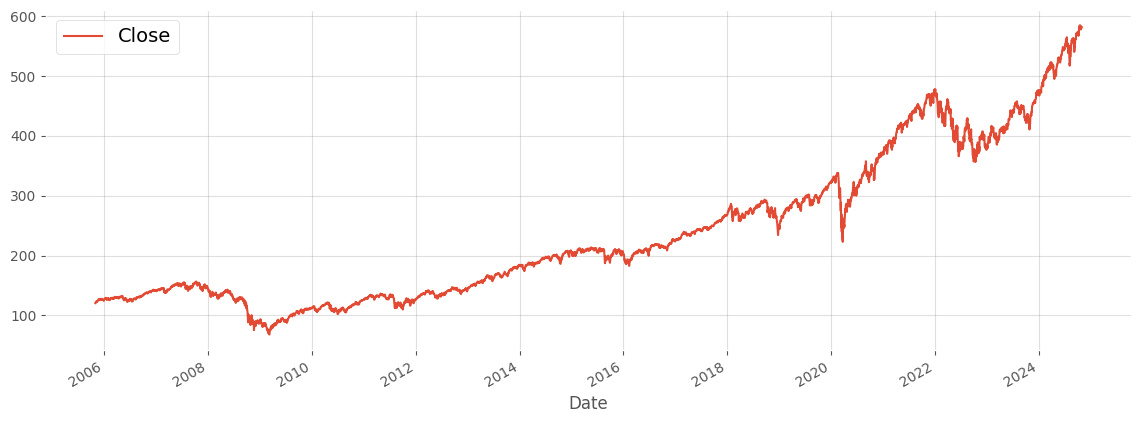

In [ ]:
SPY_momentum[['Close']].plot(figsize = (14,5))

In [ ]:
momentum_train, momentum_test = (test_train
                                 (SPY_momentum, 0.75))

* Overall the `SPY` displays an upward trend. Hence the momentum strategy using long-term parameters may work.
* We can see that there are some significant drops at the end of each cycle, prior to the occurence of a new cycle. Hence my idea is 1) first find strategies that maximize the Long entry, and 2) then add upper layers to hedge against these drops, or even exploit Short positions to maximize our wealth.
* So my proposed development is:\
a. First, employing MACD and tune the parameters to maximize the Long oppportunities.\
b. Identify the weaknesses of MACD and then add another strategy, such as the EWMA or VWAP to correct the MACD weaknesses.\
c. Find a strategy to hedge against the significant drops to minimize the Drawdowns and take Short opportunities during downward trends.
* Also, I use the Volume-weighted Average Prices (VWAP) which accounts for the movements of volume overtime. A change in price that is accompanied by volume may indicate more convicing signals.

### Suplementary functions

In [ ]:
def strategy_positions(df, signal_col='MACD_Combined_Signals', strategy='long_short'):
    """
    Updates the Positions column based on the specified strategy.
    The reason why I do this because I don't want to put everything into a function.
    """

    df = df.copy()
    df['Positions'] = 0  # Initialize Positions to neutral value (0)

    # Iterate through the DataFrame for position logic
    for i in range(1, len(df)):
        prev_position = df['Positions'].iloc[i - 1]
        prev_signal = df[signal_col].iloc[i - 1]

        if strategy == 'long_only': # only take the long sides
            if prev_position == 0 and prev_signal == 1:
                df['Positions'].iloc[i] = prev_signal  # Enter long position
            elif prev_position == 1 and prev_signal == -1:
                df['Positions'].iloc[i] = 0  # Exit position
            else:
                df['Positions'].iloc[i] = prev_position

        elif strategy == 'short_only': # only take the short sides
            if prev_position == 0 and prev_signal == -1:
                df['Positions'].iloc[i] = prev_signal  # Enter short position
            elif prev_position == -1 and prev_signal == 1:
                df['Positions'].iloc[i] = 0  # Exit position
            else:
                df['Positions'].iloc[i] = prev_position

        elif strategy == 'long_short': # take both sides
            if prev_position == 0 and prev_signal in [1, -1]:
                df['Positions'].iloc[i] = prev_signal  # Enter long or short position
            elif prev_position == 1 and prev_signal == -1:
                df['Positions'].iloc[i] = 0  # Exit long position
            elif prev_position == -1 and prev_signal == 1:
                df['Positions'].iloc[i] = 0  # Exit short position
            else:
                df['Positions'].iloc[i] = prev_position  # Maintain current position

    return df

In [ ]:
def strategy_summary(df, date_col='Date', positions='Positions', price_col='Price', strategy='long_only',
                     drawdown='max', timeframe=1, initial_capital=100000, plot=False):
    """
    Calculate some basic performance metrics as well as cumulative equity based on initial capital.
    """
    # ======== Strategy Calculation Section ========
    df['Price Return'] = np.log(df[price_col] / df[price_col].shift(1))
    df['Price Cum Return'] = df['Price Return'].cumsum().apply(np.exp)

    if strategy == 'long_only':
        current_position = df[positions].apply(lambda x: x if x > 0 else 0)
    elif strategy == 'short_only':
        current_position = df[positions].apply(lambda x: x if x < 0 else 0)
    elif strategy == 'long_short':
        current_position = df[positions]
    else:
        raise ValueError("Invalid strategy. Choose from 'long_only', 'short_only', or 'long_short'.")

    df['Strategy Return'] = df['Price Return'] * current_position
    df['Strategy Cum Return'] = df['Strategy Return'].cumsum().apply(np.exp)

    # Cumulative Equity Calculation
    df['Cumulative Equity'] = initial_capital * df['Strategy Cum Return']

    df['High Watermark'] = df['Strategy Cum Return'].cummax()
    df['Drawdown'] = (df['Strategy Cum Return'] - df['High Watermark']) / df['High Watermark']
    df['Max Drawdown'] = df['Drawdown'].cummin()

    # ======== Drawdown Calculation Section ========
    if df.index.name != date_col:
        df = df.set_index(date_col)

    if drawdown == 'current':
        last_zero_drawdown_date = df[df['Drawdown'] == 0].index[-1]
        current_drawdown_period = (df.index[-1] - last_zero_drawdown_date).days
        longest_drawdown_period_days = current_drawdown_period
        longest_drawdown_start = last_zero_drawdown_date
        longest_drawdown_end = df.index[-1]
    else:
        zero_drawdown_dates = df[df['Drawdown'] == 0].index
        if len(zero_drawdown_dates) > 1:
            drawdown_periods = [
                (zero_drawdown_dates[i], zero_drawdown_dates[i + 1])
                for i in range(len(zero_drawdown_dates) - 1)
            ]
            drawdown_durations = [(end - start).days for start, end in drawdown_periods]
            longest_drawdown_idx = np.argmax(drawdown_durations)
            longest_drawdown_period_days = drawdown_durations[longest_drawdown_idx]
            longest_drawdown_start, longest_drawdown_end = drawdown_periods[longest_drawdown_idx]
        else:
            longest_drawdown_period_days = 0
            longest_drawdown_start = None
            longest_drawdown_end = None

    max_drawdown = df['Drawdown'].min()

    if date_col != df.index.name:
        df = df.reset_index()

    # ======== Analytics Section ========
    analytics = pd.Series({
        'Sharpe Ratio': round(np.sqrt(252 * timeframe) * (df['Strategy Return'].mean() / df['Strategy Return'].std()), 2),
        'Price Cumulative Return (%)': round((df['Price Cum Return'].iloc[-1] - 1) * 100, 2),
        'Strategy Cumulative Return (%)': round((df['Strategy Cum Return'].iloc[-1] - 1) * 100, 2),
        'Price CAGR (%)': round((df['Price Cum Return'].iloc[-1] ** (252 * timeframe / len(df)) - 1) * 100, 2),
        'Strategy CAGR (%)': round((df['Strategy Cum Return'].iloc[-1] ** (252 * timeframe / len(df)) - 1) * 100, 2),
        'Max Drawdown (%)': round(max_drawdown * 100, 2),
        'Longest Drawdown Period': f"{longest_drawdown_period_days} days" if longest_drawdown_period_days else "None",
        'Longest Drawdown Start Date': longest_drawdown_start.date() if longest_drawdown_start else "N/A",
        'Longest Drawdown End Date': longest_drawdown_end.date() if longest_drawdown_end else "N/A",
        'Cumulative Equity': round(df['Cumulative Equity'].iloc[-1], 2)  # Final cumulative equity
    })

    analytics_df = analytics.to_frame(name=strategy)

    # ======== Plotting Section ========
    if plot:
        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        df[['Price Return', 'Strategy Return']].plot(ax=axes[0, 0], style=['grey', 'orange'])
        axes[0, 0].set_title("Price Return vs Strategy Return")
        axes[0, 0].grid(True, alpha=0.3)

        df[['Price Cum Return', 'Strategy Cum Return']].plot(ax=axes[0, 1], style=['grey', 'orange'])
        axes[0, 1].set_title("Price Cum Return vs Strategy Cum Return")
        axes[0, 1].grid(True, alpha=0.3)

        df[['High Watermark']].plot(ax=axes[1, 0], style='darkblue', lw=1.5)
        df[['Strategy Cum Return']].plot(ax=axes[1, 0], style='orange')
        axes[1, 0].set_title("High Watermark vs Strategy Cum Return")
        axes[1, 0].grid(True, alpha=0.3)

        df['Drawdown'].plot(ax=axes[1, 1], color='red', alpha=0.7)
        axes[1, 1].fill_between(df.index, df['Drawdown'], color='red', alpha=0.3)
        axes[1, 1].set_title("Drawdowns")
        axes[1, 1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    return df, analytics_df

### Layer 1: Using MACD to identify Long entries

In [ ]:
def macd_strategy(df, price='Close', short_ema=12, long_ema=26, signal_ema=9,
                  min_periods=None, upper_MACD=1500, lower_MACD=-1500,
                  cross_days=3, plot=False, plot_window=None):

    """
    From the basic MACD strategy, I extend the function to make it more dynamic
    """

    df_macd = df.copy()

    # Step 1: Set column names
    ema_short_col = f'EMA_{short_ema}'
    ema_long_col = f'EMA_{long_ema}'
    macd_col = f'MACD_{short_ema}_{long_ema}'
    macd_signal_col = f'MACD_line_{signal_ema}'
    macd_signal_name = f"MACD_Signals_{short_ema}_{long_ema}_{signal_ema}"
    long_term_macd_col = f'Long_term_MACD_{short_ema}_{long_ema}_{signal_ema}'

    # Step 2: Calculate the short and long EMAs
    df_macd[ema_short_col] = df_macd[price].ewm(span=short_ema, min_periods=min_periods, adjust=False).mean()
    df_macd[ema_long_col] = df_macd[price].ewm(span=long_ema, min_periods=min_periods, adjust=False).mean()

    # Step 3: Calculate the MACD and Signal Line
    df_macd[macd_col] = df_macd[ema_short_col] - df_macd[ema_long_col]
    df_macd[macd_signal_col] = df_macd[macd_col].ewm(span=signal_ema, min_periods=min_periods, adjust=False).mean()

    # Step 4: Drop initial NA values to remove noise before generating signals
    df_macd.dropna(inplace=True)

    # Step 5: Generate Basic MACD Cross signals
    df_macd[macd_signal_name] = np.where(df_macd[macd_col] > df_macd[macd_signal_col], 1, -1)

    # Step 6: Initialize Long-term MACD signal column
    df_macd[long_term_macd_col] = np.nan

    # Step 7: Long-term entry logic based on MACD crossover (after some experiments)
    for i in range(max(21, cross_days), len(df_macd)):
        # SHORT Signal
        if (df_macd[macd_col].iloc[i - cross_days] > upper_MACD) and \
           all(df_macd[macd_col].iloc[i - j] < df_macd[macd_signal_col].iloc[i - j] for j in range(cross_days)):
            df_macd.at[df_macd.index[i], long_term_macd_col] = -1

        # LONG Signal
        elif (df_macd[macd_col].iloc[i - cross_days] < lower_MACD) and \
             all(df_macd[macd_col].iloc[i - j] > df_macd[macd_signal_col].iloc[i - j] for j in range(cross_days)) and \
             (df_macd[macd_col].iloc[i] == df_macd[macd_col].iloc[i - 15:i + 1].max()):
            df_macd.at[df_macd.index[i], long_term_macd_col] = 1

    # Fill remaining NaN values in Long_term_MACD with 0
    df_macd[long_term_macd_col].fillna(0, inplace=True)

    # ======== Plot if requested ========
    if plot:
        plot_data = df_macd if plot_window is None else df_macd.tail(plot_window)

        # Adjust height_ratios
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [3, 2]}, sharex=True)

        # Plot Price with Long-term MACD signals on primary axis
        ax1.plot(plot_data.index, plot_data[price], label=f'Price ({price})', color='black', lw=1.5)

        # Apply shading
        min_price = plot_data[price].min()
        max_price = plot_data[price].max()

        ax1.fill_between(plot_data.index, min_price, max_price,
                         where=(plot_data[long_term_macd_col] == 1), color='green', alpha=0.8, label="Long-term MACD Long")
        ax1.fill_between(plot_data.index, min_price, max_price,
                         where=(plot_data[long_term_macd_col] == -1), color='red', alpha=0.8, label="Long-term MACD Short")

        # Set title and labels
        fig.suptitle(f"{price.upper()} and MACD({short_ema}, {long_ema}, {signal_ema}) Long-term Entry Signals",
                      fontsize=14, color='darkblue')
        ax1.set_ylabel("Price")
        ax1.legend(loc='upper left')
        ax1.grid(True, alpha=0.3)

        # Plot MACD and MACD Signal line
        ax2.plot(plot_data.index, plot_data[macd_col], label=f'MACD Line ({short_ema}, {long_ema})', color='blue', lw=1.5)
        ax2.plot(plot_data.index, plot_data[macd_signal_col], label=f'MACD Signal Line ({signal_ema})', color='orange', lw=1.5)
        ax2.axhline(0, color='red', linestyle='--', lw=1, alpha=0.5)
        ax2.set_ylabel("MACD Value")
        ax2.legend(loc='upper left')
        ax2.grid(True, alpha=0.3)

        plt.xlabel("Date")
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    return df_macd

In [ ]:
def macd_combined_signals(df, entry_col='Long_term_MACD_12_26_9', new_col='MACD_Combined_Signals', plot=False,
                          macd_col='MACD_12_26', macd_signal_col='MACD_line_9',
                          price='Close', plot_window=None):
    """
    The macd_strategy function is to identify the entry, while this function is used to define maintained positions
    """

    # Initialize new_col and MACD_1st_entry
    df[new_col] = np.nan
    df['MACD_1st_entry'] = np.nan

    # Step 1: Assign initial entries to `MACD_1st_entry` and `new_col`
    df.loc[df[entry_col] == 1, 'MACD_1st_entry'] = 1
    df.loc[df[entry_col] == -1, 'MACD_1st_entry'] = -1
    df[new_col] = df['MACD_1st_entry']  # where Long-term MACD tells 1/-1, then that is the 1st entry

    # Step 2: Fill remaining NaNs in `MACD_1st_entry` with 0
    df['MACD_1st_entry'].fillna(0, inplace=True)

    # Step 3: Forward-fill to maintain 100% position hold
    df[new_col] = df[new_col].ffill()

    # Step 4: Set remaining NaN values at the start of `new_col` to 0
    df[new_col] = df[new_col].fillna(0)

    # Plotting section
    if plot:
        plot_data = df if plot_window is None else df.tail(plot_window)

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [3, 2]}, sharex=True)
        fig.suptitle(f"{price.upper()} and MACD Combined Signals", fontsize=14, color='darkblue')

        # Plot price with entry zones
        ax1.plot(plot_data.index, plot_data[price], color="black", lw=1.5, label=f"Price ({price})")
        ax1.fill_between(plot_data.index, plot_data[price].min(), plot_data[price].max(),
                         where=plot_data[entry_col] == 1, color="green", alpha=0.8, label="Long-term MACD Long")
        ax1.fill_between(plot_data.index, plot_data[price].min(), plot_data[price].max(),
                         where=plot_data[entry_col] == -1, color="red", alpha=0.8, label="Long-term MACD Short")

        # Applying shading
        ax1.fill_between(plot_data.index, plot_data[price].min(), plot_data[price].max(),
                         where=plot_data[new_col] > 0, color="green", alpha=0.2, label="Long Zone")
        ax1.fill_between(plot_data.index, plot_data[price].min(), plot_data[price].max(),
                         where=plot_data[new_col] < 0, color="red", alpha=0.2, label="Short Zone")

        ax1.set_ylabel("Price")
        ax1.legend(loc='upper left')
        ax1.grid(True)

        # Plot MACD and signal line
        ax2.plot(plot_data.index, plot_data[macd_col], label="MACD", color="blue", lw=1.2)
        ax2.plot(plot_data.index, plot_data[macd_signal_col], label="MACD Signal", color="orange", lw=1.2)
        ax2.axhline(0, color="black", linestyle="--", lw=0.5)
        ax2.set_ylabel("MACD Value")
        ax2.legend(loc='upper left')
        ax2.grid(True)

        plt.tight_layout()
        plt.xlabel("Date")
        plt.show()

    return df

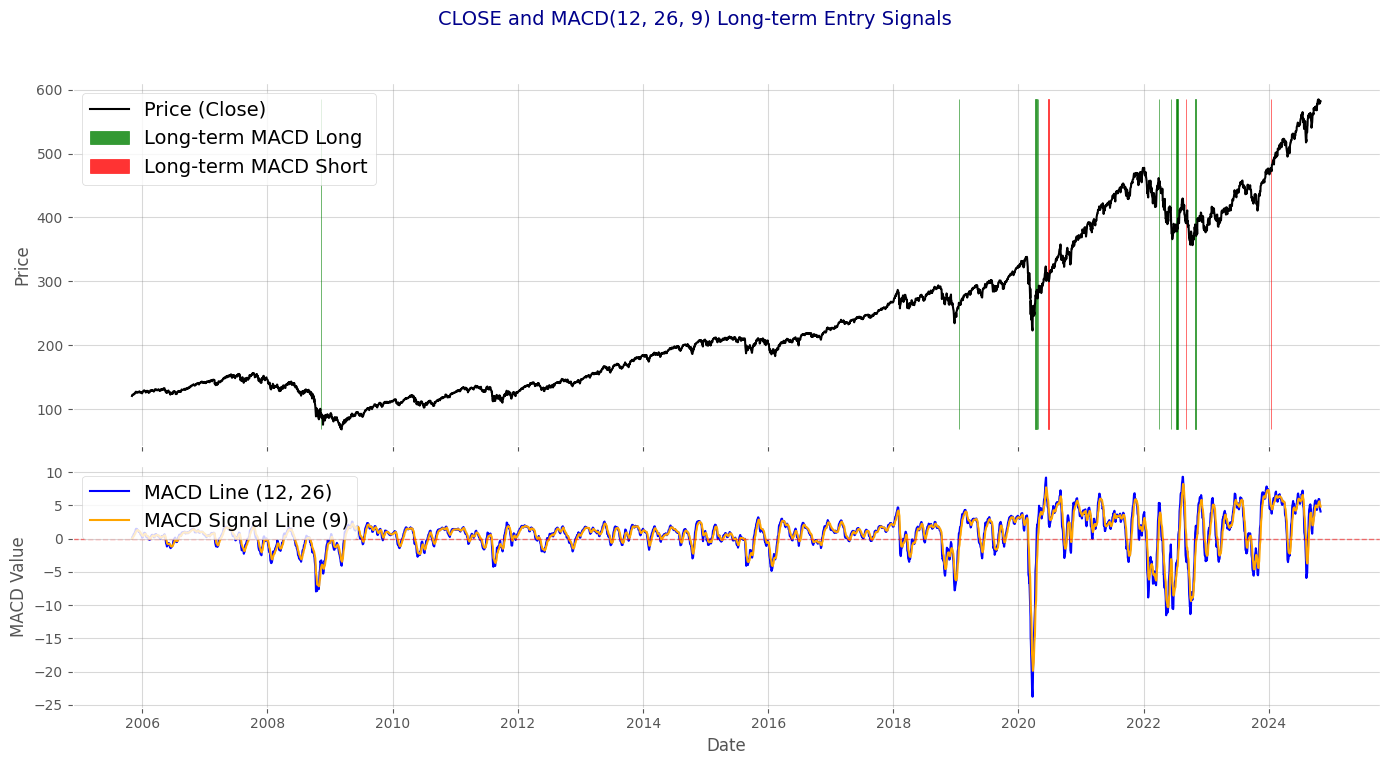

In [ ]:
SPY_macd_entry = (macd_strategy(
    SPY_momentum, price = 'Close', short_ema=12, long_ema=26, signal_ema=9,min_periods=None,
    upper_MACD=7, lower_MACD=-5, cross_days=10, plot=True, plot_window=None))

In [ ]:
SPY_macd_signals = (
    macd_combined_signals(SPY_macd_entry, entry_col='Long_term_MACD_12_26_9', new_col='MACD_Combined_Signals',
                          plot = False, macd_col='MACD_12_26', macd_signal_col='MACD_line_9',
                              price='Close'))

In [ ]:
SPY_macd_positions = (strategy_positions(SPY_macd_signals, signal_col='MACD_Combined_Signals',
                                   strategy='long_only'))

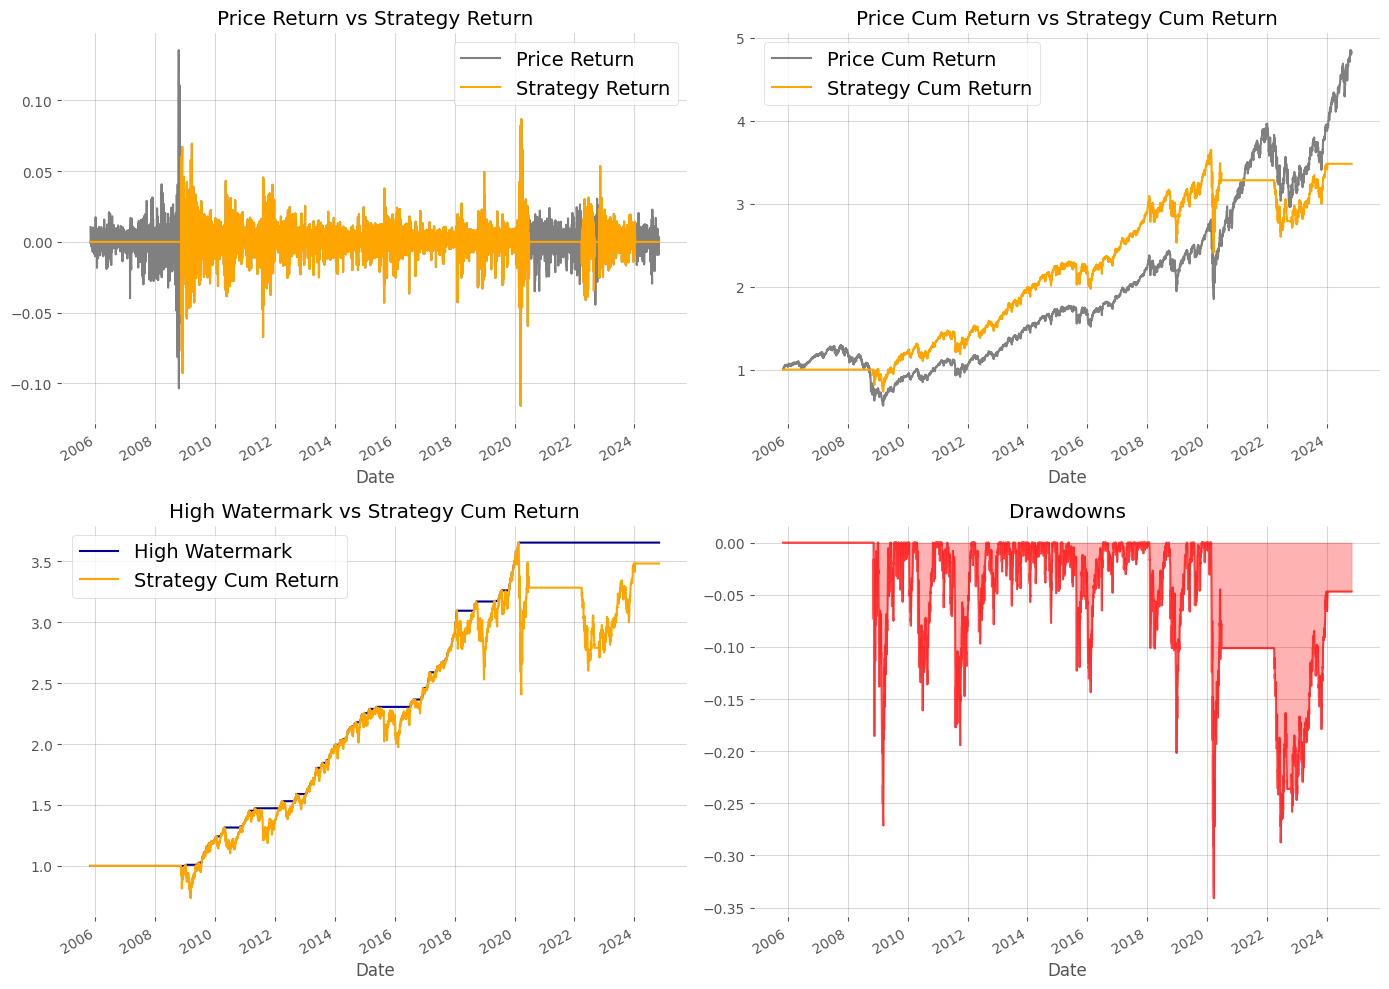

In [ ]:
SPY_macd_calc, SPY_macd_metrics = (
    strategy_summary(SPY_macd_positions, date_col='Date', positions='Positions', price_col='Close',
                     strategy='long_only', drawdown='current', timeframe=1, plot=True))

* We can see that the `MACD_strategy` with these parameters (tuned already) faces a trade off between decent Long entries with poor Short entries. At this point I decide to employ the EMA 200, 252 days strategy to enhance the performance (based on some logics and experience).

### Layer 2: Adding the EMA 200/252 and Volume-Weighted Average Price 200/252

In [ ]:
def trend_252(data, price_col='Close', high_col='High', low_col='Low', volume_col='Volume',
              threshold=0.03, plot=False, plot_window=None):
    """
    Calculate rolling EMA for 200 and 252 days and assign combined trend signals.
    I use both Close price and Average price of HLC to ensure consistency.
    It can be more accurate if we use high frequency data to calculate the volume-weighted average price of the day.
    Adds a % threshold condition for long/short signals.
    The logic is: 1) the consistency of slope of the EMAs, 2) price must cross these lines to a defined extent
    """
    df = data.copy()

    # Average Price
    df['Average_Price'] = (df[high_col] + df[low_col] + df[price_col]) / 3

    # EMA of the average prices
    df['EWM_200'] = df['Average_Price'].ewm(span=200, adjust=False).mean()
    df['EWM_252'] = df['Average_Price'].ewm(span=252, adjust=False).mean()

    # EMA of the close prices
    df['EMA_200'] = df[price_col].ewm(span=200, adjust=False).mean()
    df['EMA_252'] = df[price_col].ewm(span=252, adjust=False).mean()

    # Slopes (raw differences)
    df['Slope_EWM_200'] = df['EWM_200'].diff()
    df['Slope_EWM_252'] = df['EWM_252'].diff()
    df['Slope_EMA_200'] = df['EMA_200'].diff()
    df['Slope_EMA_252'] = df['EMA_252'].diff()

    # Additional Conditions with % Threshold
    df['Above_Threshold'] = (df[price_col] > (1 + threshold) * df['EWM_200']) & (df[price_col] > (1 + threshold) * df['EWM_252']) & \
                            (df[price_col] > (1 + threshold) * df['EMA_200']) & (df[price_col] > (1 + threshold) * df['EMA_252'])
    df['Below_Threshold'] = (df[price_col] < (1 - threshold) * df['EWM_200']) & (df[price_col] < (1 - threshold) * df['EWM_252']) & \
                            (df[price_col] < (1 - threshold) * df['EMA_200']) & (df[price_col] < (1 - threshold) * df['EMA_252'])

    # Trend Signal
    df['Trend_252_Combined_Signals'] = np.nan
    uptrend_condition = (df['Slope_EWM_200'] > 0) & (df['Slope_EWM_252'] > 0) & \
                        (df['Slope_EMA_200'] > 0) & (df['Slope_EMA_252'] > 0) & \
                        df['Above_Threshold'] & df['Above_Threshold'].shift(1)
    downtrend_condition = (df['Slope_EWM_200'] < 0) & (df['Slope_EWM_252'] < 0) & \
                          (df['Slope_EMA_200'] < 0) & (df['Slope_EMA_252'] < 0) & \
                          df['Below_Threshold'] & df['Below_Threshold'].shift(1)

    df.loc[uptrend_condition, 'Trend_252_Combined_Signals'] = 1
    df.loc[downtrend_condition, 'Trend_252_Combined_Signals'] = -1
    df['Trend_252_Combined_Signals'] = df['Trend_252_Combined_Signals'].fillna(method='ffill').fillna(0)

    # Plot if required
    if plot:
        plot_data = df if plot_window is None else df.tail(plot_window)
        min_price = plot_data[price_col].min()
        max_price = plot_data[price_col].max()

        plt.figure(figsize=(13, 6))
        plt.plot(plot_data[price_col], label='Price', color='black', linewidth=1)
        plt.plot(plot_data['EWM_200'], label='EWM 200', color='blue', linestyle='--')
        plt.plot(plot_data['EWM_252'], label='EWM 252', color='cyan', linestyle='--')
        plt.plot(plot_data['EMA_200'], label='EMA 200', color='green', linestyle='-')
        plt.plot(plot_data['EMA_252'], label='EMA 252', color='orange', linestyle='-')

        plt.fill_between(plot_data.index, min_price, max_price,
                         where=(plot_data['Trend_252_Combined_Signals'] == 1), color='green', alpha=0.4, label='EWM/EMA 200/252 Long Entry')
        plt.fill_between(plot_data.index, min_price, max_price,
                         where=(plot_data['Trend_252_Combined_Signals'] == -1), color='red', alpha=0.4, label='EWM/EMA 200/252 Short Entry')

        plt.title(f'Price ({price_col}) and EWM/EMA 200/252 Entries with {threshold*100}% Threshold', color='darkblue', fontsize=14)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend(loc='upper left', fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    return df

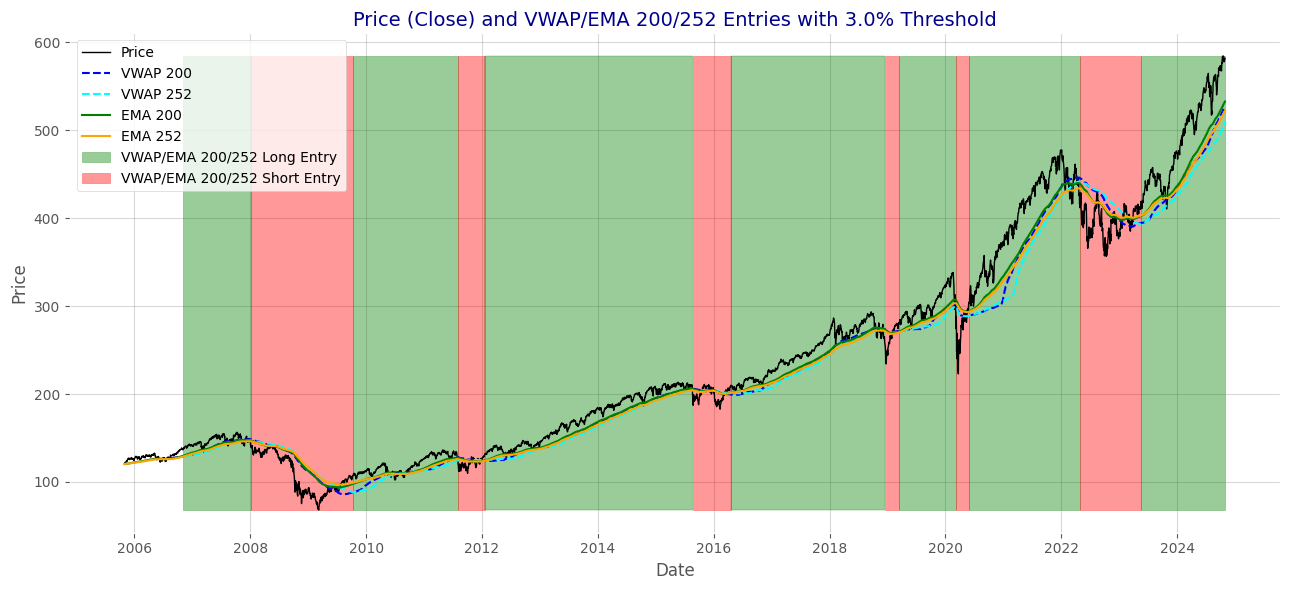

In [ ]:
SPY_trend_252 = trend_252(SPY_momentum, price_col='Close', volume_col='Volume',
                          threshold=0.03, plot = True, plot_window = None)

* Comparing with MACD, I see that this `trend_252` strategy can complement `MACD_strategy`. As mentioned aboved, the weakness of `MACD_strategy` is its Short signals. Hence I set a logic here: use the Long signals of `MACD_strategy`; but for those positions that MACD say Short while `trend_252` say Long, then corrected that as Long.

In [ ]:
def merge_strategy_long_override(df1, df2, col_1st, col_2nd, price_col, plot=False, plot_window=None):
    """
    Merge signals from two strategies:
    - 1st loop: Bring all signals from the first strategy.
    - 2nd loop: Override with long signals (1) if the second strategy says 1 while the first says -1.
    """
    df1 = df1.copy()
    df2 = df2.copy()
    merged_df = pd.DataFrame(index=df1.index)

    # Merge the price column for reference
    merged_df[price_col] = df1[price_col]

    # Initialize the combined signals column
    merged_df['Merge_signals_long_override'] = df1[col_1st]

    # Override with 1 if the first strategy says -1 and the second says 1
    merged_df.loc[(merged_df['Merge_signals_long_override'] == -1) & (df2[col_2nd] == 1), 'Merge_signals_long_override'] = 1

    # Plot if required
    if plot:
        plot_data = merged_df if plot_window is None else merged_df.tail(plot_window)
        min_price = plot_data[price_col].min()
        max_price = plot_data[price_col].max()

        plt.figure(figsize=(13, 6))
        plt.plot(plot_data[price_col], label='Price', color='black', linewidth=1)

        plt.fill_between(plot_data.index, min_price, max_price,
                         where=(plot_data['Merge_signals_long_override'] == 1), color='green', alpha=0.4, label='Long Signals (Override by 2nd Strategy)')
        plt.fill_between(plot_data.index, min_price, max_price,
                         where=(plot_data['Merge_signals_long_override'] == -1), color='red', alpha=0.4, label='Short Signals (1st Strategy)')

        plt.title(f'Price ({price_col}) and Merged Signals (Long Override)', color='darkblue', fontsize=14)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend(loc='upper left', fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    return merged_df

In [ ]:
SPY_momentum_2_signals = merge_strategy_long_override(SPY_macd_signals, SPY_trend_252, 'MACD_Combined_Signals',
                   'Trend_252_Combined_Signals', 'Close', plot=False)

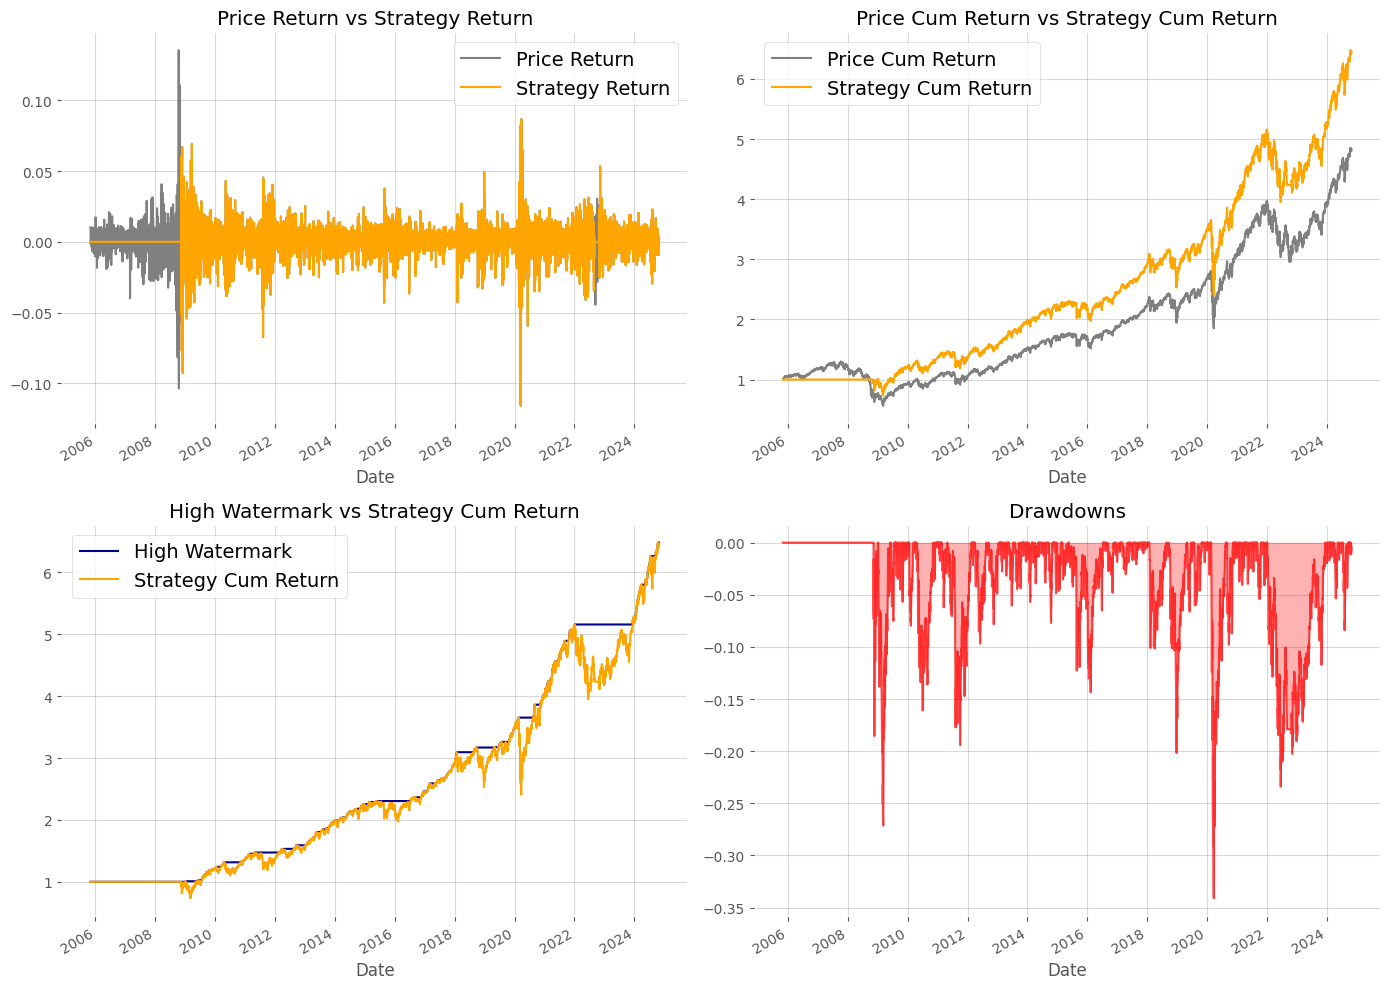

In [ ]:
SPY_momentum_2_pos = (strategy_positions(SPY_momentum_2_signals, signal_col='Merge_signals_long_override',
                                   strategy='long_only'))

SPY_momentum_2_calc, SPY_momentum_2_metrics = (
    strategy_summary(SPY_momentum_2_pos, date_col='Date', positions='Positions', price_col='Close',
                     strategy='long_only', drawdown='max', timeframe=1, plot=True))

* We can see that the performance has been improved. But the hybrid strategy has not covered decently the signficant drops in the years 2020 and 2022.
* At this point, with certain logics and intuitions, I think that if there is a point showing signficant spikes in return and volume, then we should not trade at that point but rather prefer to stay neutral. These points may reflect the 'black swans' and we do not want to be greedy there.
* Hence my idea is:\
a. Define a customized strategy to find points with spikes in return and volume to anticipate hedging at those points, by either liquidate the portfolio or use hedging techniques.\
b. Combine the hybrid strategy with the new strategy: 1) apply the Long signals of the above hybrid strategy, but 2) for points that the hybrid strategy says 1 while the newly customized strategys say -1 then correct that points as -1.

### Layer 3: Defining a customized momentrum strategy to anticipate the signficant Shorts and exploit them

In [ ]:
# I do log transform for all the OHLC data for my customized functions later

def log_return_calc(df, price_cols=['Open', 'High', 'Low', 'SP500'], volume_col='Volume'):
    """
    Calculate log returns for the given price columns while keeping the volume column unchanged.
    """
    log_return_df = df.copy()  # Create a copy to avoid modifying the original DataFrame

    # Calculate log returns for the specified columns
    for col in price_cols:
        log_return_df[f'Log_Return_{col}'] = np.log(log_return_df[col] / log_return_df[col].shift(1))

    # Keep the volume column unchanged
    log_return_df[volume_col] = df[volume_col]

    # Drop rows with NaN values resulting from the log return calculation
    log_return_df.dropna(inplace=True)

    return log_return_df

In [ ]:
def spike_strategy(df, price_col='SP500', log_return_col='Log_Return_SP500', volume_col='Volume',
                   ewma_days=10, short_threshold=None, long_threshold=None, volume_break_threshold=None,
                   plot=False, plot_window=None):
    """
    Spike strategy combining log return thresholds, volume EWMA, and volume break conditions.
    We use EMA of the Volume because I want to put more weight on recent volatility for these extreme cases
    """
    df_with_signals = df.copy()

    # Calculate EWMA of volume
    df_with_signals[f'Volume_EWMA_{ewma_days}'] = df_with_signals[volume_col].ewm(span=ewma_days, adjust=False).mean()

    # Calculate the volume break condition
    if volume_break_threshold is not None:
        df_with_signals['Volume_Break'] = df_with_signals[volume_col] > (1 + volume_break_threshold) * df_with_signals[f'Volume_EWMA_{ewma_days}']
    else:
        df_with_signals['Volume_Break'] = True  # Default to True if no threshold is set

    # Initialize signals column
    df_with_signals['Spike_Signals'] = 0

    # Apply short threshold logic with volume condition
    if short_threshold is not None:
        short_condition = (
            (df_with_signals[log_return_col] > short_threshold) &
            # (df_with_signals[log_return_col].shift(1) > short_threshold) &
            (df_with_signals['Volume_Break'])
        )
        df_with_signals.loc[short_condition, 'Spike_Signals'] = -1

    # Apply long threshold logic with volume condition
    if long_threshold is not None:
        long_condition = (
            (df_with_signals[log_return_col] < -long_threshold) &
            # (df_with_signals[log_return_col].shift(1) < -long_threshold) &
            (df_with_signals['Volume_Break'])
        )
        df_with_signals.loc[long_condition, 'Spike_Signals'] = 1

    df_with_signals['Spike_Signals'] = df_with_signals['Spike_Signals'].fillna(0).astype(int)

    # Plot if required
    if plot:
        plot_data = df_with_signals if plot_window is None else df_with_signals.tail(plot_window)

        fig, ax1 = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [4, 2]}, sharex=True)

        # First graph: Price above Log Return
        ax1[0].plot(plot_data.index, plot_data[price_col], label=f'Price ({price_col})', color='blue', lw=1.5, zorder=3)
        ax1[0].set_ylabel(f'Price ({price_col})', color='blue', fontsize=12)
        ax1[0].tick_params(axis='y', labelcolor='blue')
        ax1[0].grid(True, which='major', alpha=0.3, zorder=1)

        ax2 = ax1[0].twinx()
        ax2.plot(plot_data.index, plot_data[log_return_col], label=f'Log Return ({log_return_col})', color='orange', lw=1, alpha=0.7, zorder=2)
        ax2.set_ylabel(f'Log Return ({log_return_col})', color='orange', fontsize=12)
        ax2.tick_params(axis='y', labelcolor='orange')

        lines1, labels1 = ax1[0].get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1[0].legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

        # Highlight signals on the price chart
        ax1[0].scatter(plot_data.index[plot_data['Spike_Signals'] == 1],
                       plot_data[price_col][plot_data['Spike_Signals'] == 1],
                       label='Long Signal', color='green', marker='^', zorder=4)
        ax1[0].scatter(plot_data.index[plot_data['Spike_Signals'] == -1],
                       plot_data[price_col][plot_data['Spike_Signals'] == -1],
                       label='Short Signal', color='red', marker='v', zorder=4)

        # Second graph: Volume and EWMA
        ax1[1].bar(plot_data.index, plot_data[volume_col], label=f'Volume ({volume_col})', color='gray', alpha=0.7, zorder=1)
        ax1[1].plot(plot_data.index, plot_data[f'Volume_EWMA_{ewma_days}'], label=f'Volume EWMA ({ewma_days} Days)', color='purple', lw=1.5, zorder=2)
        ax1[1].set_ylabel('Volume', fontsize=12)
        ax1[1].set_xlabel('Date', fontsize=12)
        ax1[1].legend(loc='upper left', fontsize=10)
        ax1[1].grid(True, which='major', alpha=0.3)

        # Adjust layout
        plt.suptitle(f'{price_col} and Spike Strategy with Volume EWMA', fontsize=14, color='darkblue')
        plt.tight_layout()
        plt.show()

    return df_with_signals

In [ ]:
SPY_log_data = log_return_calc(SPY_momentum,
                               price_cols=['Open', 'High', 'Low', 'Close'],
                               volume_col='Volume')

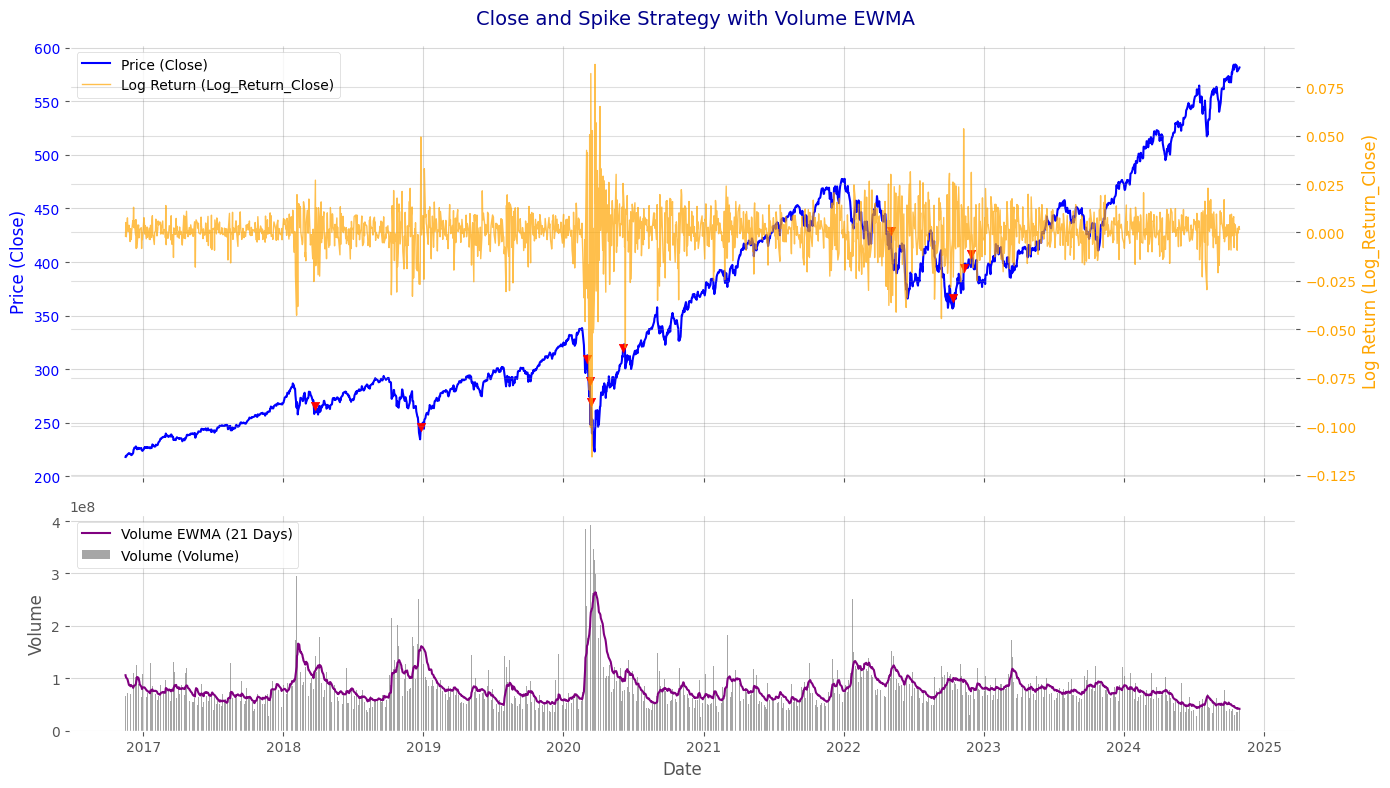

In [ ]:
SPY_spike_signals = spike_strategy(SPY_log_data, price_col='Close', log_return_col='Log_Return_Close',
                                   volume_col='Volume', ewma_days=21, short_threshold=0.025,
                                   long_threshold=None, volume_break_threshold = 0.2, plot=True, plot_window=2000)

* We can see that using our logic of 'panic' movements in both return and volumes, we may anticipate critical regions that require intensive hedging techniques.
* Of course, there are still positions that this is not correct. However, none is perfect, and the main purpose of customizing this function is to cover the extreme case of 'black swans'.
* Now I use the same logic above to write another function to generate a hybrid strategy that combine the hybrid strategy above with this customized one to see if we can have a better outcome.

In [ ]:
def merge_strategy_short_override(df1, df2, col_1st, col_2nd, price_col, plot=False, plot_window=None):
    """
    Merge signals from two strategies:
    - 1st loop: Bring all signals from the first strategy.
    - 2nd loop: Override with short signals (-1) if the second strategy says -1.
    """
    df1 = df1.copy()
    df2 = df2.copy()

    # Ensure indices are aligned
    if not df1.index.equals(df2.index):
        df2 = df2.reindex(df1.index)

    merged_df = pd.DataFrame(index=df1.index)

    merged_df[price_col] = df1[price_col]

    merged_df['Merge_signals_short_override'] = df1[col_1st]

    # Override with -1 if the second strategy signals -1
    short_override_condition = (df2[col_2nd] == -1)
    merged_df.loc[short_override_condition, 'Merge_signals_short_override'] = -1

    # Plot if required
    if plot:
        plot_data = merged_df if plot_window is None else merged_df.tail(plot_window)
        min_price = plot_data[price_col].min()
        max_price = plot_data[price_col].max()

        plt.figure(figsize=(13, 6))
        plt.plot(plot_data[price_col], label='Price', color='black', linewidth=1)

        plt.fill_between(plot_data.index, min_price, max_price,
                         where=(plot_data['Merge_signals_short_override'] == 1), color='green', alpha=0.4, label='Long Signals (1st Strategy)')
        plt.fill_between(plot_data.index, min_price, max_price,
                         where=(plot_data['Merge_signals_short_override'] == -1), color='red', alpha=0.4, label='Short Signals (Override by 2nd Strategy)')

        plt.title(f'Price ({price_col}) and Merged Signals (Short Override)', color='darkblue', fontsize=14)
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend(loc='upper left', fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    return merged_df

In [ ]:
SPY_momentum_3_signals = merge_strategy_short_override(SPY_momentum_2_signals, SPY_spike_signals,
                                                     'Merge_signals_long_override', 'Spike_Signals',
                                                     'Close', plot=False, plot_window=None)

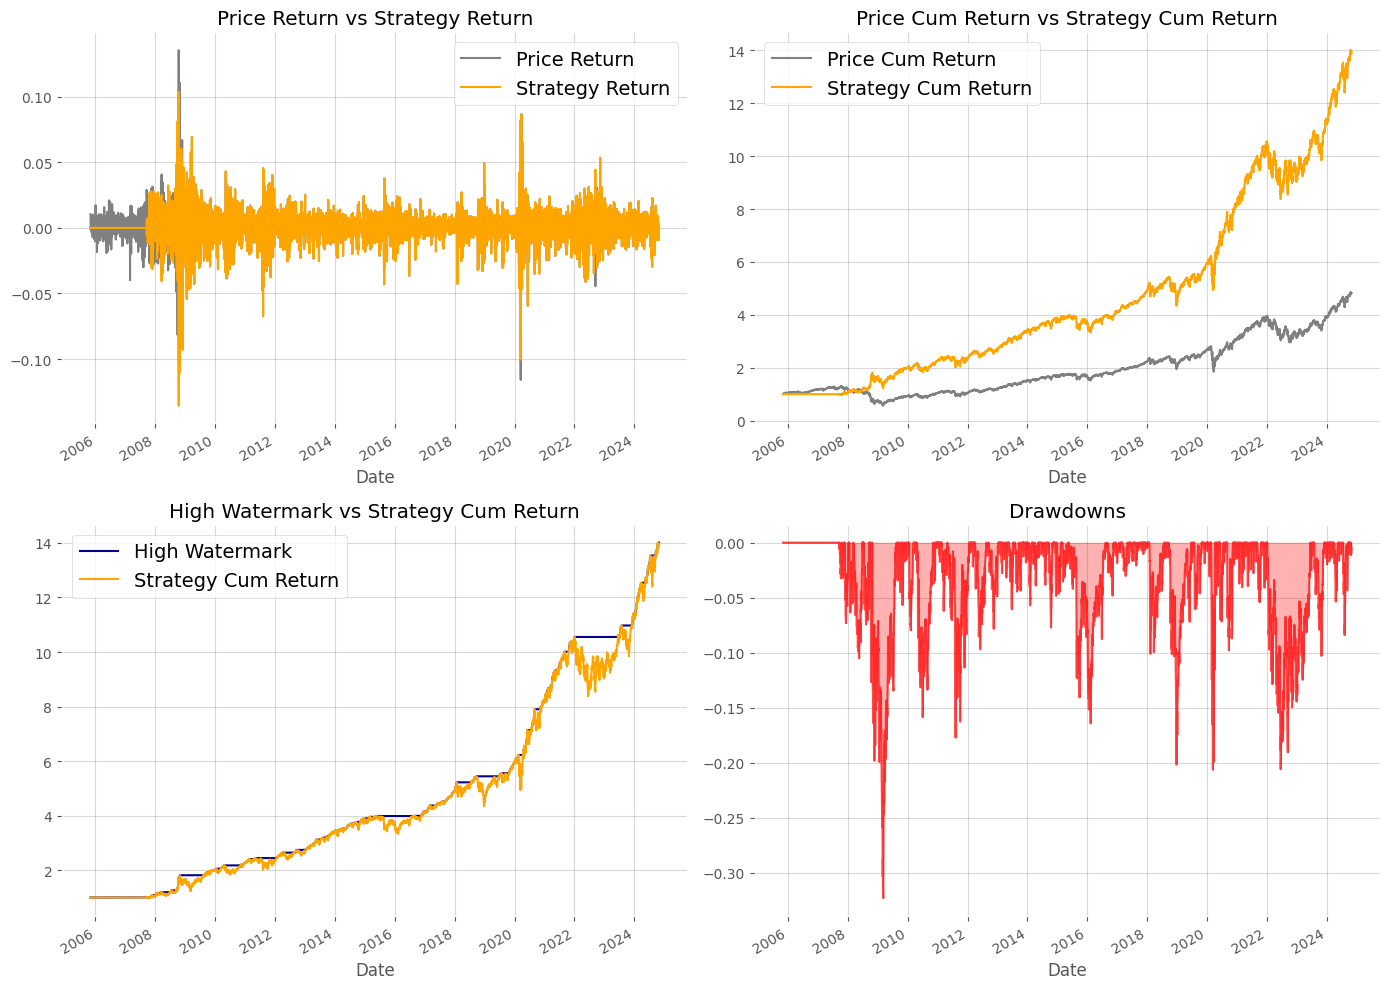

long_short
Sharpe Ratio                          0.75
Price Cumulative Return (%)         382.84
Strategy Cumulative Return (%)     1294.37
Price CAGR (%)                        8.66
Strategy CAGR (%)                     14.9
Max Drawdown (%)                    -32.32
Longest Drawdown Period           528 days
Longest Drawdown Start Date     2022-01-03
Longest Drawdown End Date       2023-06-15
Cumulative Equity               1394374.57

In [ ]:
SPY_momentum_3_pos = (strategy_positions(SPY_momentum_3_signals, signal_col='Merge_signals_short_override',
                                   strategy='long_short'))

SPY_momentum_3_calc, SPY_momentum_3_metrics = (
    strategy_summary(SPY_momentum_3_pos, date_col='Date', positions='Positions', price_col='Close',
                     strategy='long_short', drawdown='max', initial_capital=100000, plot=True))
# Because we have enhanced the synergized strategy to cover both Long and Short, we should try with both sides in our trading

SPY_momentum_3_metrics

##**Mean-Reversion and Moving Average Strategies** - ishani

In [ ]:
start = date(2005,11,1)
end = date(2024,10,31)
ticker = "SPY"
def get_ticker(ticker, start, end):
  df =\
  (
      yf
      .download(ticker,
                start,
                end)
  )
  return df

bound = 0.8
def test_train(df, bound):
    # Split the DataFrame
  split_index = int(len(df) * bound)
  train = df[:split_index]
  test = df[split_index:]
  return train, test

def fix_dataframe(df):
    # Remove timezone from DatetimeIndex
    if isinstance(df.index, pd.DatetimeIndex) and df.index.tz is not None:
        df.index = df.index.tz_localize(None)

    # Reset columns to the first level of a MultiIndex
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)

    return df


####Mean Reversion

In [7]:
SPY = get_ticker(ticker, start, end)[['Adj Close']]
SPY = fix_dataframe(SPY)

print("\nMissing Values? =",
    SPY
      .isnull()
      .values
      .any()
    )

train, test = test_train(SPY, bound)

[*********************100%***********************]  1 of 1 completed


Missing Values? = False


In [8]:
# step 2: getting simple moving average

#step 2.1: first pull out the Adj Close price (optional if you want to but makes it cleaner)

# step 2.2: getting the SMA
def SMA (df, days):
  df[f'SMA_{days}']=\
  (
      df['Adj Close']
      .rolling(window=days)
      .mean()
  )
  return df


In [9]:
# step 3: finding the upper and lower bound using std dev

#step 3.1: getting stdev of the Adj Close and it has to be rolling

def rolling_stdev(df, days):
  df[f'stdev_{days}']=\
  (
      df['Adj Close']
      .rolling(window=days)
      .std()
  )
  return df

#step 3.2 getting the bollinger bands, it is typically 2*stdev and the bands are for the sma_42 not on the adj close
def bounds(df, multiplier, days):
  df['range_upper']=\
  (
      df[f'SMA_{days}']
      +
      (multiplier*df[f'stdev_{days}'])
  )

  df['range_lower']=\
  (
      df[f'SMA_{days}']
      -
      (multiplier*df[f'stdev_{days}'])
  )

  return df


In [10]:
#step 4 define trade positions. position defines if we want to short or long
def trade_positions(df, days):
  df['distance'] = df['Adj Close'] - df[f'SMA_{days}']

  df['position']=\
  (
      np
      .where(df['distance']*df['distance'].shift(1)<0,
             0, np.nan)
  )

  df['position'] =\
  (
      np
      .where(df['Adj Close']>df['range_upper'],#overbought
             -1, df['position'])
  )

  df['position'] =\
  (
      np
      .where(df['Adj Close']<df['range_lower'],#oversold
             1, df['position'])
  )

  df['position'] = df['position'].ffill()
  df = df.dropna()
  return df


In [11]:
#Step 5: Buy or sell. If positions differ then it is a signal to buy or sell
def buy_sell(df1):
  df = df1.copy()
  df['buy_sell']=\
  (
      df['position']
      -
      df['position'].shift(1)
      )
  return df


In [12]:
#Step 6: get asset and strategy return
def returns (df):
  df['asset_return']=\
  (
      np
      .log(df['Adj Close']
           /
           df['Adj Close'].shift(1))
  )

  df['strategy_return']=\
  (
      df['position'].shift(1)#we can only see it for the next day
      *
      df['asset_return']
  )

  return df

In [13]:
def capital(df, investment, commission):
  df["commission_fee"] = -abs(df["buy_sell"]*commission)

  df.fillna(0, inplace=True)

  df["money_left"] = investment
  for i in range(len(df)):
      df["money_left"].iloc[i]= (
          np.exp(df["strategy_return"].iloc[i])
          *
          (
              df["money_left"].iloc[i-1]
              +
              df["commission_fee"].iloc[i]
          )
      )

  final_amt = (df["money_left"].iloc[-1]/investment-1)*100
  return df, final_amt

In [14]:
#Step 7: get cummax and drawdown
def cummax_drawdown(df):
  df["strategy_after_deduction"] = np.log(df["money_left"]/df["money_left"].shift(1))

  df['cummax']=\
  (
      df['strategy_after_deduction']
      .cumsum()
      .apply(np.exp)
      .cummax()
  )

  df['cumsum']=\
  (
      df['strategy_after_deduction']
      .cumsum()
      .apply(np.exp)
  )

  df['drawdown']=\
  (
      df['cumsum']
      -
      df['cummax']
  )

  return df

In [15]:
# Step 8: max drawdown and drawdown period calculation
def max_drawdown(df):
  return df['drawdown'].min()

def drawdown_duration(df):#get drawdown period in a table
    # Get indices where drawdown is zero
    zero_drawdown_indices = df[df['drawdown'] == 0].index

    # Calculate durations and corresponding drawdown values
    durations = zero_drawdown_indices[1:].to_pydatetime() - zero_drawdown_indices[:-1].to_pydatetime()
    drawdowns = df['drawdown'][zero_drawdown_indices[1:]].values

    # Create a DataFrame to hold the results
    results = pd.DataFrame({
        'Duration': durations,
        'Drawdown Value': drawdowns
    })

    return results

def current_drawdown(df_drawdown):#if it is continuning
  current_drawdown_period =\
  (
      df_drawdown["drawdown"].index[-1].to_pydatetime()
      -
      df_drawdown["drawdown"][df_drawdown["drawdown"] == 0].index[-1].to_pydatetime()
  )

  return current_drawdown_period.days

In [16]:
#step 5: visualize the return cumsum
def plot_cumsum(df, window):
  (
      df
      [["asset_return", "strategy_after_deduction"]]
      .dropna()
      .cumsum()
      .apply(np.exp)
      .plot(figsize = [18, 7]
          )
  )
  plt.title (f'Returns for window {window}')
  return plt.show()

def check_drawdown(df,window):
  (
      df
      [["cumsum", "cummax"]]
      .plot(figsize = [18, 7]
          )

  )

  plt.title (f'Drawdowns for window {window}')
  return plt.show()

In [17]:
def sharpe(df):
  Sharpe =\
  (
      253**0.5
      *
      np.mean(df["strategy_after_deduction"].apply(np.exp)-1)
      /
      np.std(df["strategy_after_deduction"].apply(np.exp)-1)
  )

  return Sharpe

In [18]:
def CAGR(df):
  days = (df.index[-1] - df.index[0]).days
  cagr = np.exp(sum(df["strategy_after_deduction"].dropna()))**(365/days)-1

  return cagr

final amount left is $54.301535464067705



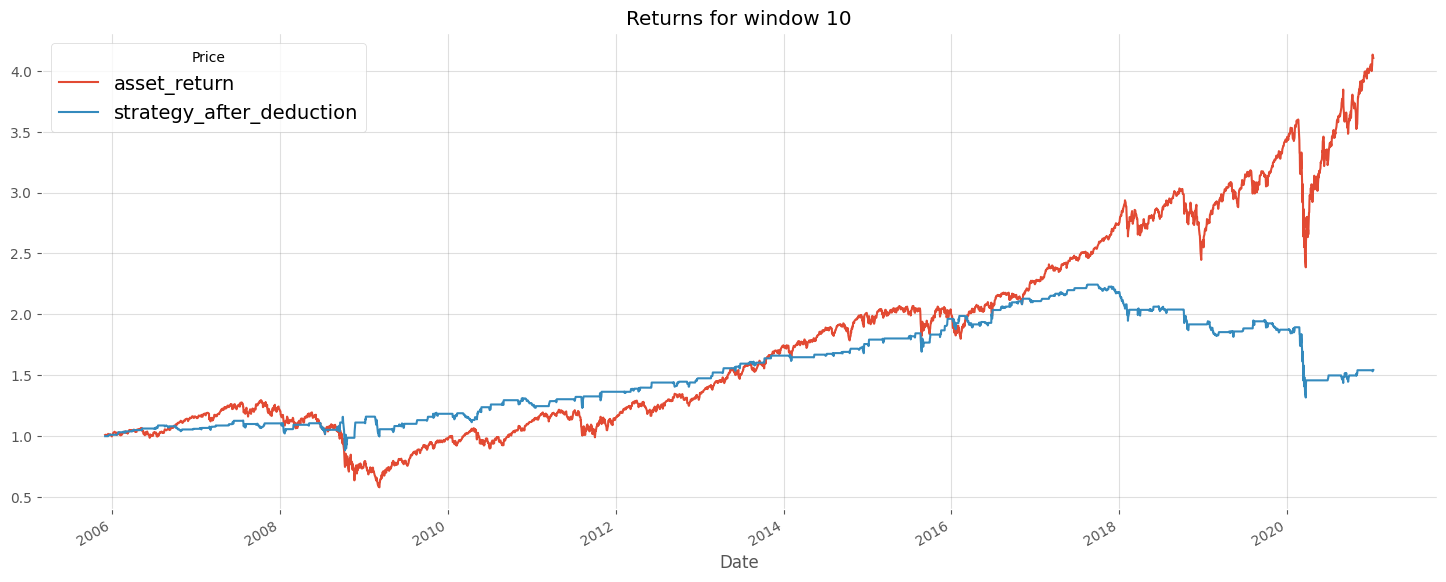

final amount left is $102.1467244802304



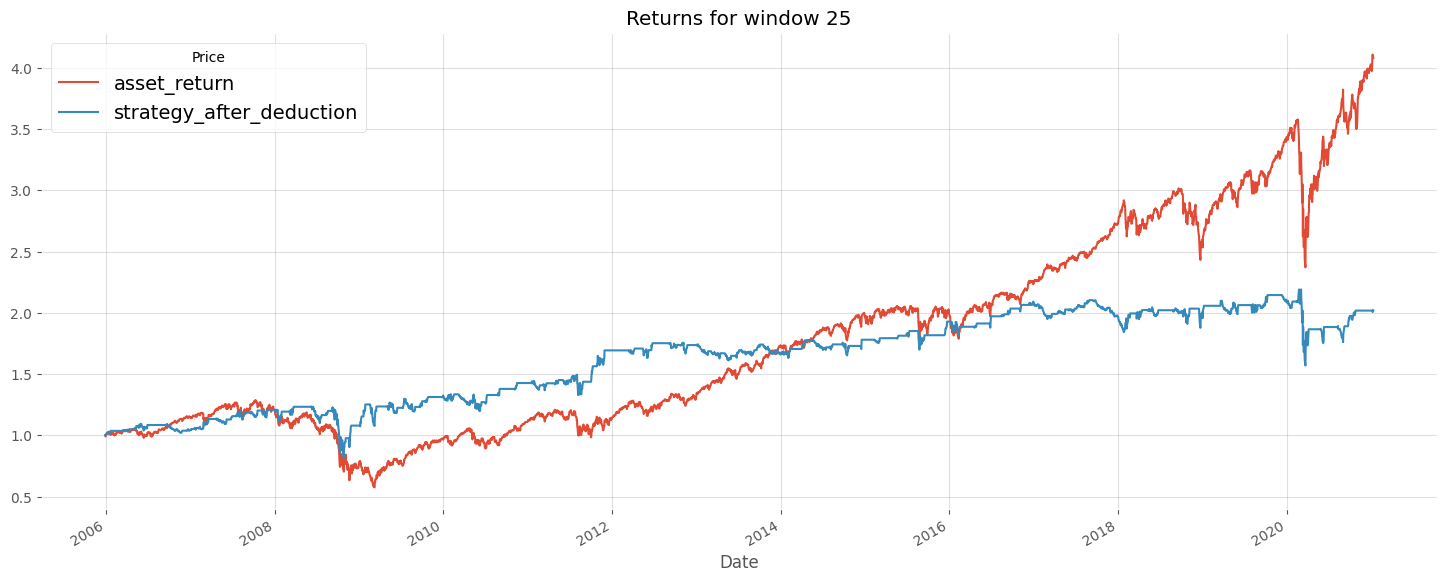

final amount left is $108.13847812743562



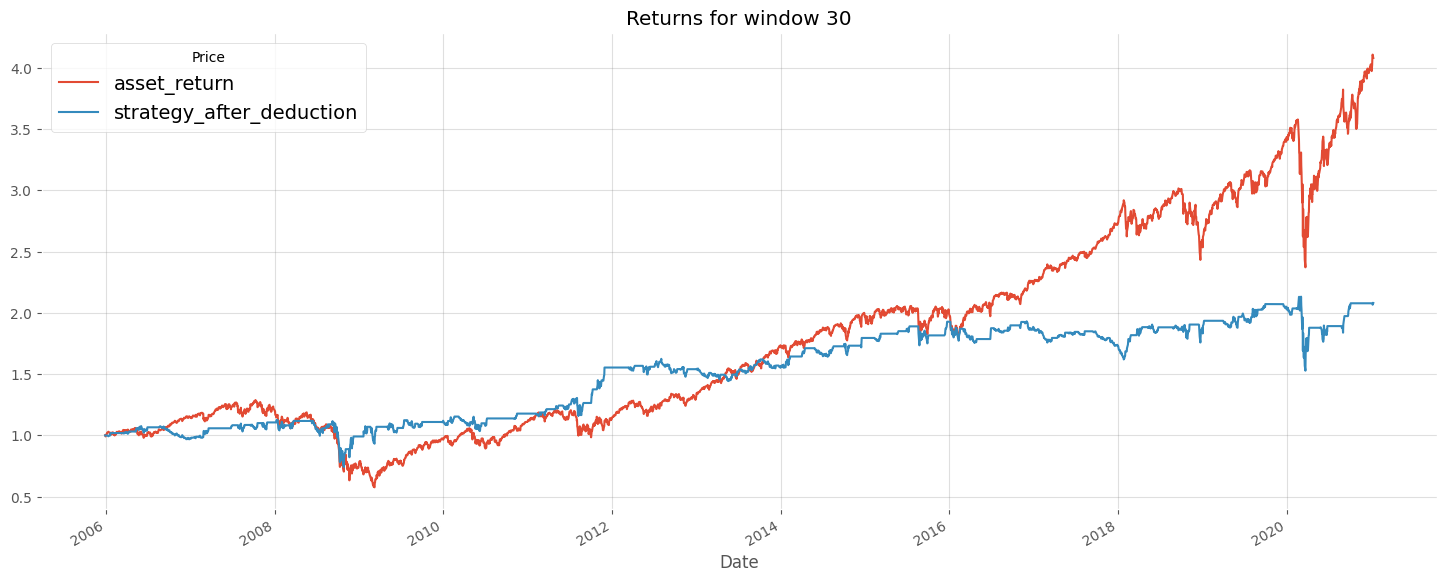

final amount left is $52.61077534955459



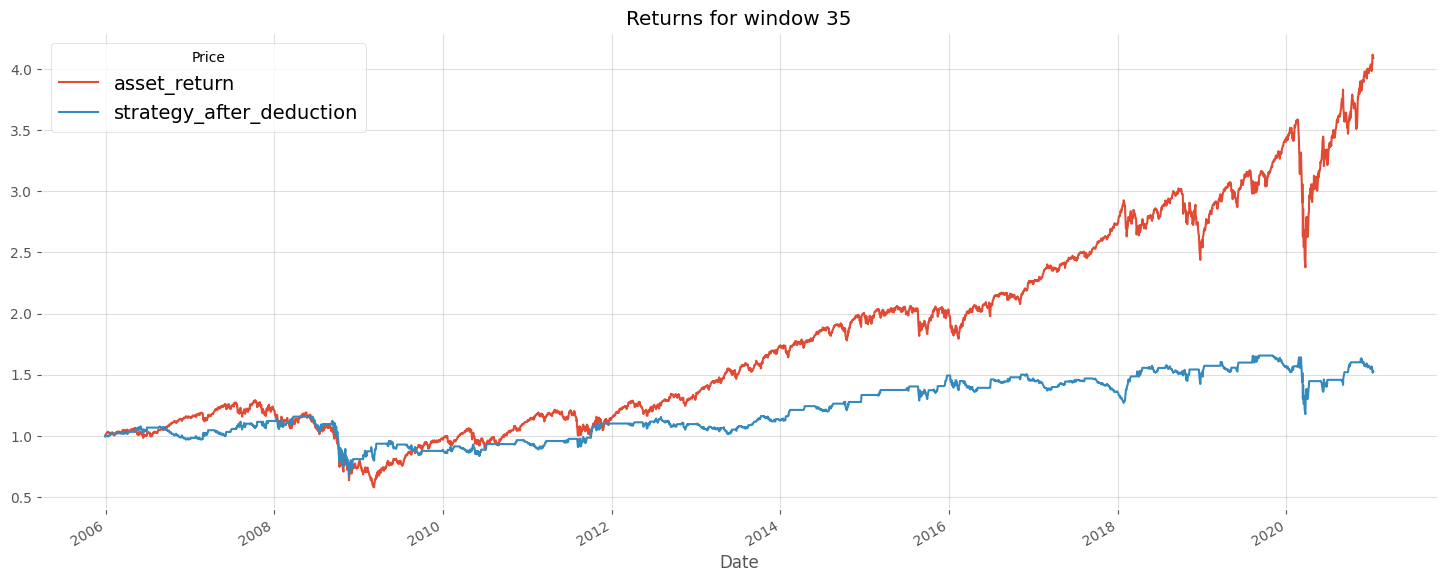

final amount left is $13.364625879950465



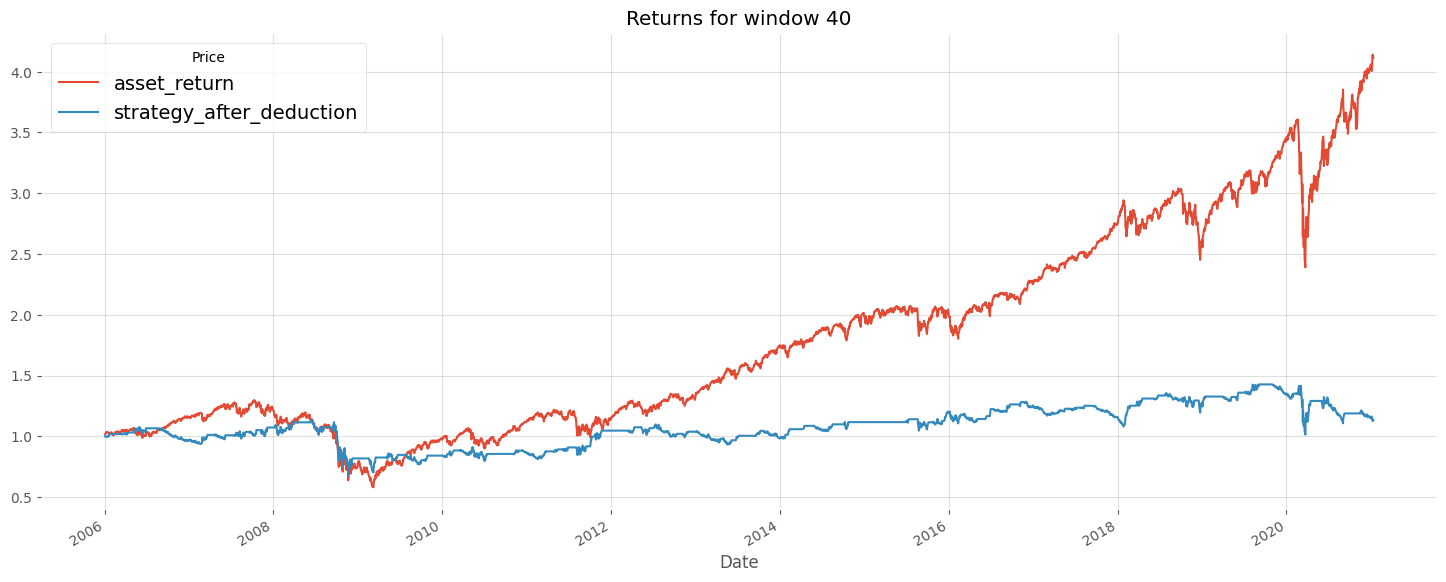

final amount left is $10.934290331136287



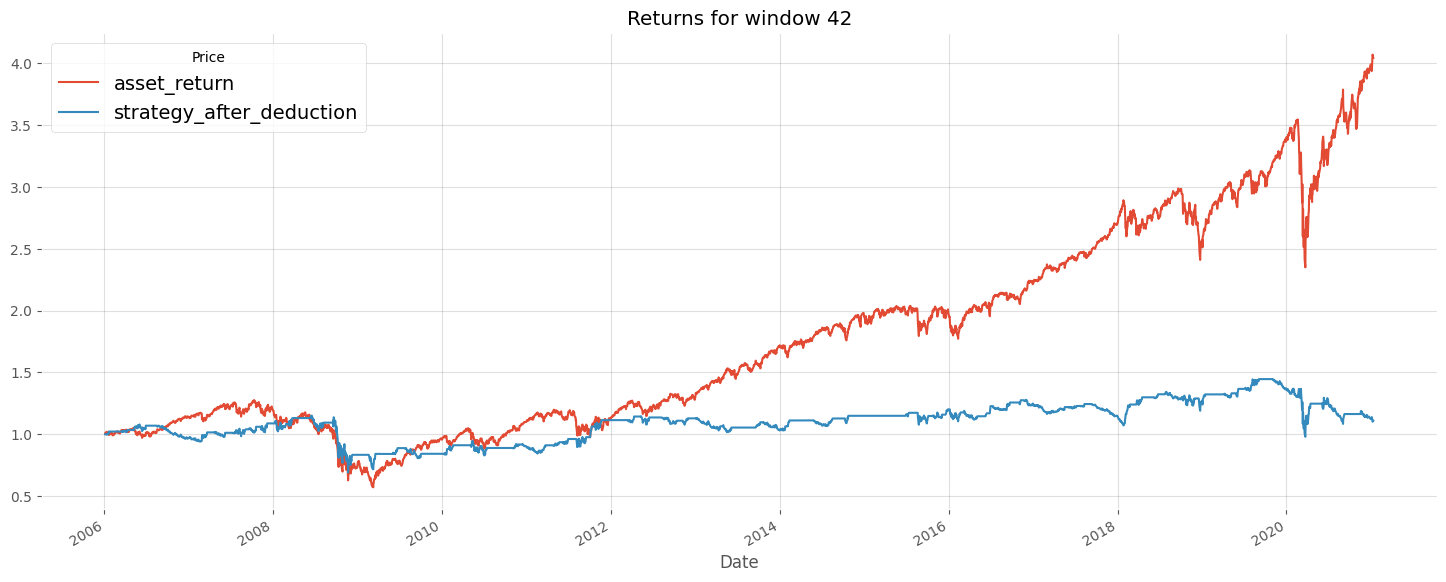

final amount left is $-1.7679849469771747



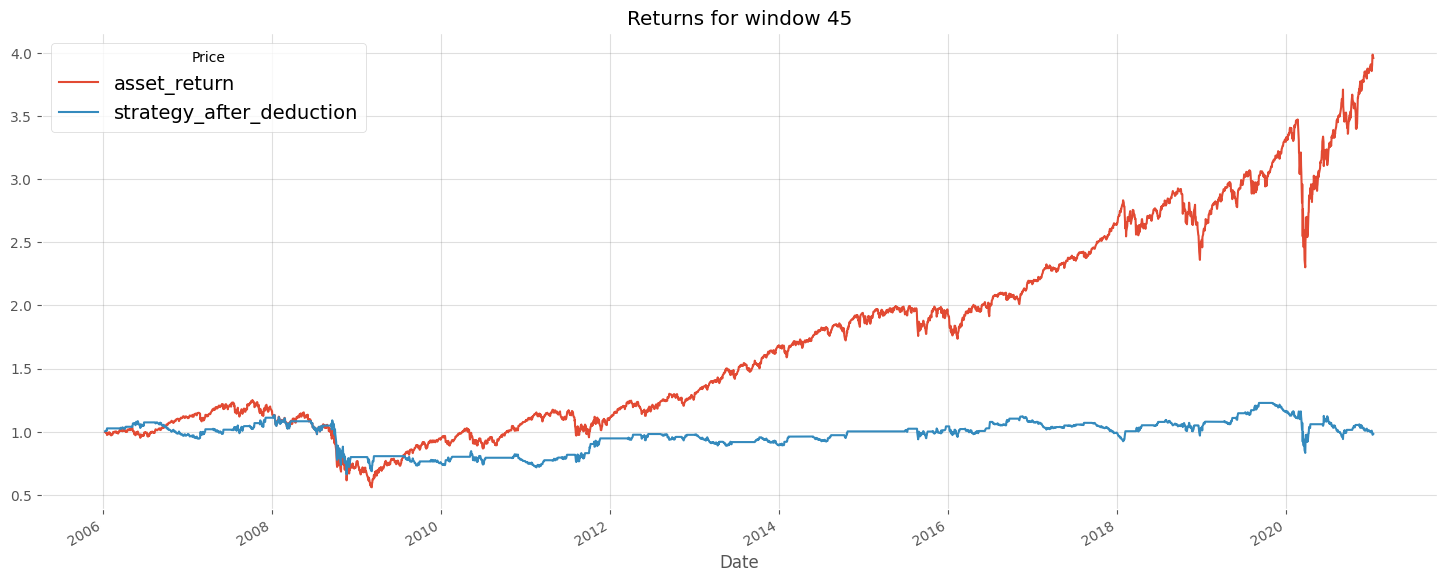

final amount left is $-25.650491859483182



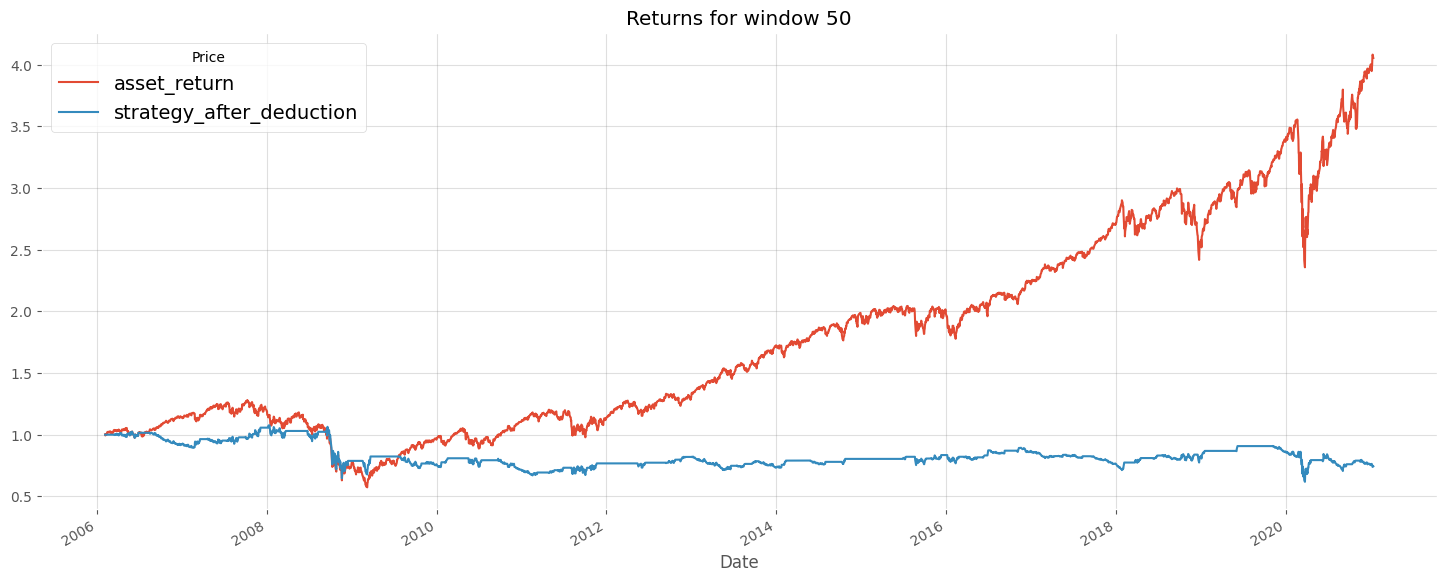

SMA_30


In [19]:
# Define initial capital
investment = 100000

Amt ={}

# Define the window sizes
window_sizes = [10, 25, 30, 35, 40, 42, 45, 50]

# Loop over each window size
for window in window_sizes:
    # Apply the transformations for each window size
    temp_train = train[['Adj Close']].copy()
    temp_train = SMA(temp_train, window)               # Apply SMA for the window
    temp_train = rolling_stdev(temp_train, window)     # Rolling standard deviation
    temp_train = bounds(temp_train, 2, window)         # Apply bounds
    temp_train = trade_positions(temp_train, window)   # Add trade positions
    temp_train = buy_sell(temp_train)                  # Generate buy/sell signals
    temp_train = returns(temp_train)
    temp_train, final_amt = capital(temp_train, investment, 0)
    temp_train = cummax_drawdown(temp_train)

    Amt[f'SMA_{window}'] = final_amt
    print (f'final amount left is ${final_amt}\n')

    plot_cumsum(temp_train, window)

max_key = max(Amt, key=Amt.get)
print(max_key)



final amount left is $102.1467244802304

Max Drawdown for the 25 days window is -0.6208716940253423


Max Drawdown duration for the 25 days window is 752 days


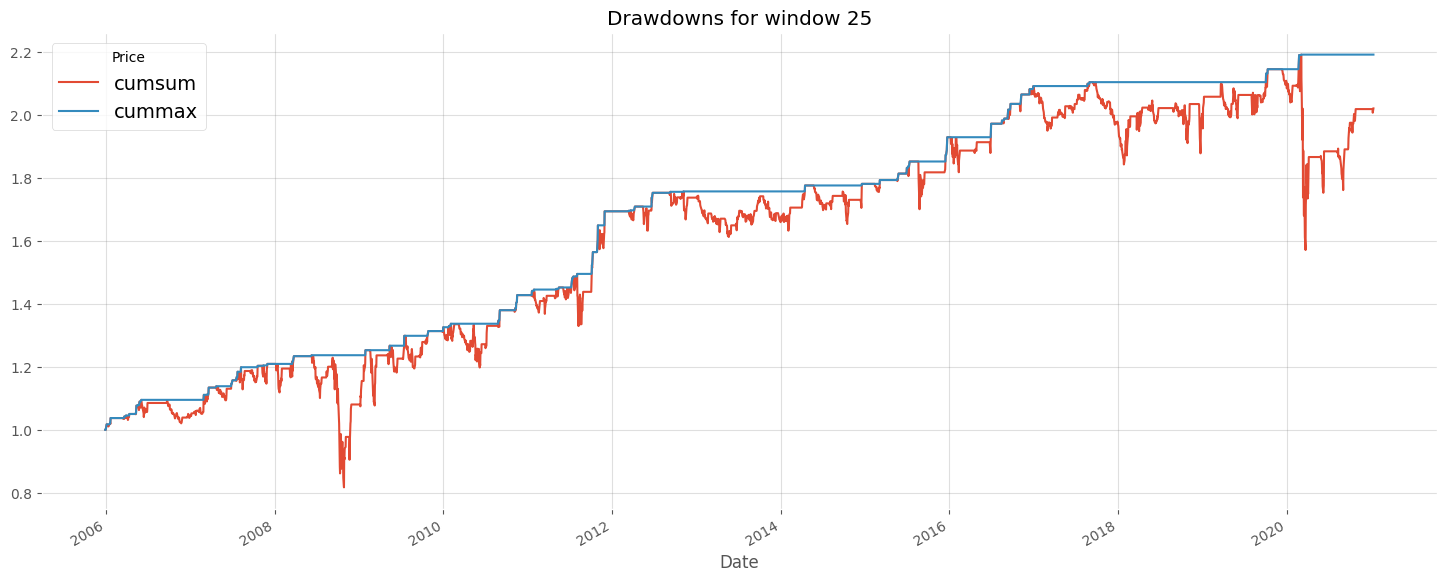


final amount left is $108.13847812743562

Max Drawdown for the 30 days window is -0.6040706867693231


Max Drawdown duration for the 30 days window is 769 days


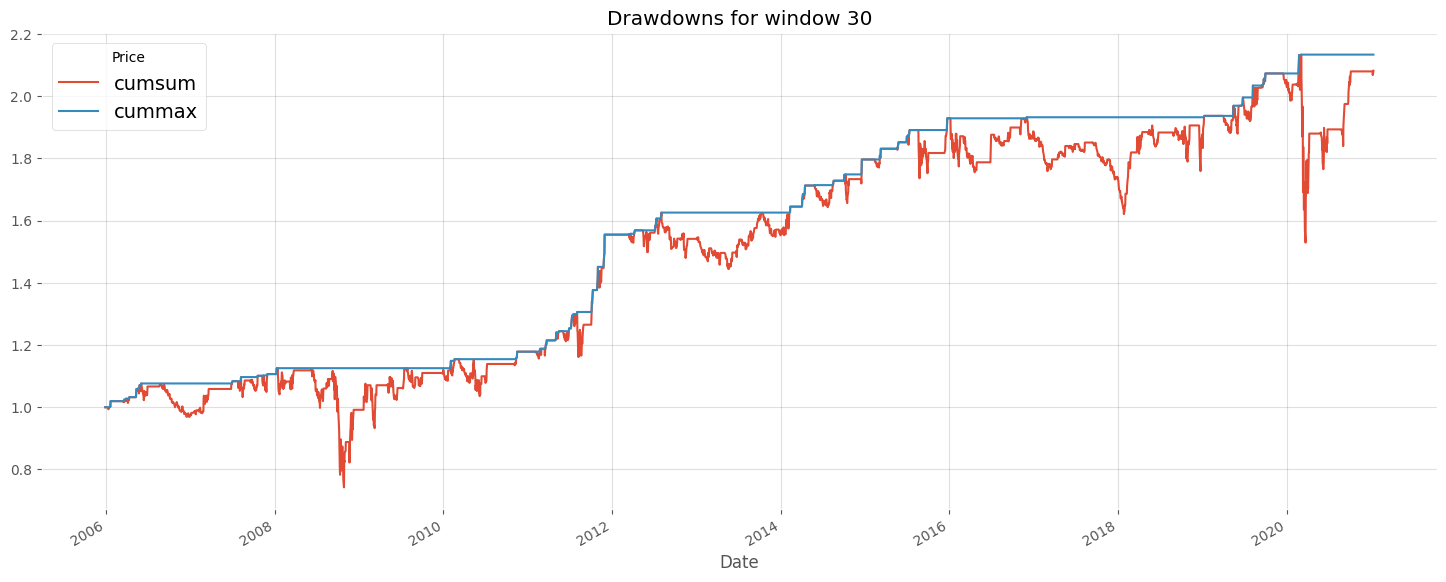

In [20]:
# Narrowed it to window 25 and 30
window_sizes = [25, 30]

# Loop over each window size
for window in window_sizes:
    # Apply the transformations for each window size
    temp_train = train[['Adj Close']].copy()
    temp_train = SMA(temp_train, window)
    temp_train = rolling_stdev(temp_train, window)
    temp_train = bounds(temp_train, 2, window)
    temp_train = trade_positions(temp_train, window)
    temp_train = buy_sell(temp_train)
    temp_train = returns(temp_train)
    temp_train, final_amt = capital(temp_train, investment, 0)
    temp_train = cummax_drawdown(temp_train)
    print (f'\nfinal amount left is ${final_amt}')

    print(f'\nMax Drawdown for the {window} days window is {max_drawdown(temp_train)}\n')

    results = drawdown_duration(temp_train)
    print(f"\nMax Drawdown duration for the {window} days window is {results.loc[results['Duration'].idxmax(), 'Duration'].days} days")


    check_drawdown(temp_train, window)

final based on train 30 days rolling window is the best

In [21]:
def backtest(df, window):
    df = df[['Adj Close']].copy()
    df = SMA(df, window)
    df = rolling_stdev(df, window)
    df = bounds(df, 2, window)
    df = trade_positions(df, window)
    df = buy_sell(df)
    df = returns(df)
    df,final_amt = capital(df, investment, 0)
    df = cummax_drawdown(df)
    print (f'\nfinal amount left is ${final_amt}')

    print(f'\nMax Drawdown for the {window} days window is {max_drawdown(df)}\n')

    results = drawdown_duration(df)
    print(f"\nMax Drawdown duration for the {window} days window is {results.loc[results['Duration'].idxmax(), 'Duration'].days} days")

    current = current_drawdown(df)
    print(f"\nDrawdown duration for drawdown still continuing is {current} days")


    print(f"\nThe sharpe is {sharpe(df)}\nThe CAGR is {CAGR(df)}\n")


    check_drawdown(df, window)

    plot_cumsum(df, f"{window} days")

####Simple moving average

In [22]:
SPY = get_ticker(ticker, start, end)[['Adj Close']]
SPY = fix_dataframe(SPY)

print("\nMissing Values? =",
    SPY
      .isnull()
      .values
      .any()
    )

train, test = test_train(SPY, bound)

[*********************100%***********************]  1 of 1 completed


Missing Values? = False


In [23]:
def SMA (df, days):
  df[f'SMA_{days}']=\
  (
      df['Adj Close']
      .rolling(window=days)
      .mean()
  )
  return df

In [24]:
def position_crossover(df, day_s, day_l):
  df['position']=\
  (
      np
      .where(df[f'SMA_{day_s}']>df[f'SMA_{day_l}'],
             1,-1)
  )
  return df



Testing for short window: 10 and long window: 50


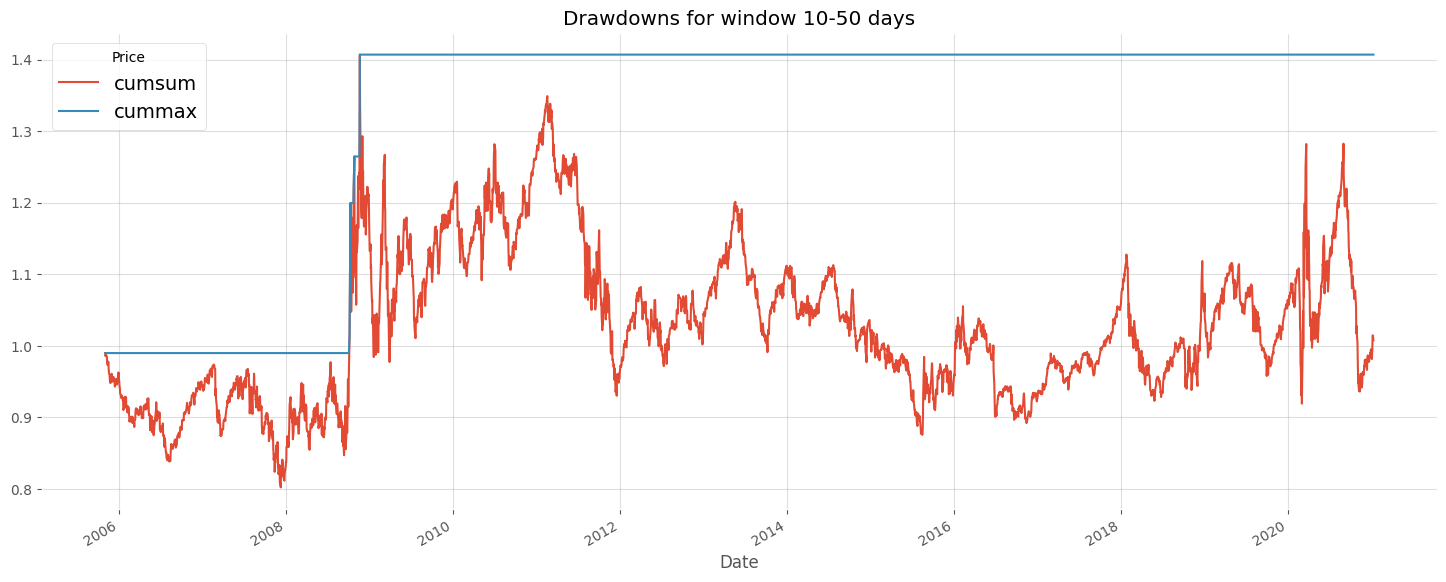

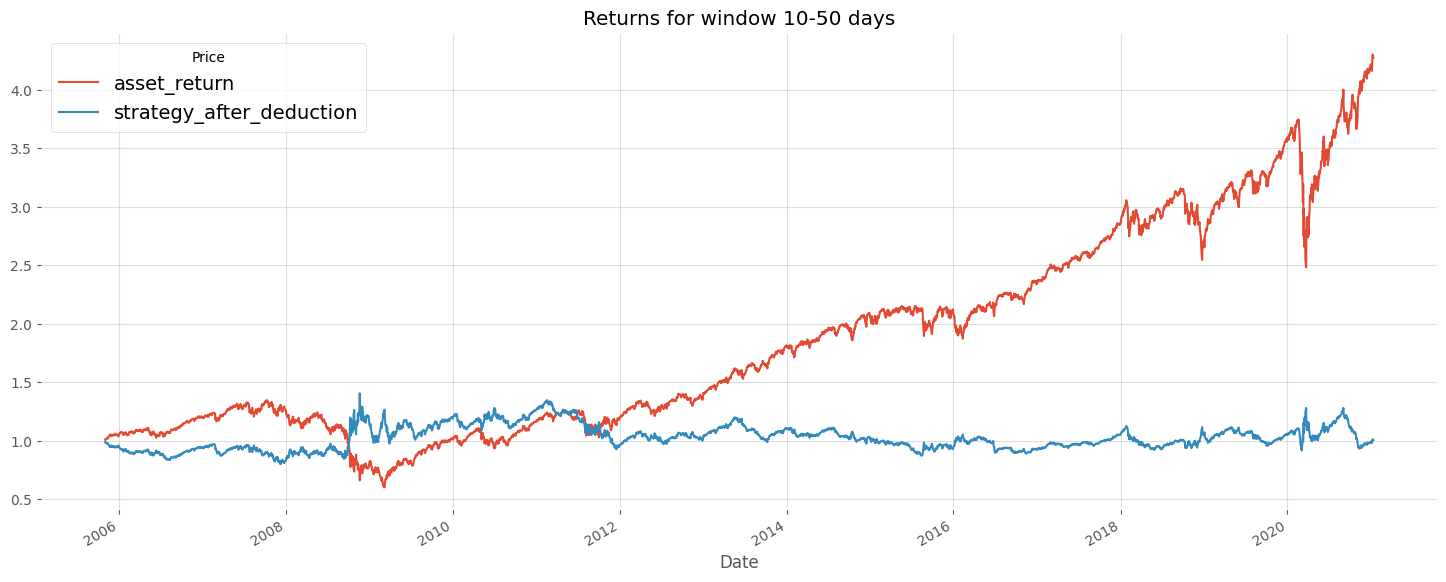


Testing for short window: 20 and long window: 60


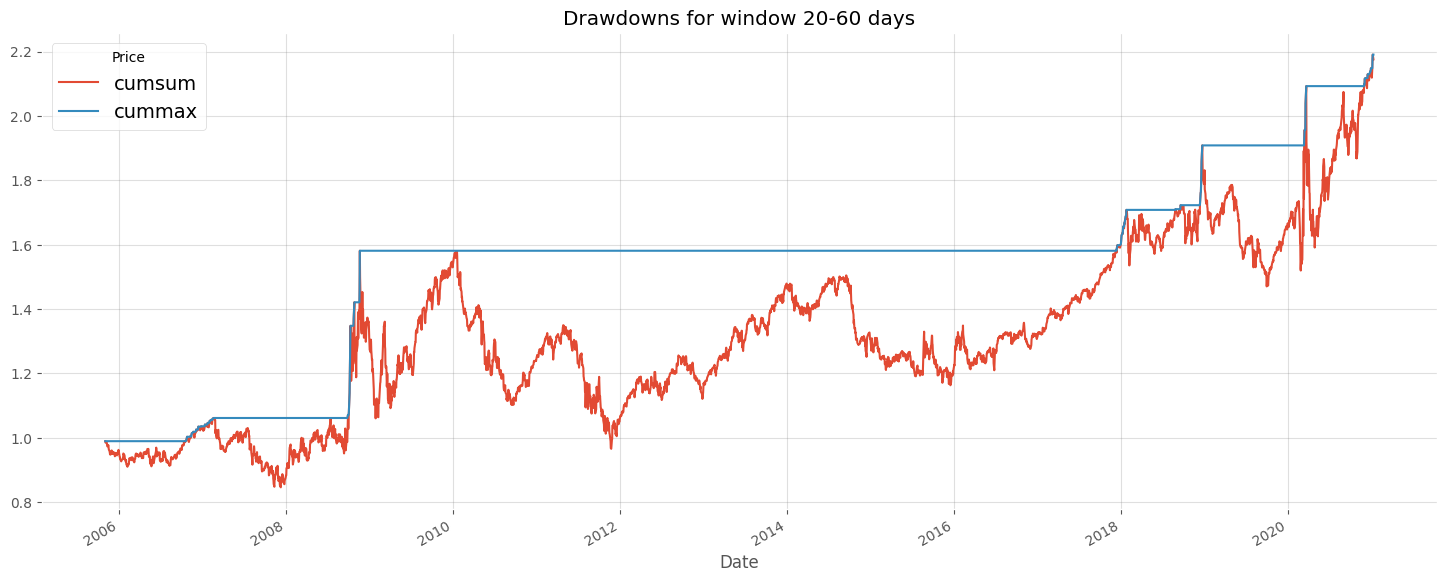

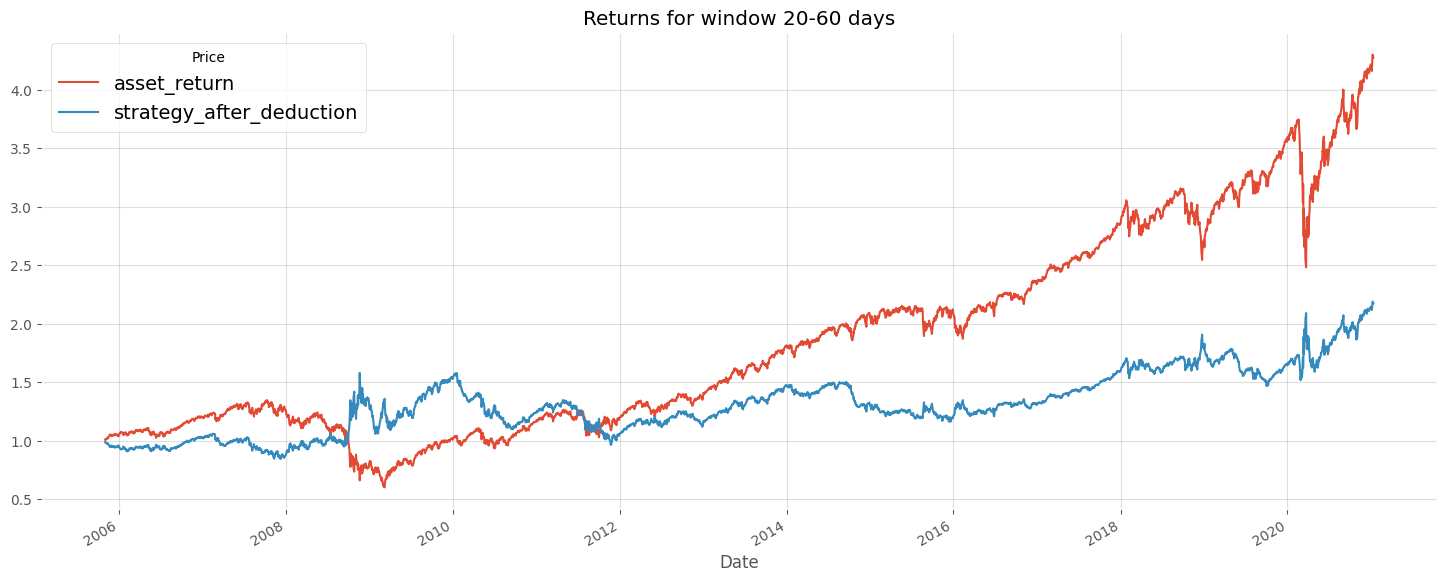


Testing for short window: 10 and long window: 60


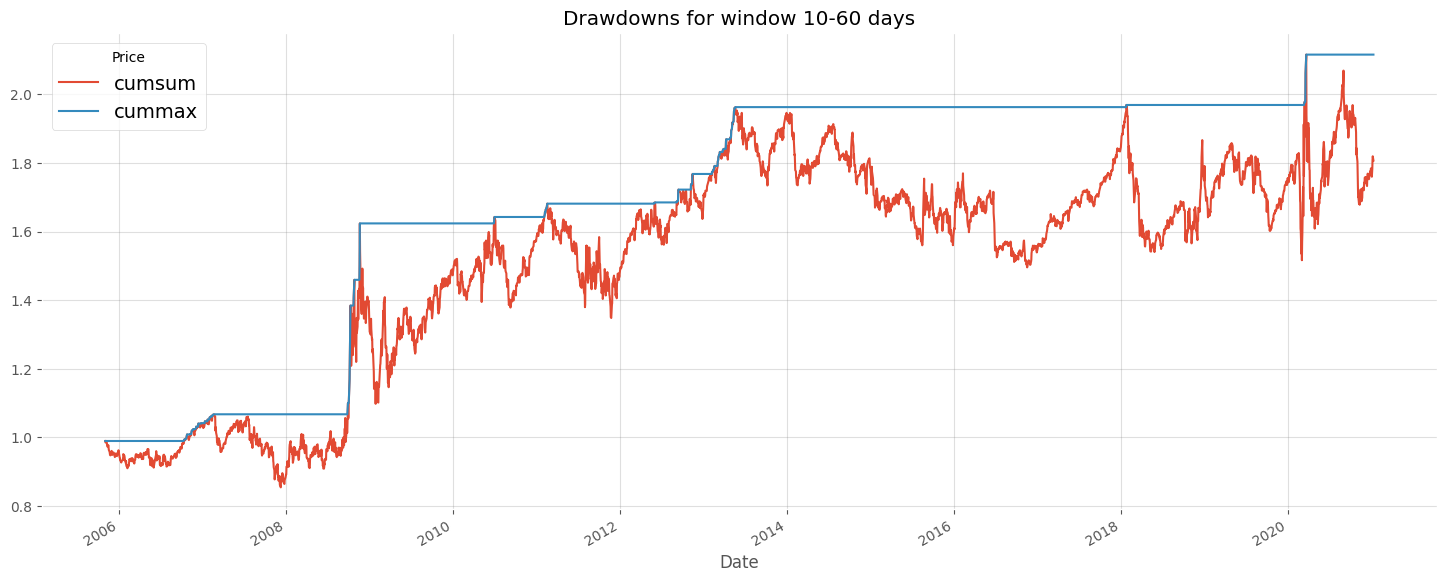

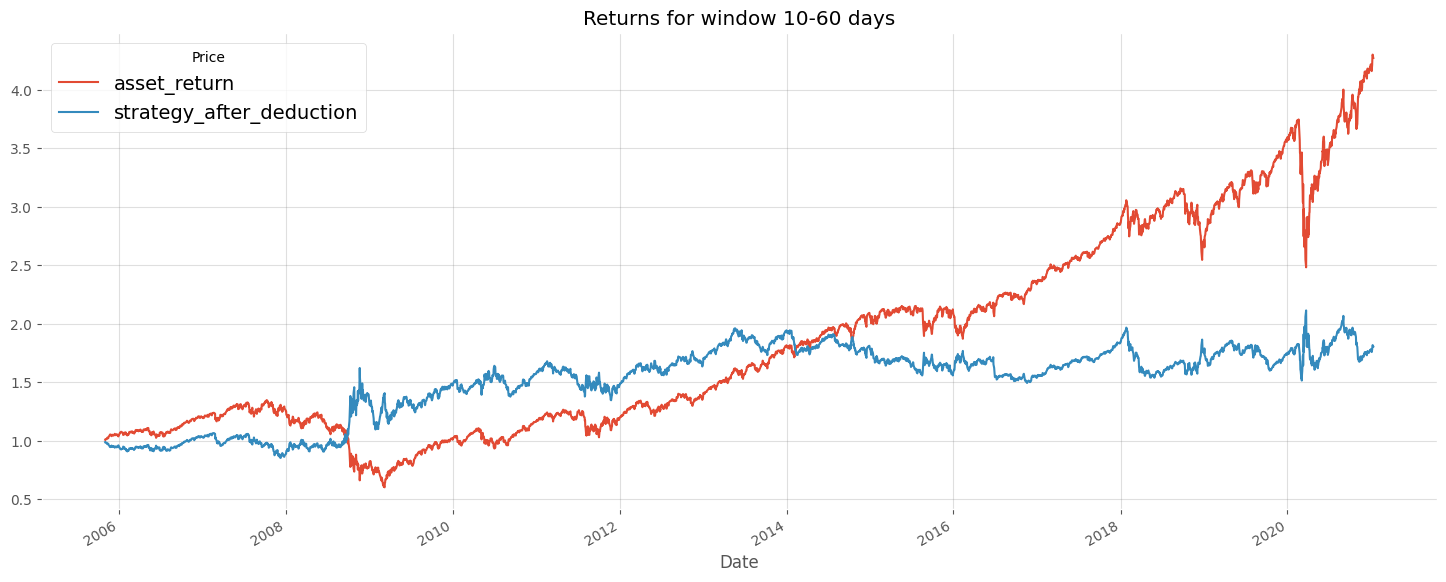


Testing for short window: 20 and long window: 50


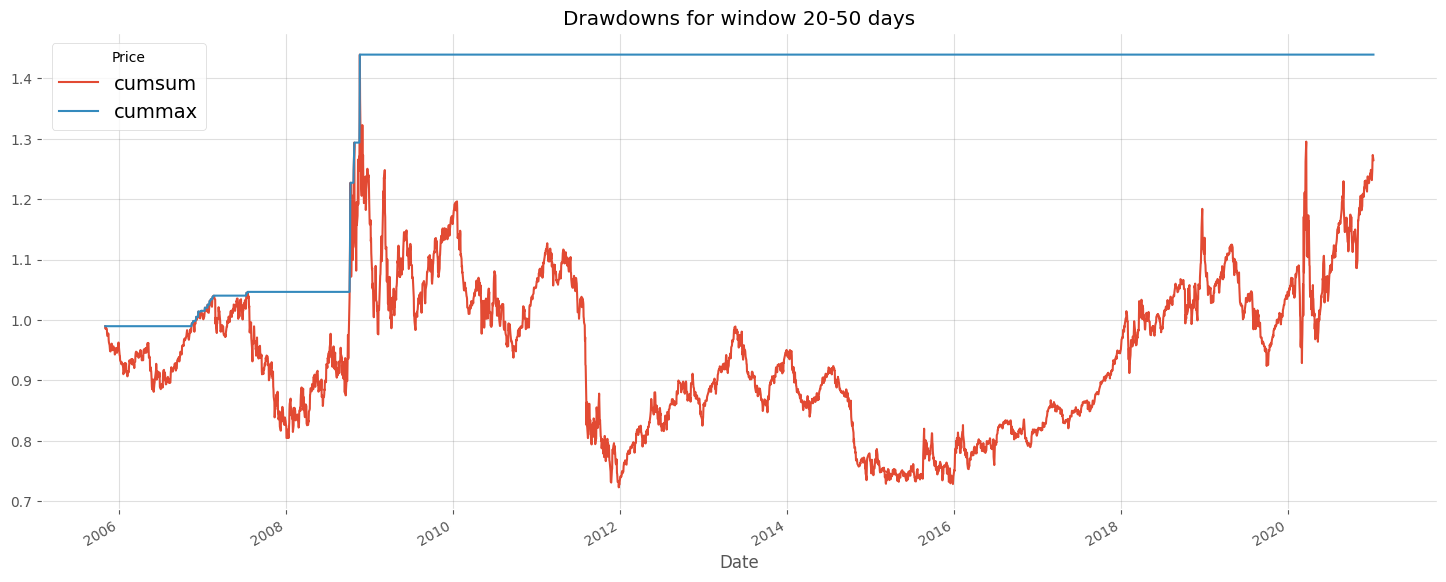

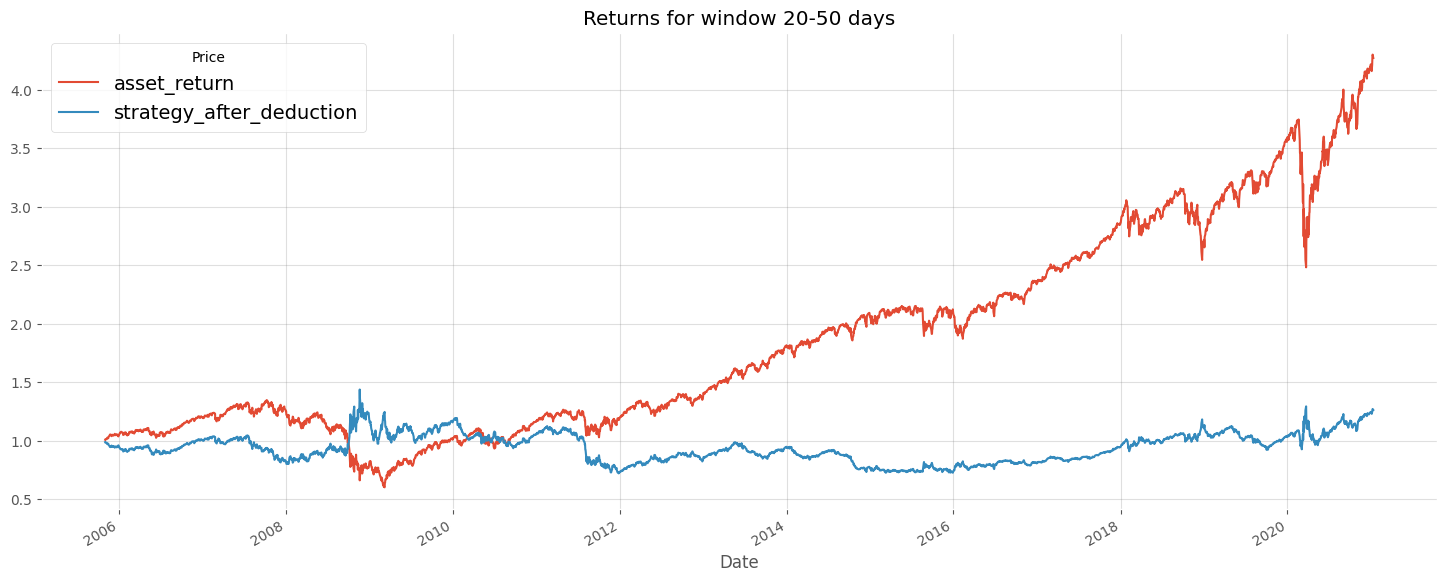


Testing for short window: 9 and long window: 21


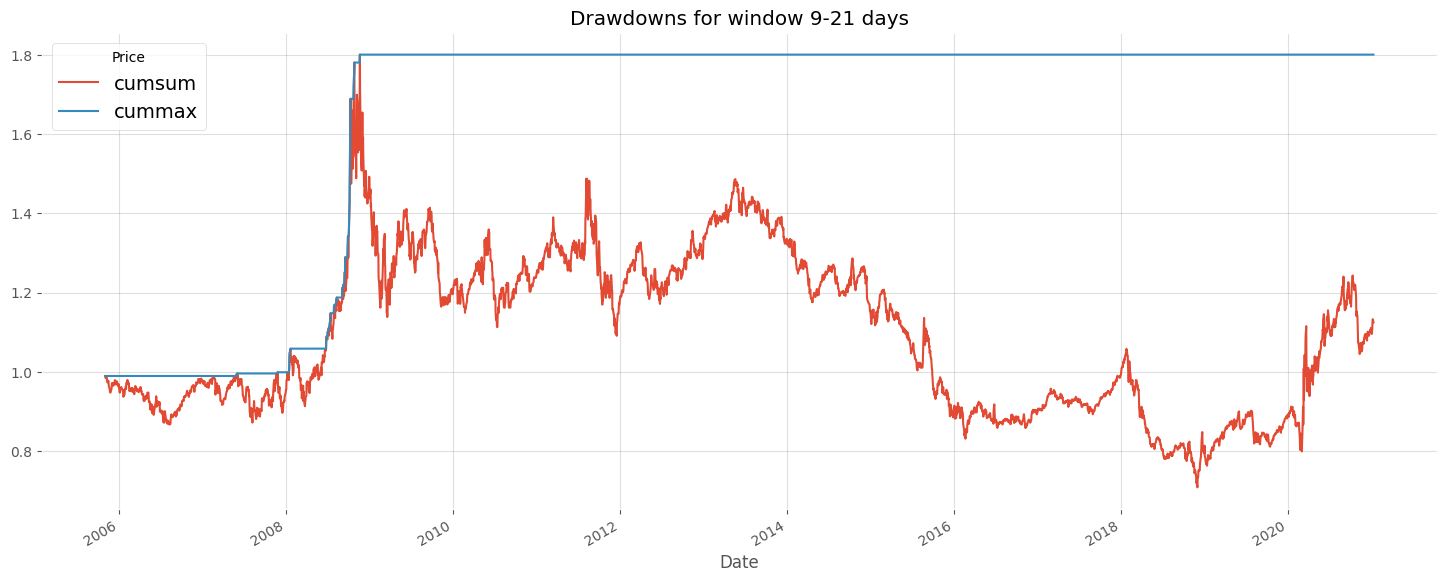

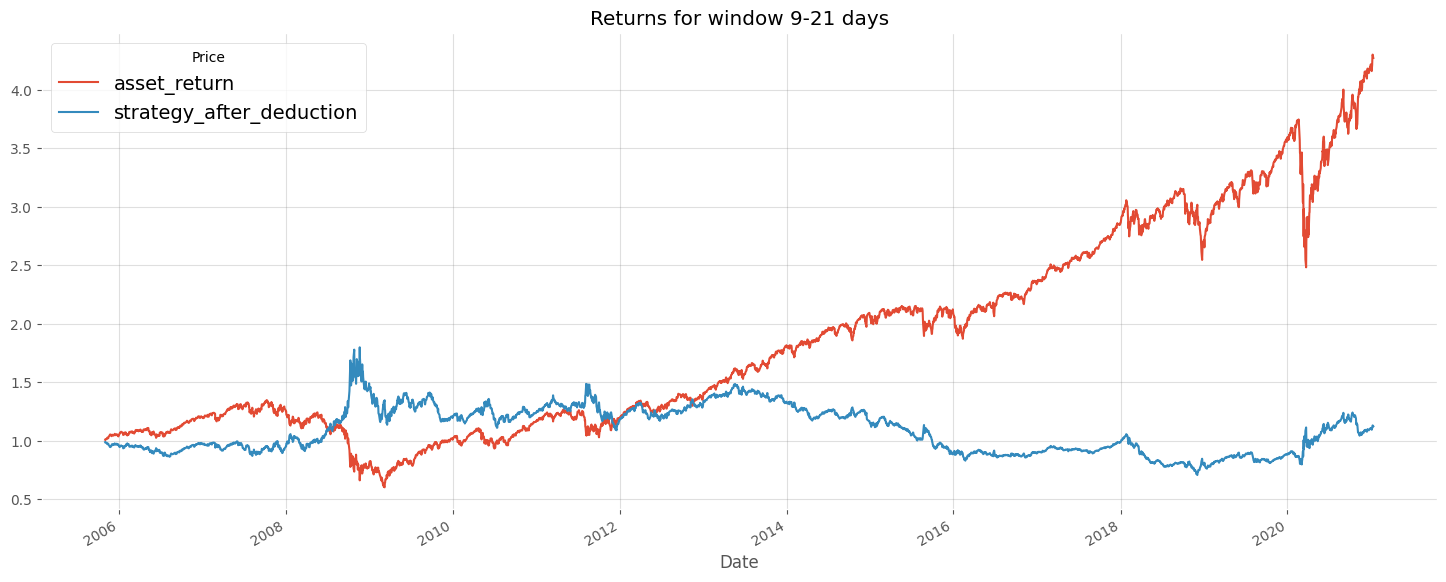


Testing for short window: 15 and long window: 30


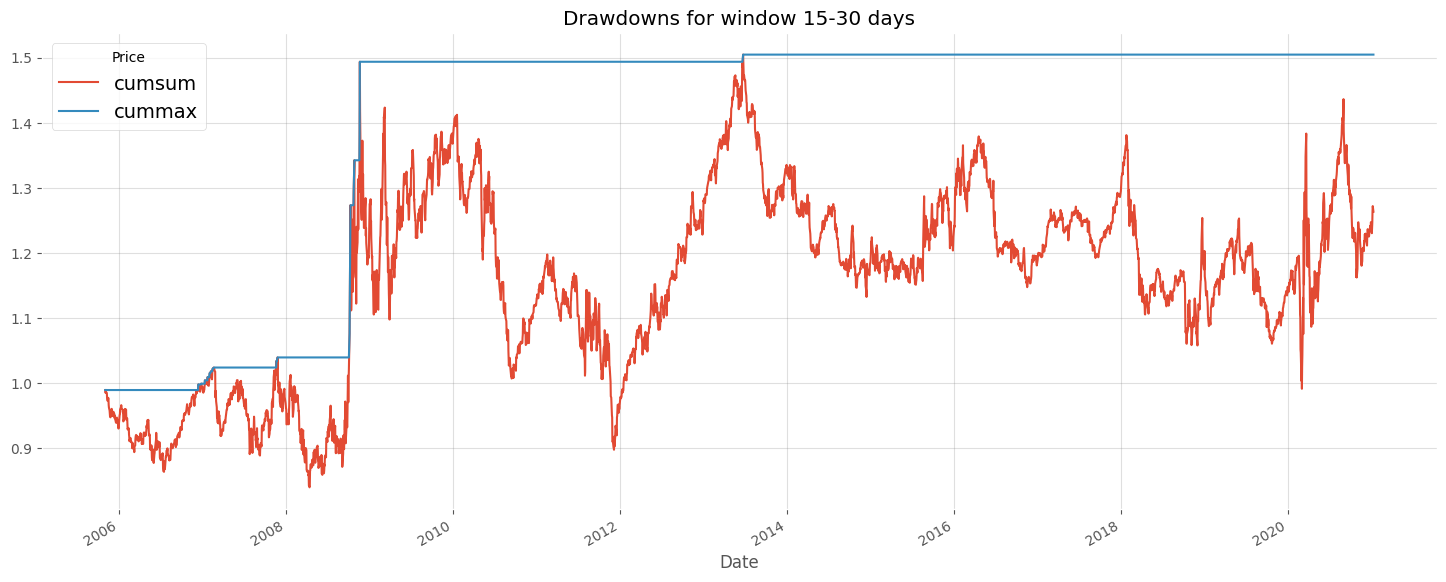

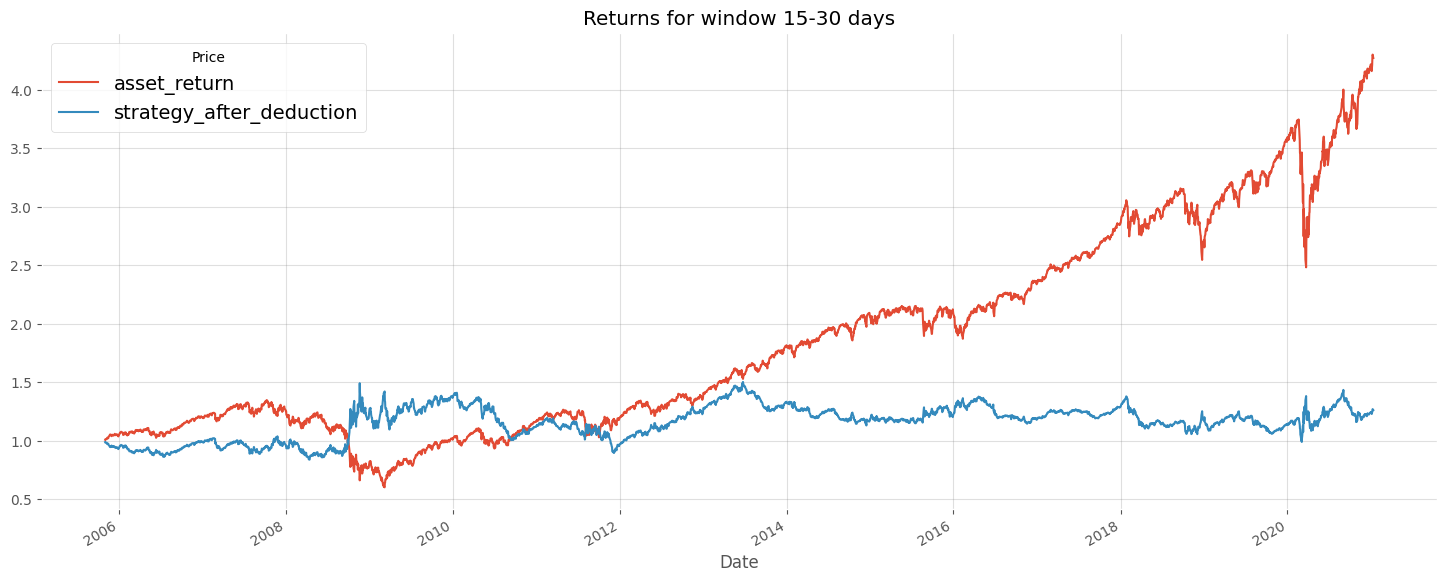


Results for each window combination:
   Short Window  Long Window  Final Capital  Max Drawdown  \
0            10           50       0.762674     -0.531661   
1            20           60     117.564289     -0.615167   
2            10           60      80.688573     -0.525654   
3            20           50      26.465805     -0.716782   
4             9           21      12.514632     -1.091567   
5            15           30      26.340641     -0.595589   

   Drawdown Duration (days)  Sharpe Ratio      CAGR  
0                      1069      0.102751  0.000500  
1                      3309      0.356547  0.052451  
2                      1711      0.295257  0.039674  
3                       446      0.177727  0.015562  
4                       574      0.139041  0.007785  
5                      1677      0.177316  0.015496  


In [25]:
import pandas as pd

# List of short and long window combinations to test
window_combinations = [(10, 50), (20, 60), (10, 60), (20, 50), (9, 21), (15, 30)]  # Add more combinations as needed

# Initialize an empty list to store results for each window combination
results_list = []

# Loop over each combination of short and long windows
for short_window, long_window in window_combinations:
    print(f"\nTesting for short window: {short_window} and long window: {long_window}")

    # Apply the strategy with each combination of short and long windows
    temp_train = train[['Adj Close']].copy()

    # Apply the short and long windows for SMA
    temp_train = SMA(temp_train, short_window)  # Short window SMA
    temp_train = SMA(temp_train, long_window)   # Long window SMA

    # Apply position crossover strategy
    temp_train = position_crossover(temp_train, short_window, long_window)  # Crossover strategy

    # Generate buy/sell signals and calculate returns
    temp_train = buy_sell(temp_train)
    temp_train = returns(temp_train)

    # Capital calculation (starting with investment)
    temp_train, final_amt = capital(temp_train, investment, 0)

    # Calculate cumulative max drawdown
    temp_train = cummax_drawdown(temp_train)

    # Get max drawdown value
    max_drawdown_value = max_drawdown(temp_train)

    # Get drawdown duration
    results = drawdown_duration(temp_train)
    max_drawdown_duration = results.loc[results['Duration'].idxmax(), 'Duration'].days

    # Calculate Sharpe ratio and CAGR
    sharpe_value = sharpe(temp_train)
    cagr_value = CAGR(temp_train)

    # Store results in the list
    results_list.append({
        'Short Window': short_window,
        'Long Window': long_window,
        'Final Capital': final_amt,
        'Max Drawdown': max_drawdown_value,
        'Drawdown Duration (days)': max_drawdown_duration,
        'Sharpe Ratio': sharpe_value,
        'CAGR': cagr_value
    })

    # Check the drawdown in detail
    check_drawdown(temp_train, f"{short_window}-{long_window} days")

    # Plot cumulative returns for each window combination
    plot_cumsum(temp_train, f"{short_window}-{long_window} days")

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Print the results table
print("\nResults for each window combination:")
print(results_df)


In [26]:
def backtest_sma(df, short_window, long_window):
    df = SMA(df, short_window)  # Short window SMA
    df = SMA(df, long_window)   # Long window SMA

    df = position_crossover(df, short_window, long_window)  # Crossover strategy

    df = buy_sell(df)
    df = returns(df)
    df,final_amt = capital(df, investment, 0)
    df = cummax_drawdown(df)
    print (f'\nfinal amount left is ${final_amt}')

    print(f'\nMax Drawdown for the {window} days window is {max_drawdown(df)}\n')

    results = drawdown_duration(df)
    print(f"\nMax Drawdown duration for the {short_window}-{long_window} days window is {results.loc[results['Duration'].idxmax(), 'Duration'].days} days")

    current = current_drawdown(df)
    print(f"\nDrawdown duration for drawdown still continuing is {current} days")


    print(f"\nThe sharpe is {sharpe(df)}\nThe CAGR is {CAGR(df)}\n")

    check_drawdown(df, f"{short_window}-{long_window} days")

    plot_cumsum(df, f"{short_window}-{long_window} days")

####Exponetial moving average

In [27]:
def EMA (df, days):
  df[f'EMA_{days}']=\
  (
      df['Adj Close']
    .ewm(span = days, min_periods = days)
    .mean()
  )
  return df

In [28]:
def position_crossover_EMA(df, day_s, day_l):
  df['position']=\
  (
      np
      .where(df[f'EMA_{day_s}']>df[f'EMA_{day_l}'],
             1,-1)
  )
  return df


In [29]:
SPY = get_ticker(ticker, start, end)[['Adj Close']]
SPY = fix_dataframe(SPY)

print("\nMissing Values? =",
    SPY
      .isnull()
      .values
      .any()
    )

train, test = test_train(SPY, bound)

[*********************100%***********************]  1 of 1 completed


Missing Values? = False



Testing for short window: 10 and long window: 50


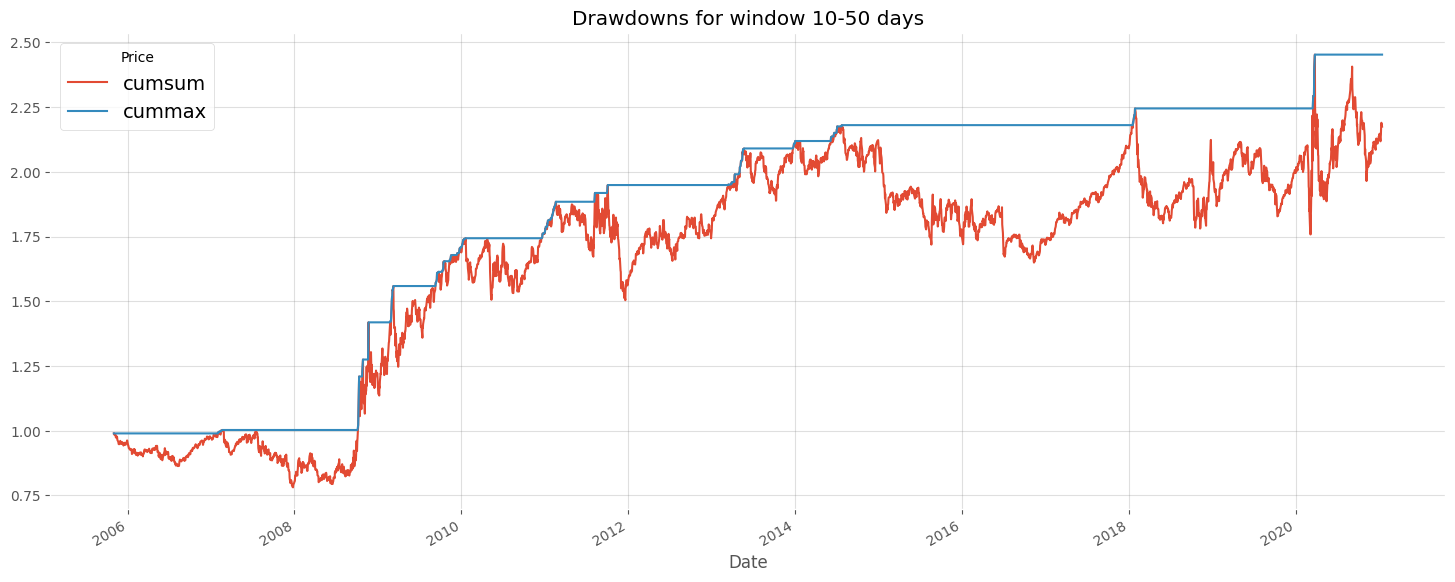

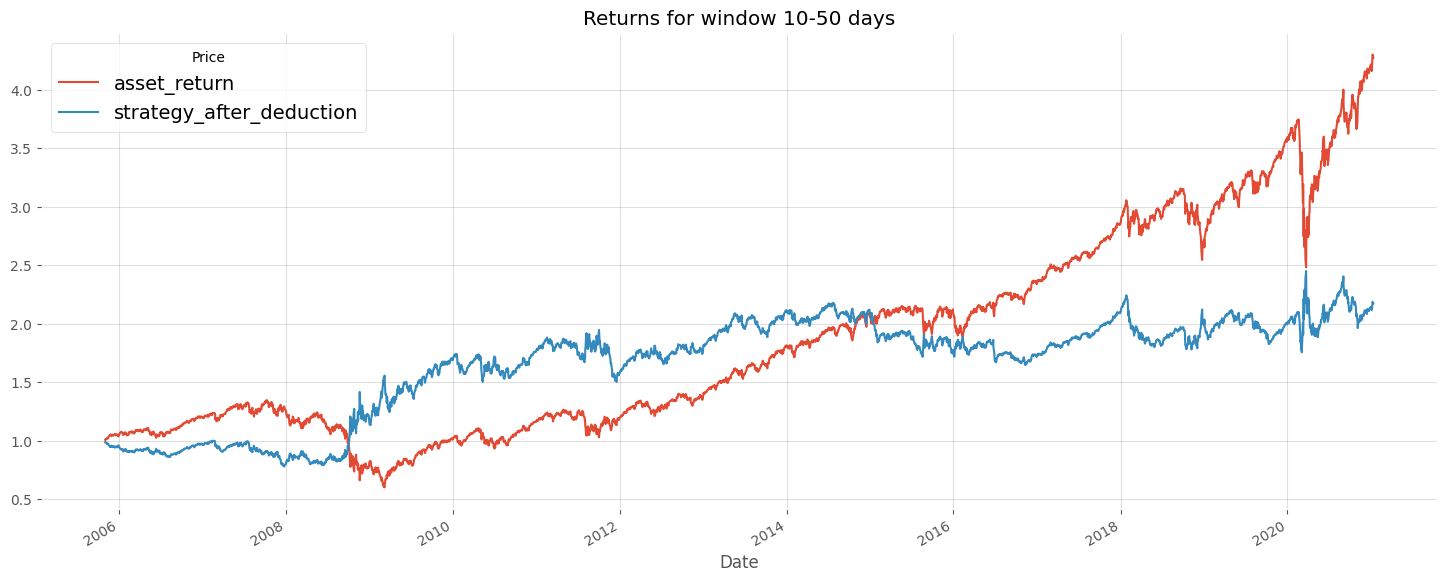


Testing for short window: 20 and long window: 60


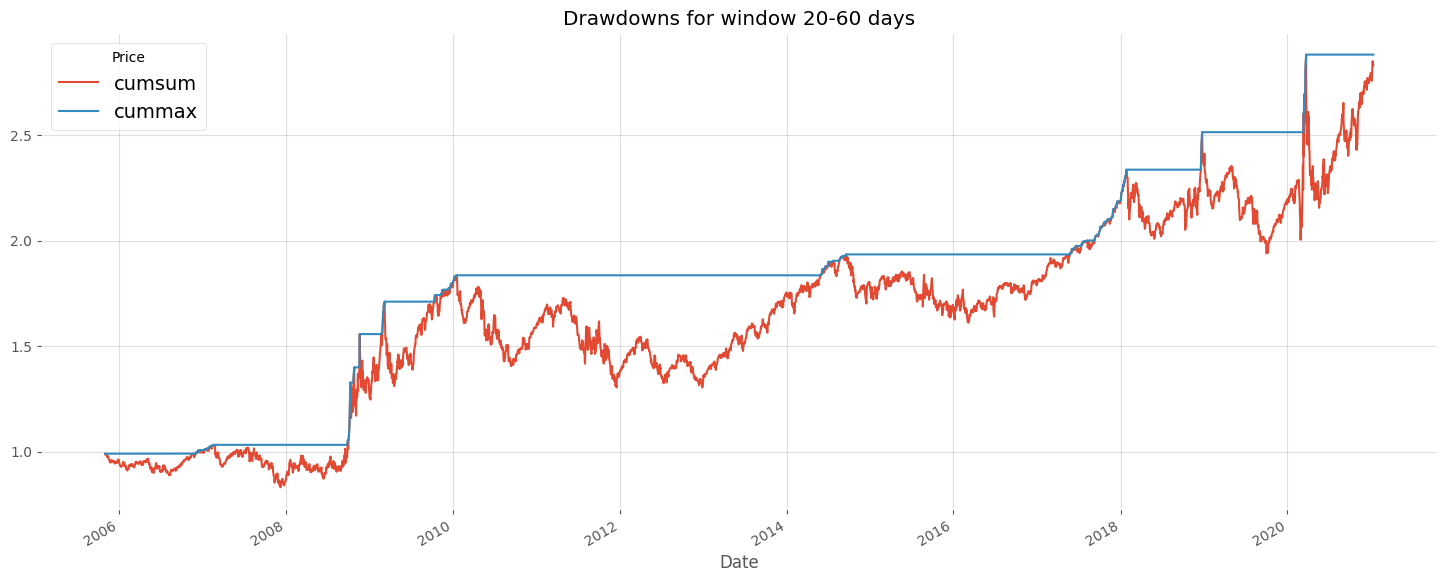

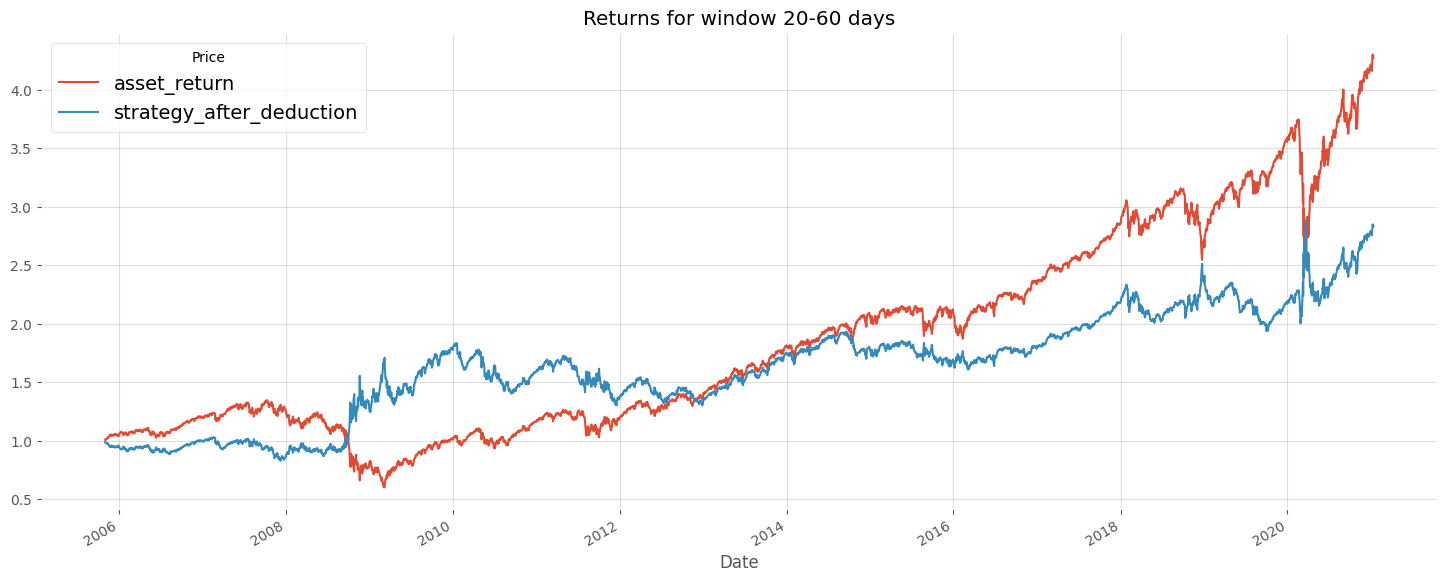


Testing for short window: 10 and long window: 60


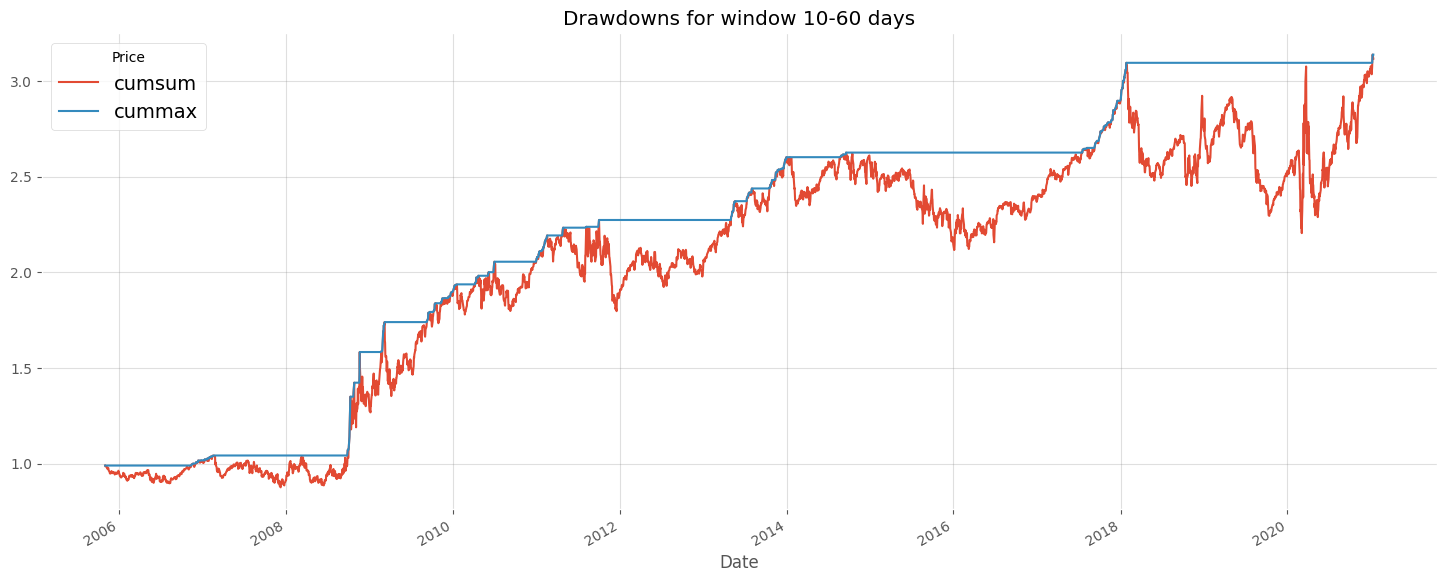

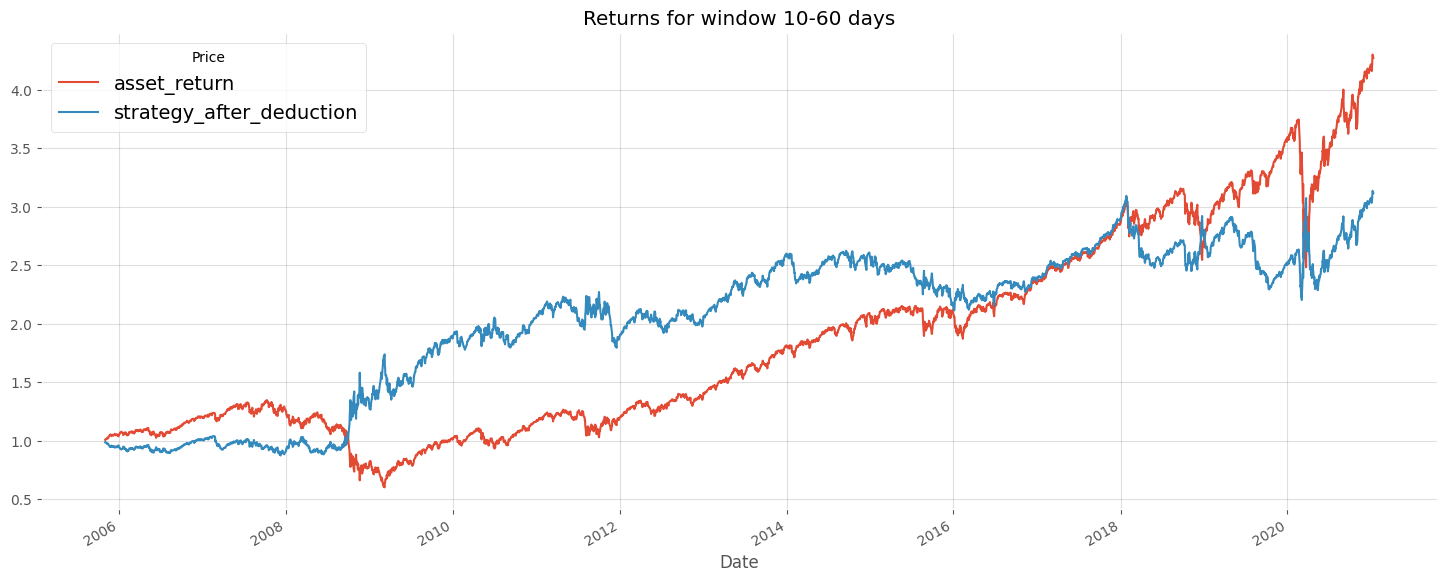


Testing for short window: 20 and long window: 50


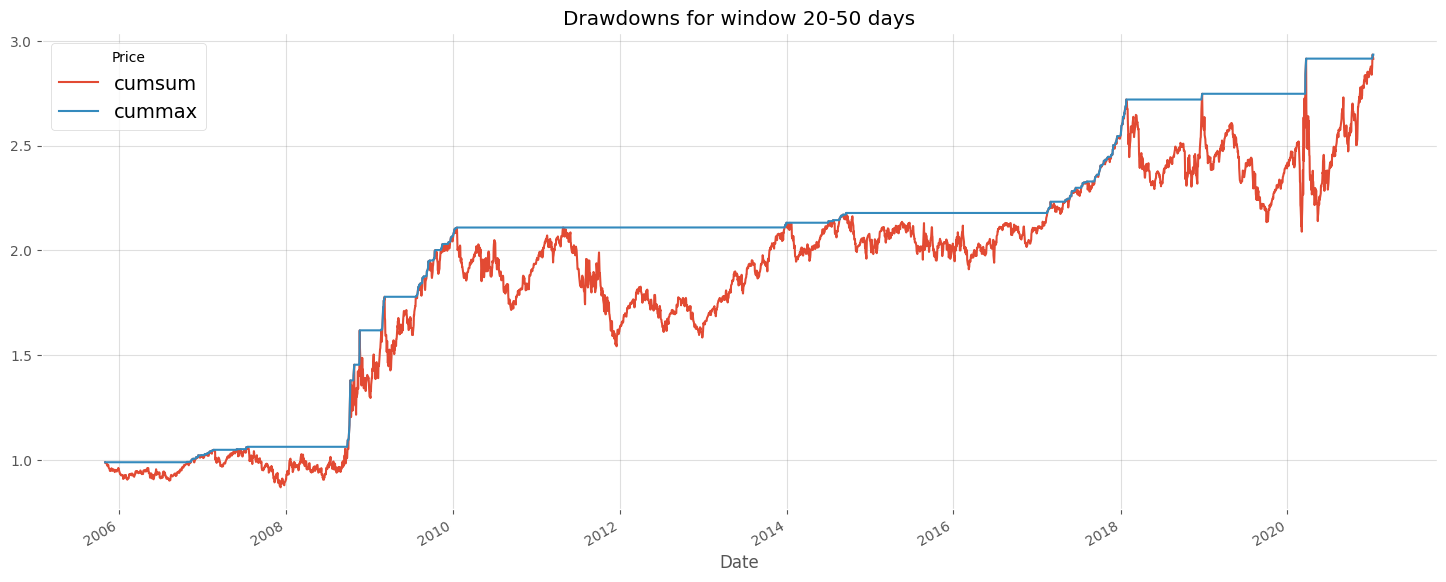

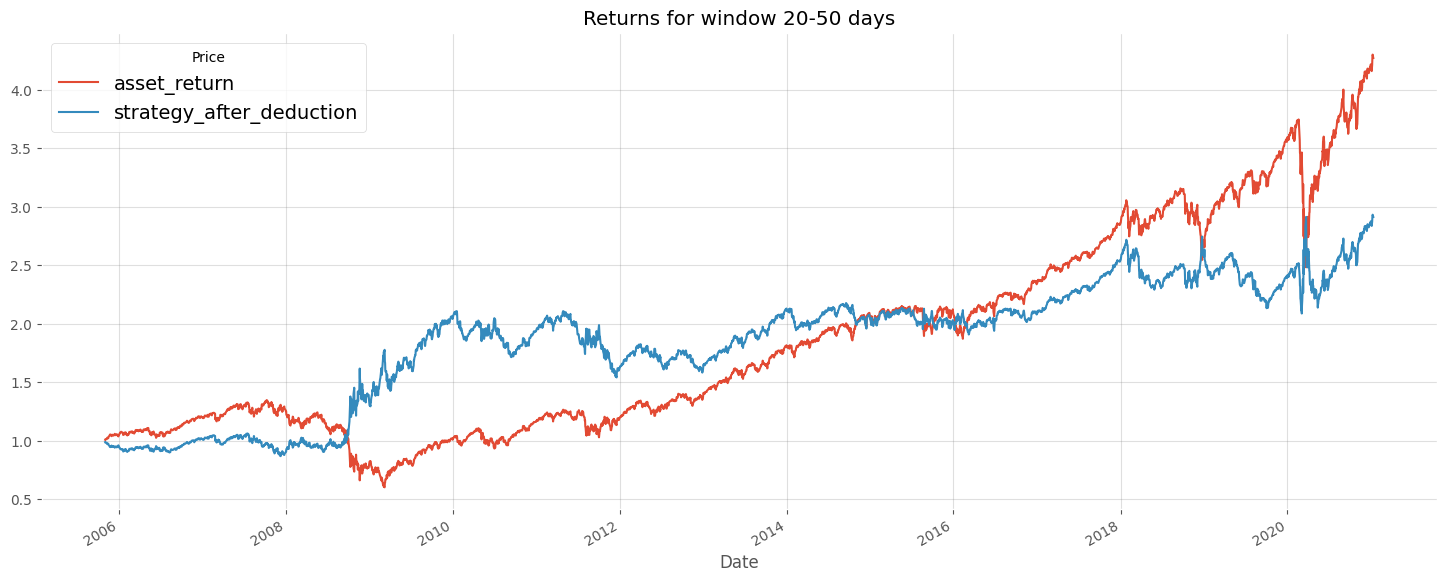


Testing for short window: 9 and long window: 21


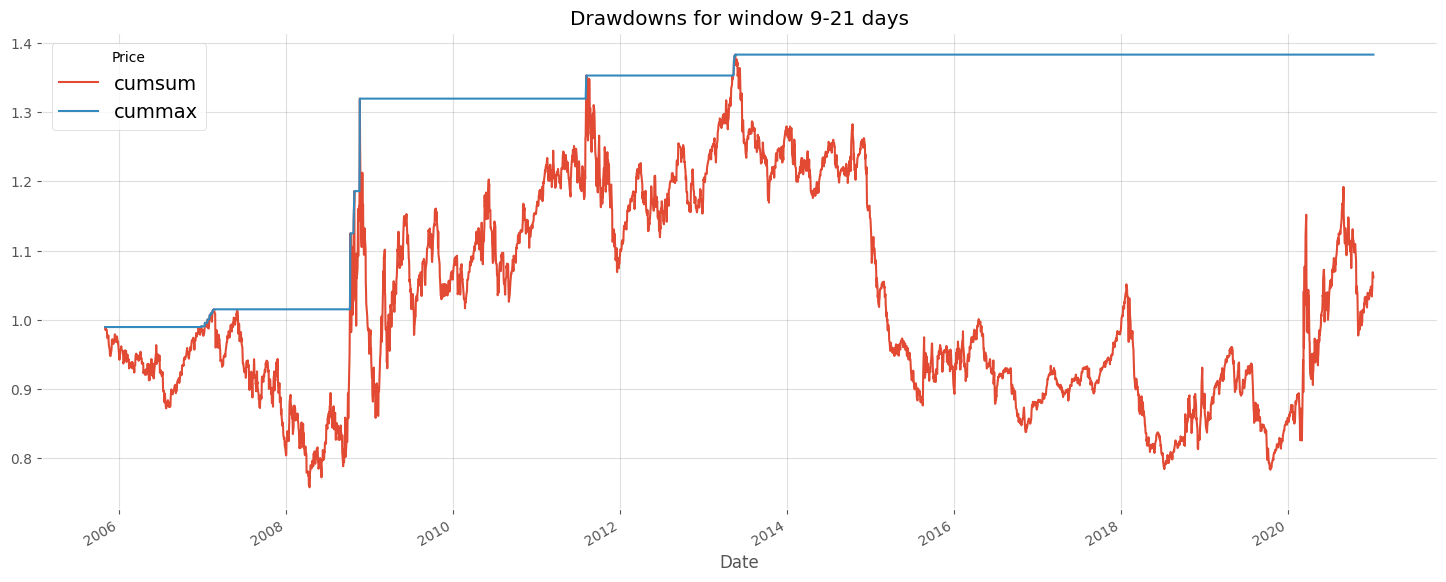

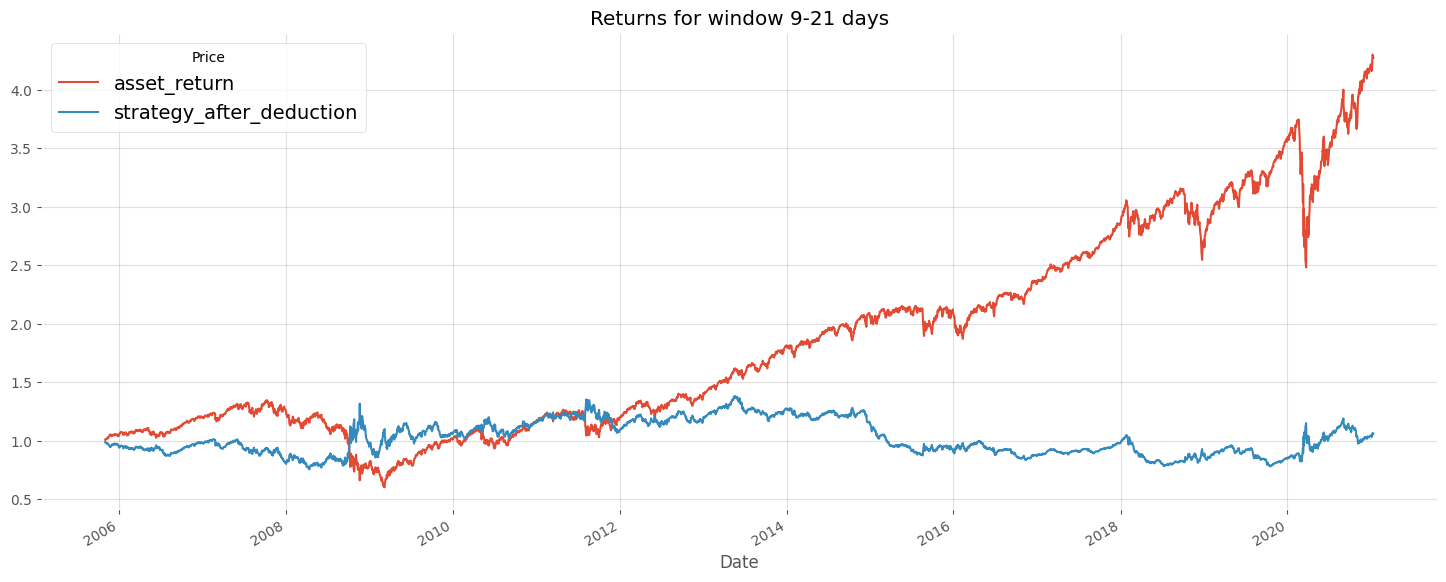


Testing for short window: 15 and long window: 30


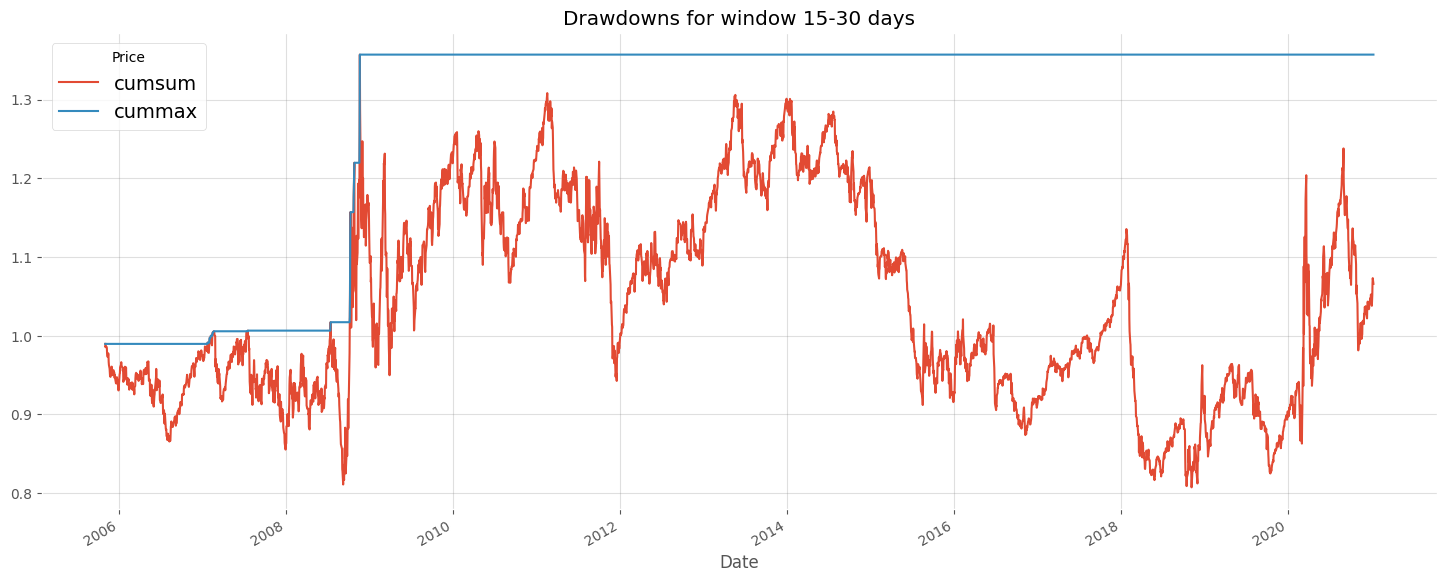

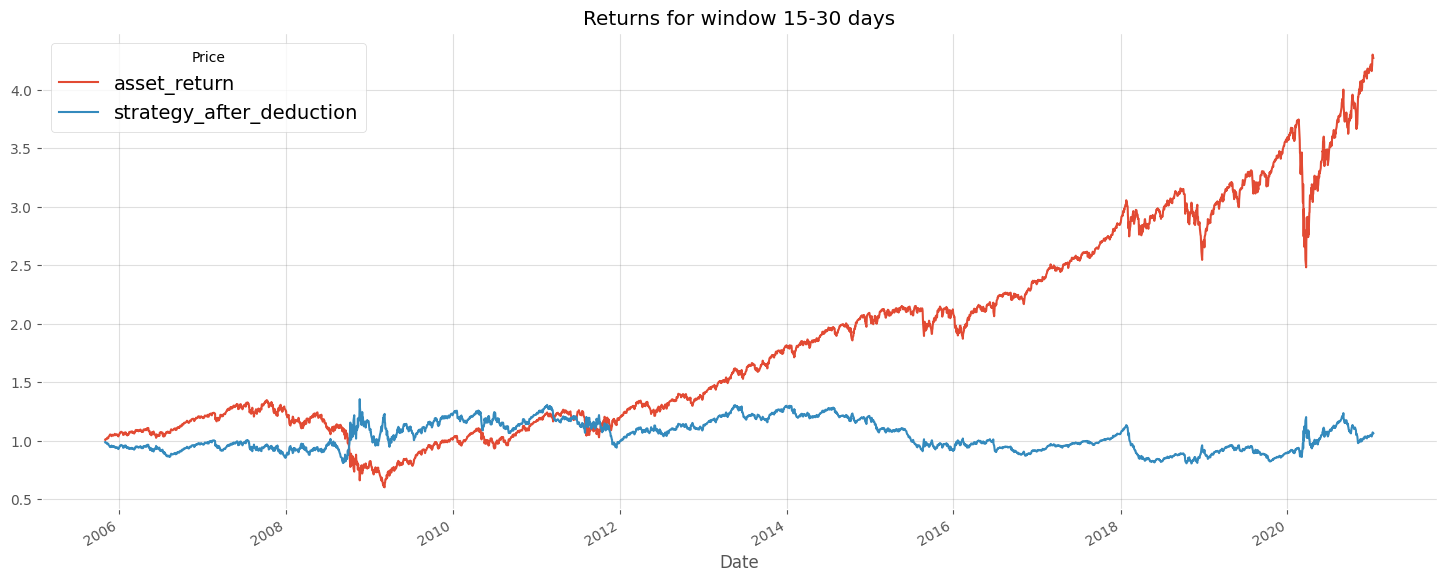


Results for each window combination:
   Short Window  Long Window  Final Capital  Max Drawdown  \
0            10           50     117.466155     -0.566564   
1            20           60     183.139063     -0.726212   
2            10           60     211.643760     -0.890158   
3            20           50     191.381545     -0.774894   
4             9           21       6.159796     -0.599615   
5            15           30       6.593328     -0.549756   

   Drawdown Duration (days)  Sharpe Ratio      CAGR  
0                      1273      0.356348  0.052419  
1                      1592      0.443368  0.070844  
2                      1077      0.474981  0.077620  
3                       970      0.452813  0.072867  
4                       991      0.119901  0.003939  
5                       448      0.121280  0.004208  


In [30]:
window_combinations = [(10, 50), (20, 60), (10, 60), (20, 50), (9, 21), (15, 30)]

results_list = []

for short_window, long_window in window_combinations:
    print(f"\nTesting for short window: {short_window} and long window: {long_window}")

    # Apply the strategy with each combination of short and long windows
    temp_train = train[['Adj Close']].copy()

    # Apply the short and long windows for SMA
    temp_train = EMA(temp_train, short_window)
    temp_train = EMA(temp_train, long_window)
    # Apply position crossover strategy
    temp_train = position_crossover_EMA(temp_train, short_window, long_window)  # Crossover strategy

    # Generate buy/sell signals and calculate returns
    temp_train = buy_sell(temp_train)
    temp_train = returns(temp_train)

    # Capital calculation (starting with investment)
    temp_train, final_amt = capital(temp_train, investment, 0)

    # Calculate cumulative max drawdown
    temp_train = cummax_drawdown(temp_train)

    # Get max drawdown value
    max_drawdown_value = max_drawdown(temp_train)

    # Get drawdown duration
    results = drawdown_duration(temp_train)
    max_drawdown_duration = results.loc[results['Duration'].idxmax(), 'Duration'].days

    # Calculate Sharpe ratio and CAGR
    sharpe_value = sharpe(temp_train)
    cagr_value = CAGR(temp_train)

    # Store results in the list
    results_list.append({
        'Short Window': short_window,
        'Long Window': long_window,
        'Final Capital': final_amt,
        'Max Drawdown': max_drawdown_value,
        'Drawdown Duration (days)': max_drawdown_duration,
        'Sharpe Ratio': sharpe_value,
        'CAGR': cagr_value
    })

    # Check the drawdown in detail
    check_drawdown(temp_train, f"{short_window}-{long_window} days")

    # Plot cumulative returns for each window combination
    plot_cumsum(temp_train, f"{short_window}-{long_window} days")

# Create a DataFrame from the results list
results_df = pd.DataFrame(results_list)

# Print the results table
print("\nResults for each window combination:")
print(results_df)


In [31]:
def backtest_ema(df, short_window, long_window):
    df = EMA(df, short_window)  # Short window SMA
    df = EMA(df, long_window)   # Long window SMA

    df = position_crossover_EMA(df, short_window, long_window)  # Crossover strategy

    df = buy_sell(df)
    df = returns(df)
    df,final_amt = capital(df, investment, 0)
    df = cummax_drawdown(df)
    print (f'\nfinal amount left is ${final_amt}')

    print(f'\nMax Drawdown for the {window} days window is {max_drawdown(df)}\n')

    results = drawdown_duration(df)
    print(f"\nMax Drawdown duration for the {short_window}-{long_window} days window is {results.loc[results['Duration'].idxmax(), 'Duration'].days} days")

    current = current_drawdown(df)
    print(f"\nDrawdown duration for drawdown still continuing is {current} days")

    print(f"\nThe sharpe is {sharpe(df)}\nThe CAGR is {CAGR(df)}\n")

    check_drawdown(df, f"{short_window}-{long_window} days")

    plot_cumsum(df, f"{short_window}-{long_window} days")


####Combine EMA, SMA and Mean Reversion

Combined strategy 1

In [32]:
def assign_position(df):
  df['position'] = df.apply(
      lambda row: row['position_mean_rev']
      if row['position_mean_rev'] == row['position_sma']==row['position_ema']
      else 0,
      axis =1
  )
  return df

In [33]:
def strategy1_pos(df, sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor):
  df = df[['Adj Close']].copy()
  df = SMA(df, mean_sma)
  df = SMA(df, mean_sma)
  df  = rolling_stdev(df, mean_sma)
  df= bounds(df, threshold_factor, mean_sma)
  df = trade_positions(df, mean_sma)
  df= df.rename(columns = {'position': 'position_mean_rev'})

  df = SMA(df, sma_s)  # Short window SMA
  df = SMA(df, sma_l)   # Long window SMA

  df = position_crossover(df, sma_s, sma_l)
  df= df.rename(columns = {'position': 'position_sma'})

  df = EMA(df, ema_s)  # Short window SMA
  df = EMA(df, ema_l)   # Long window SMA

  df = position_crossover_EMA(df, ema_s, ema_l)
  df= df.rename(columns = {'position': 'position_ema'})
  df = assign_position(df)
  return df


In [34]:
SPY = get_ticker(ticker, start, end)[['Adj Close']]
SPY = fix_dataframe(SPY)

print("\nMissing Values? =",
    SPY
      .isnull()
      .values
      .any()
    )

train, test = test_train(SPY, bound)

[*********************100%***********************]  1 of 1 completed


Missing Values? = False


In [35]:
def test_func1(df, sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor, investment=10000):
    df = strategy1_pos(df, sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor)
    df = buy_sell(df)
    df = returns(df)
    df, final_amt = capital(df, investment, 0)
    df = cummax_drawdown(df)

    sharpe_ratio = sharpe(df)
    cagr_value = CAGR(df)

    return final_amt, sharpe_ratio, cagr_value


In [36]:
import itertools

def test_strategy1(test_func1, df, sma_s_values, sma_l_values, mean_sma_values, ema_s_values, ema_l_values, threshold_factors, investment=10000):
    best_sharpe = -float('inf')
    best_final_amount = 0
    best_params = None

    param_combinations = list(itertools.product(sma_s_values, sma_l_values, mean_sma_values, ema_s_values, ema_l_values, threshold_factors))

    for sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor in param_combinations:
        final_amount, sharpe_ratio, cagr_value = test_func1(df.copy(), sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor)

        if sharpe_ratio > best_sharpe:
            best_sharpe = sharpe_ratio
            best_final_amount = final_amount
            best_params = (sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor)

    print(f"\nBest Parameters based on Sharpe ratio and final amount:")
    print(f"sma_s: {best_params[0]}, sma_l: {best_params[1]}, mean_sma: {best_params[2]}, ema_s: {best_params[3]}, ema_l: {best_params[4]}, threshold_factor: {best_params[5]}")
    print(f"Best Final Amount: ${best_final_amount:.2f}")
    print(f"Best Sharpe Ratio: {best_sharpe:.2f}")


In [ ]:
investments = 100000
sma_s_values = [10, 15, 20]
sma_l_values = [60, 100, 150]
mean_sma_values = [30, 50]
ema_s_values = [10, 15]
ema_l_values = [60, 100]
threshold_factors = [1.5, 2, 2.5]

test_strategy1(test_func1, train, sma_s_values, sma_l_values, mean_sma_values, ema_s_values, ema_l_values, threshold_factors)

In [37]:
def backtest_combi1(df, sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor, investment):
    df = strategy1_pos(df, sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor)

    df = buy_sell(df)
    df = returns(df)
    df,final_amt = capital(df, investment, 0)
    df = cummax_drawdown(df)
    print (f'\nfinal amount left is ${final_amt}')

    print(f'\nMax Drawdown  is {max_drawdown(df)}\n')

    results = drawdown_duration(df)

    print(f"\nMax Drawdown duration for is {results.loc[results['Duration'].idxmax(), 'Duration'].days} days")

    current = current_drawdown(df)
    print(f"\nDrawdown duration for drawdown still continuing is {current} days")


    print(f"\nThe sharpe is {sharpe(df)}\nThe CAGR is {CAGR(df)}\n")

    check_drawdown(df, f"Drawdown")

    plot_cumsum(df, f"Returns")

In [38]:
# Function to define positions based on crossover of SMA and EMA
def define_positions(df, sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor):
    # 1. Calculate short-term and long-term SMA, EMA
    df = SMA(df, sma_s)
    df = SMA(df, sma_l)
    df = SMA(df, mean_sma)
    df = EMA(df, ema_l)
    df = EMA(df, ema_s)

    df = rolling_stdev(df, mean_sma)     # Rolling standard deviation
    df = bounds(df, threshold_factor, mean_sma)

    # 3. Define Position: Buy (1), Sell (-1), No Position (0)
    df['position'] = 0  # Default to no position

    # --- Position Logic ---
    # 1. Buy Signal: Short-term SMA > Long-term SMA (SMA crossover) and price below lower threshold (Mean Reversion)
    df['position'] = np.where(
        (df[f'SMA_{sma_s}'] > df[f'SMA_{sma_l}']) &
        (df['Adj Close'] < df['range_lower']), 1, df['position']
    )

    # 2. Sell Signal: Short-term SMA < Long-term SMA (SMA crossover) and price above upper threshold (Mean Reversion)
    df['position'] = np.where(
        (df[f'SMA_{sma_s}'] < df[f'SMA_{sma_l}']) &
        (df['Adj Close'] > df['range_upper']), -1, df['position']
    )

    # 3. Buy Signal: Short-term EMA > Long-term EMA (EMA crossover) and price below lower threshold (Mean Reversion)
    df['position'] = np.where(
        (df[f'EMA_{ema_s}'] > df[f'EMA_{ema_l}']) &
        (df['Adj Close'] < df['range_lower']), 1, df['position']
    )

    # 4. Sell Signal: Short-term EMA < Long-term EMA (EMA crossover) and price above upper threshold (Mean Reversion)
    df['position'] = np.where(
        (df[f'EMA_{ema_s}'] < df[f'EMA_{ema_l}']) &
        (df['Adj Close'] > df['range_upper']), -1, df['position']
    )

    # Forward fill positions to hold the position until a change occurs
    df['position'] = df['position'].ffill()

    return df

In [39]:
SPY = get_ticker(ticker, start, end)[['Adj Close']]
SPY = fix_dataframe(SPY)

print("\nMissing Values? =",
    SPY
      .isnull()
      .values
      .any()
    )

train, test = test_train(SPY, bound)

[*********************100%***********************]  1 of 1 completed


Missing Values? = False


In [40]:
def test_func(df, sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor, investment=10000):
    df = define_positions(df, sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor)
    df = buy_sell(df)
    df = returns(df)
    df, final_amt = capital(df, investment, 0)
    df = cummax_drawdown(df)

    sharpe_ratio = sharpe(df)
    cagr_value = CAGR(df)

    return final_amt, sharpe_ratio, cagr_value


In [41]:
import itertools

def test_strategy(test_func, df, sma_s_values, sma_l_values, mean_sma_values, ema_s_values, ema_l_values, threshold_factors, investment=10000):
    best_sharpe = -float('inf')
    best_final_amount = 0
    best_params = None

    param_combinations = list(itertools.product(sma_s_values, sma_l_values, mean_sma_values, ema_s_values, ema_l_values, threshold_factors))

    for sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor in param_combinations:
        final_amount, sharpe_ratio, cagr_value = test_func(df.copy(), sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor)

        if sharpe_ratio > best_sharpe:
            best_sharpe = sharpe_ratio
            best_final_amount = final_amount
            best_params = (sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor)

    print(f"\nBest Parameters based on Sharpe ratio and final amount:")
    print(f"sma_s: {best_params[0]}, sma_l: {best_params[1]}, mean_sma: {best_params[2]}, ema_s: {best_params[3]}, ema_l: {best_params[4]}, threshold_factor: {best_params[5]}")
    print(f"Best Final Amount: ${best_final_amount:.2f}")
    print(f"Best Sharpe Ratio: {best_sharpe:.2f}")


In [ ]:
investments = 100000
sma_s_values = [10, 15, 20]
sma_l_values = [60, 100, 150]
mean_sma_values = [30, 50]
ema_s_values = [10, 15]
ema_l_values = [60, 100]
threshold_factors = [1.5, 2, 2.5]

test_strategy(test_func, train, sma_s_values, sma_l_values, mean_sma_values, ema_s_values, ema_l_values, threshold_factors)


Best Parameters based on Sharpe ratio and final amount:
sma_s: 20, sma_l: 100, mean_sma: 30, ema_s: 10, ema_l: 60, threshold_factor: 2
Best Final Amount: $60.39
Best Sharpe Ratio: 0.77


In [42]:
def backtest_combi(df, sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor, investment):
    df = define_positions(df, sma_s, sma_l, mean_sma, ema_s, ema_l, threshold_factor)

    df = buy_sell(df)
    df = returns(df)
    df,final_amt = capital(df, investment, 0)
    df = cummax_drawdown(df)
    print (f'\nfinal amount left is ${final_amt}')

    print(f'\nMax Drawdown  is {max_drawdown(df)}\n')

    results = drawdown_duration(df)

    print(f"\nMax Drawdown duration for is {results.loc[results['Duration'].idxmax(), 'Duration'].days} days")

    current = current_drawdown(df)
    print(f"\nDrawdown duration for drawdown still continuing is {current} days")


    print(f"\nThe sharpe is {sharpe(df)}\nThe CAGR is {CAGR(df)}\n")

    check_drawdown(df, f"Drawdown")

    plot_cumsum(df, f"Returns")

##**Machine Learning Strategy** - Jisen

In [ ]:
SPY_ML = SPY.copy()
SPY_ML = fix_dataframe(SPY_ML)
# def remove_time_component(df):
#   df.index = pd.to_datetime(df.index).date
#   return df
# SPY_ML = remove_time_component(SPY_ML)
SPY_ML.head()

Price       Adj Close
Date                 
2005-11-01  83.991150
2005-11-02  84.869446
2005-11-03  85.231956
2005-11-04  85.120430
2005-11-07  85.204071

###**Technical Indicators**

In [ ]:
def add_technical_features(df):
    """Add technical indicators as features"""
    df['Returns'] = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

    # RSI
    delta = df['Adj Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(window=14).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # SMA (Simple Moving Averages)
    df['SMA_5'] = df['Adj Close'].rolling(window=5).mean()
    df['SMA_20'] = df['Adj Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Adj Close'].rolling(window=50).mean()

    # Volatility
    df['Volatility_20'] = df['Returns'].rolling(window=20).std()

    # Momentum
    df['Momentum_5'] = df['Returns'].rolling(5).sum()
    df['Momentum_20'] = df['Returns'].rolling(20).sum()

    # MACD
    df['MACD'] = df['Adj Close'].ewm(span=12, adjust=False).mean() - \
                 df['Adj Close'].ewm(span=26, adjust=False).mean()
    df['Signal_Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

    df.dropna(inplace=True)
    return df

SPY_ML = add_technical_features(SPY_ML)
# SPY_ML.dropna(inplace=True)  # Drop rows with NaN values

In [ ]:
# Create Target Variable
def create_target(df, forward_period=5):
    """Create binary target variable based on future returns"""
    df['Forward_Returns'] = df['Returns'].shift(-forward_period).rolling(forward_period).sum()
    df['Target'] = (df['Forward_Returns'] > 0).astype(int)
    return df

SPY_ML = create_target(SPY_ML)

# Split Data into Training and Testing
train_split = 0.8
split_idx = int(len(SPY_ML) * train_split)
SPY_train = SPY_ML.iloc[:split_idx]
SPY_test = SPY_ML.iloc[split_idx:]

# Feature Selection
feature_columns = ['RSI', 'SMA_5', 'SMA_20', 'SMA_50', 'Volatility_20', 'Momentum_5', 'Momentum_20', 'MACD', 'Signal_Line']
X_train, y_train = SPY_train[feature_columns], SPY_train['Target']
X_test, y_test = SPY_test[feature_columns], SPY_test['Target']

###**All Models**

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define a dictionary of models with their respective hyperparameters
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42),  # Random Forest Classifier
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),  # Gradient Boosting Classifier
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),  # Logistic Regression
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),  # Support Vector Machine (SVM) with RBF kernel
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),  # Decision Tree Classifier
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),  # Extra Trees Classifier
}

results = {}
# Loop through each model in the dictionary
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

    # Make predictions on the training and testing data
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Store the model and its results in the results dictionary
    results[model_name] = {
        "model": model,
        "train_pred": train_pred,
        "test_pred": test_pred,
        "train_report": classification_report(y_train, train_pred, output_dict=True),
        "test_report": classification_report(y_test, test_pred, output_dict=True)
    }

Training Random Forest...
Training Gradient Boosting...
Training Logistic Regression...
Training SVM...
Training Decision Tree...
Training Extra Trees...


In [ ]:
from pandas import DataFrame, concat

structured_results = {}
# Iterate over the results dictionary, which contains metrics for each model
for model_name, metrics in results.items():
    train_report_df = (
        DataFrame(metrics["train_report"])
        .T
        .reset_index()
        .rename(columns={"index": "Class"})
    )
    train_report_df["Set"] = "Train"
    train_report_df["Model"] = model_name

    test_report_df = (
        DataFrame(metrics["test_report"])  #
        .T
        .reset_index()
        .rename(columns={"index": "Class"})
    )
    test_report_df["Set"] = "Test"
    test_report_df["Model"] = model_name
    structured_results[model_name] = concat([train_report_df, test_report_df], ignore_index=True)

# Combine results for all models into a single DataFrame
final_results_df = concat(structured_results.values(), ignore_index=True)

# Reorganize columns to ensure consistency
if 'final_results_df' in locals():
    columns_order = ["Model", "Set", "Class", "precision", "recall", "f1-score", "support"]
    final_results_df = final_results_df[columns_order]

final_results_df

Model    Set         Class  precision    recall  f1-score  \
0         Random Forest  Train             0   0.954545  0.124506  0.220280   
1         Random Forest  Train             1   0.629495  0.996030  0.771438   
2         Random Forest  Train      accuracy   0.646499  0.646499  0.646499   
3         Random Forest  Train     macro avg   0.792020  0.560268  0.495859   
4         Random Forest  Train  weighted avg   0.759859  0.646499  0.550392   
5         Random Forest   Test             0   0.369106  0.602122  0.457661   
6         Random Forest   Test             1   0.548193  0.319298  0.403548   
7         Random Forest   Test      accuracy   0.431890  0.431890  0.431890   
8         Random Forest   Test     macro avg   0.458649  0.460710  0.430604   
9         Random Forest   Test  weighted avg   0.476898  0.431890  0.425090   
10    Gradient Boosting  Train             0   0.888393  0.393281  0.545205   
11    Gradient Boosting  Train             1   0.704144  0.966917  0.814870   
12    Gradient Boosting  Train      accuracy   0.736856  0.736856  0.736856   
13    Gradient Boosting  Train     macro avg   0.796268  0.680099  0.680038   
14    Gradient Boosting  Train  weighted avg   0.778038  0.736856  0.706719   
15    Gradient Boosting   Test             0   0.396721  0.962865  0.561920   
16    Gradient Boosting   Test             1   0.562500  0.031579  0.059801   
17    Gradient Boosting   Test      accuracy   0.402323  0.402323  0.402323   
18    Gradient Boosting   Test     macro avg   0.479611  0.497222  0.310860   
19    Gradient Boosting   Test  weighted avg   0.496504  0.402323  0.259694   
20  Logistic Regression  Train             0   0.733333  0.007246  0.014351   
21  Logistic Regression  Train             1   0.600265  0.998236  0.749710   
22  Logistic Regression  Train      accuracy   0.600793  0.600793  0.600793   
23  Logistic Regression  Train     macro avg   0.666799  0.502741  0.382031   
24  Logistic Regression  Train  weighted avg   0.653633  0.600793  0.454789   
25  Logistic Regression   Test             0   0.000000  0.000000  0.000000   
26  Logistic Regression   Test             1   0.600636  0.994737  0.749009   
27  Logistic Regression   Test      accuracy   0.598733  0.598733  0.598733   
28  Logistic Regression   Test     macro avg   0.300318  0.497368  0.374505   
29  Logistic Regression   Test  weighted avg   0.361523  0.598733  0.450829   
30                  SVM  Train             0   0.000000  0.000000  0.000000   
31                  SVM  Train             1   0.598943  1.000000  0.749174   
32                  SVM  Train      accuracy   0.598943  0.598943  0.598943   
33                  SVM  Train     macro avg   0.299472  0.500000  0.374587   
34                  SVM  Train  weighted avg   0.358733  0.598943  0.448713   
35                  SVM   Test             0   0.000000  0.000000  0.000000   
36                  SVM   Test             1   0.601901  1.000000  0.751483   
37                  SVM   Test      accuracy   0.601901  0.601901  0.601901   
38                  SVM   Test     macro avg   0.300950  0.500000  0.375742   
39                  SVM   Test  weighted avg   0.362284  0.601901  0.452318   
40        Decision Tree  Train             0   0.602785  0.484848  0.537422   
41        Decision Tree  Train             1   0.695008  0.786061  0.737735   
42        Decision Tree  Train      accuracy   0.665258  0.665258  0.665258   
43        Decision Tree  Train     macro avg   0.648896  0.635455  0.637579   
44        Decision Tree  Train  weighted avg   0.658021  0.665258  0.657399   
45        Decision Tree   Test             0   0.415254  0.129973  0.197980   
46        Decision Tree   Test             1   0.604343  0.878947  0.716226   
47        Decision Tree   Test      accuracy   0.580781  0.580781  0.580781   
48        Decision Tree   Test     macro avg   0.509798  0.504460  0.457103   
49        Decision Tree   Test  weighted avg   0.529067  0.580781  0

---
#**Part 2**

## Pure momentum strategy (Binh)

### On the whole period

In [ ]:
SPY_momentum_3_metrics

long_short
Sharpe Ratio                          0.75
Price Cumulative Return (%)         382.84
Strategy Cumulative Return (%)     1294.37
Price CAGR (%)                        8.66
Strategy CAGR (%)                     14.9
Max Drawdown (%)                    -32.32
Longest Drawdown Period           528 days
Longest Drawdown Start Date     2022-01-03
Longest Drawdown End Date       2023-06-15
Cumulative Equity               1394374.57

So for the whole period 2005-2004, with the hybrid strategy using only momentum concepts have:
- Sharpe: 0.75
- Cumulative return: 1294% vs Price return of 383%
- Strategy CAGR: 14.9% vs Price CAGR of 8.7%
- Max Drawdown: 32%
- From an intial equity of $100,000, we end up with \$1,394,375.

### For the test set
* We can simply split the performance DataFrame above into the 2nd part corresponding to the test set, and calculate cumulative performance metrics from that point.
* However, for intuitive verification, I re-run all the steps of the hybrid momentum strategy on the test data here.

In [ ]:
momentum_test
# My train and test uses 75:25 because for the 200/252 days strategy, which is equivalent to 1 trading year,
# if I used 80:20 then much data is lost

Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-01-31  327.000000  327.170013  320.730011  321.730011  299.287628   
2020-02-03  323.350006  326.160004  323.220001  324.119995  301.510925   
2020-02-04  328.070007  330.010010  327.720001  329.059998  306.106354   
2020-02-05  332.269989  333.089996  330.670013  332.859985  309.641235   
2020-02-06  333.910004  334.190002  332.799988  333.980011  310.683136   
...                ...         ...         ...         ...         ...   
2024-10-23  581.260010  581.710022  574.419983  577.989990  577.989990   
2024-10-24  579.979980  580.059998  576.570007  579.239990  579.239990   
2024-10-25  581.510010  584.460022  578.080017  579.039978  579.039978   
2024-10-28  582.580017  582.710022  580.520020  580.830017  580.830017   
2024-10-29  579.849976  582.909973  578.429993  581.770020  581.770020   

               Volume  
Date                   
2020-01-31  113845600  
2020-02-03   69083000  
2020-02-04   62573200  
2020-02-05   65951100  
2020-02-06   50359700  
...               ...  
2024-10-23   49314600  
2024-10-24   34979900  
2024-10-25   47268200  
2024-10-28   30174700  
2024-10-29   42899700  

[1195 rows x 6 columns]

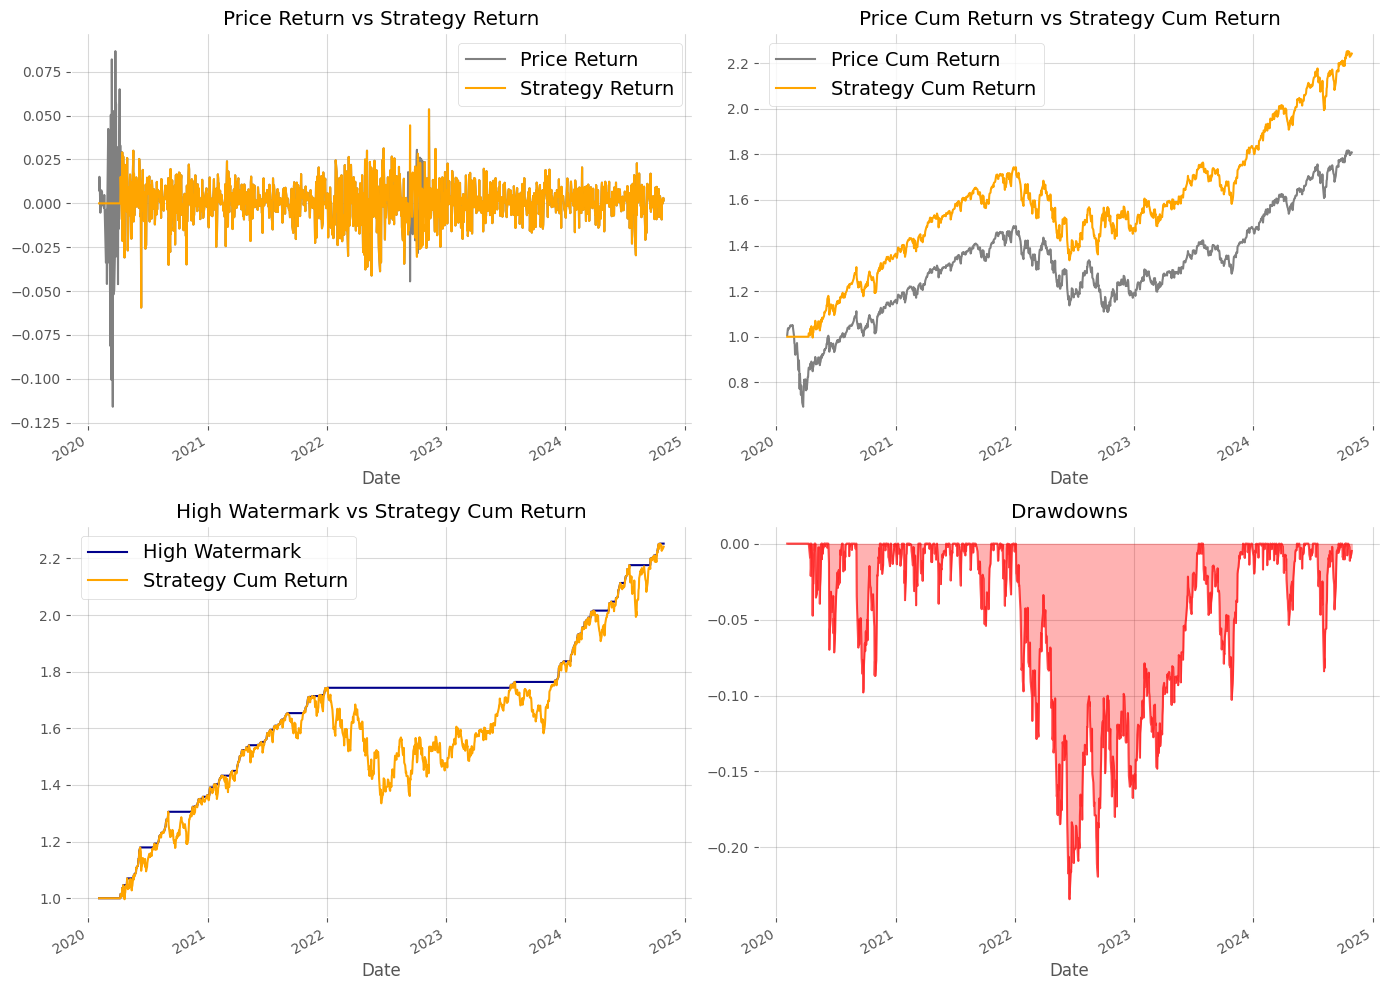

long_short
Sharpe Ratio                          1.01
Price Cumulative Return (%)          80.83
Strategy Cumulative Return (%)      124.17
Price CAGR (%)                       13.31
Strategy CAGR (%)                    18.56
Max Drawdown (%)                    -23.41
Longest Drawdown Period           561 days
Longest Drawdown Start Date     2022-01-03
Longest Drawdown End Date       2023-07-18
Cumulative Equity                224165.29

In [ ]:
# Step 1: Implement the 1st layer of MACD strategy
SPY_test_macd_entry = (macd_strategy(
    momentum_test, price = 'Close', short_ema=12, long_ema=26, signal_ema=9,min_periods=None,
    upper_MACD=7, lower_MACD=-5, cross_days=10, plot=False))

SPY_test_macd_signals = (
    macd_combined_signals(SPY_test_macd_entry, entry_col='Long_term_MACD_12_26_9', new_col='MACD_Combined_Signals',
                          plot = False, macd_col='MACD_12_26', macd_signal_col='MACD_line_9', price='Close'))

# Step 2: Add 2nd layer of the 200/252 strategy
SPY_test_trend_252 = trend_252(momentum_test, price_col='Close', volume_col='Volume',
                          threshold=0.03, plot = False)

SPY_test_2_signals = merge_strategy_long_override(SPY_test_macd_signals, SPY_test_trend_252, 'MACD_Combined_Signals',
                   'Trend_252_Combined_Signals', 'Close', plot=False)

# Step 3: Add 3rd layer to anticipate spikes
SPY_test_log_data = log_return_calc(momentum_test,
                               price_cols=['Open', 'High', 'Low', 'Close'],
                               volume_col='Volume')

SPY_test_spike_signals = spike_strategy(SPY_test_log_data, price_col='Close', log_return_col='Log_Return_Close',
                                   volume_col='Volume', ewma_days=21, short_threshold=0.025,
                                   long_threshold=None, volume_break_threshold = 0.2, plot=False)

SPY_test_3_signals = merge_strategy_long_override(SPY_test_2_signals, SPY_test_spike_signals,
                                                  'Merge_signals_long_override', 'Spike_Signals',
                                                  'Close', plot=False)

SPY_test_3_pos = (strategy_positions(SPY_test_3_signals, signal_col='Merge_signals_long_override',
                                   strategy='long_short'))

# Step 4: Evaluate the performance
SPY_test_3_calc, SPY_test_3_metrics = (
    strategy_summary(SPY_test_3_pos, date_col='Date', positions='Positions', price_col='Close',
                     strategy='long_short', drawdown='max', initial_capital=100000, plot=True))

SPY_test_3_metrics

* We can see that despite a long drawdown period, the strategy even shows better performance in the test set compared to the whole period.
* The Sharpe ratio is 1.01.
* The strategy cumulative return is 124.2% vs price cumulative return of 80.9%.
* The strategy CAGR is 18.6% compared to price CAGR of 13.3%.
* The Max Drawdown is -23.41%.
* If we invest with 100,000 from 31 Jan 2020, we end up with 224,165 by October 2024.
* From the cumulative return graph, the gap between the strategy and price are increasingly larger overtime, which is a good sign.

##**Mean Reversion and Moving Average Strategies** - ishani

I focused primarily on the test set to evaluate strategy performance, as the training set was used to determine the appropriate window period. This approach was designed to prevent lookahead bias (discussed more in Part 4). Subsequently, the performance of mean reversion and moving average strategies was assessed based solely on the test set.

However, I have shown the performance on the whole SPY data set as a reference.

In [52]:
SPY = get_ticker(ticker, start, end)[['Adj Close']]
SPY = fix_dataframe(SPY)

print("\nMissing Values? =",
    SPY
      .isnull()
      .values
      .any()
    )

train, test = test_train(SPY, bound)

[*********************100%***********************]  1 of 1 completed


Missing Values? = False


### Mean reversion

In [53]:
test1 = test.copy()
SPY1 = SPY.copy()


final amount left is $31.73619143636508

Max Drawdown for the 30 days window is -0.2618770646020796


Max Drawdown duration for the 30 days window is 146 days

Drawdown duration for drawdown still continuing is 351 days

The sharpe is 0.6633268951806979
The CAGR is 0.07778815147337803



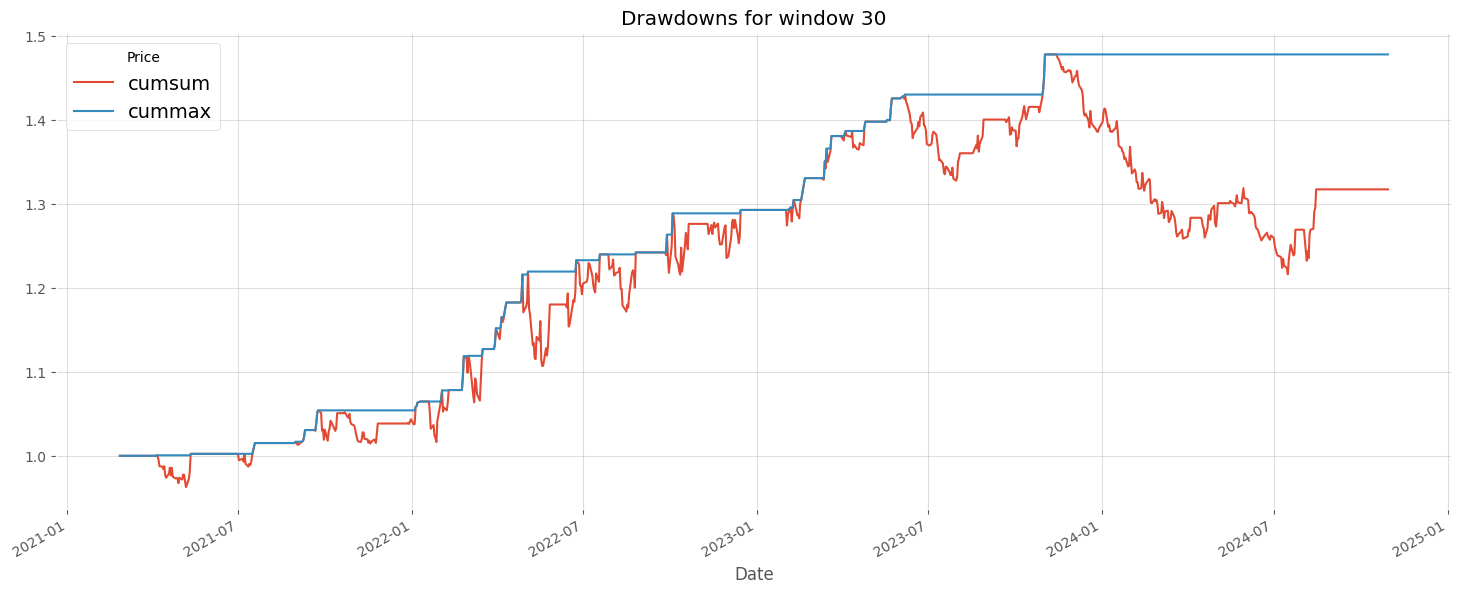

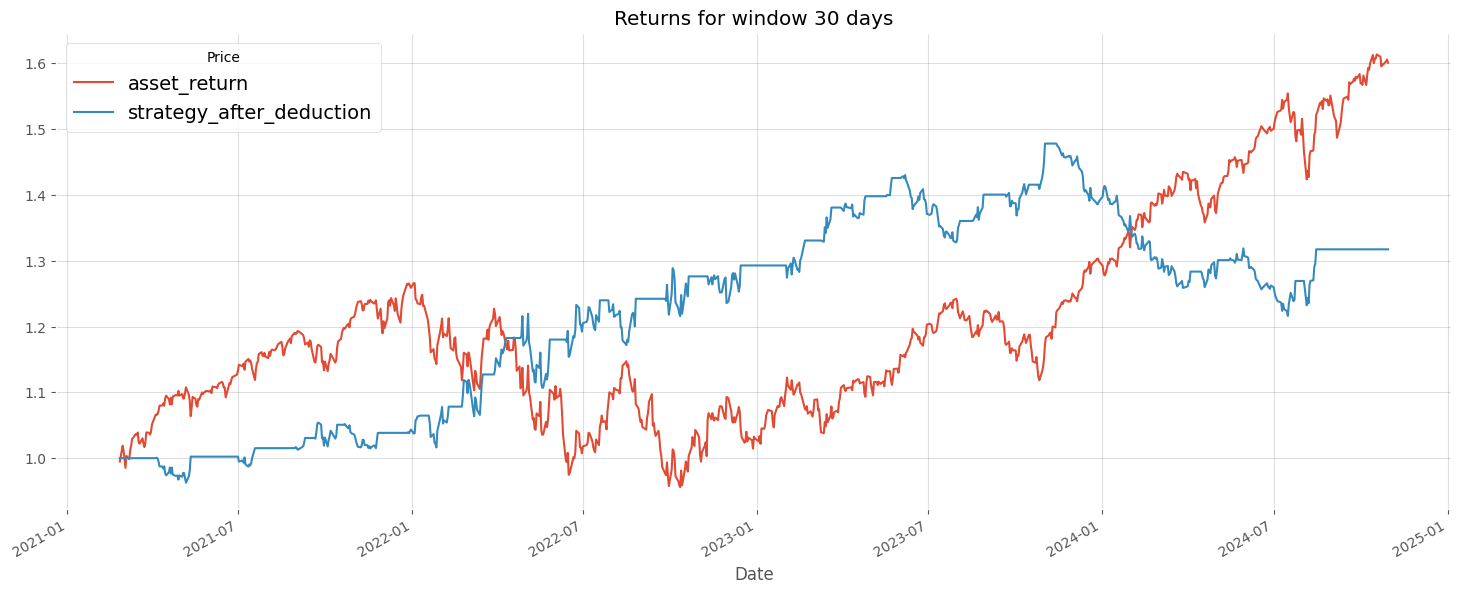

In [55]:
#Only on test set - strategy evaluation
backtest(test1,30)


final amount left is $183.26150106972085

Max Drawdown for the 30 days window is -0.6040706867693231


Max Drawdown duration for the 30 days window is 769 days

Drawdown duration for drawdown still continuing is 351 days

The sharpe is 0.4335116773315447
The CAGR is 0.056775240596190324



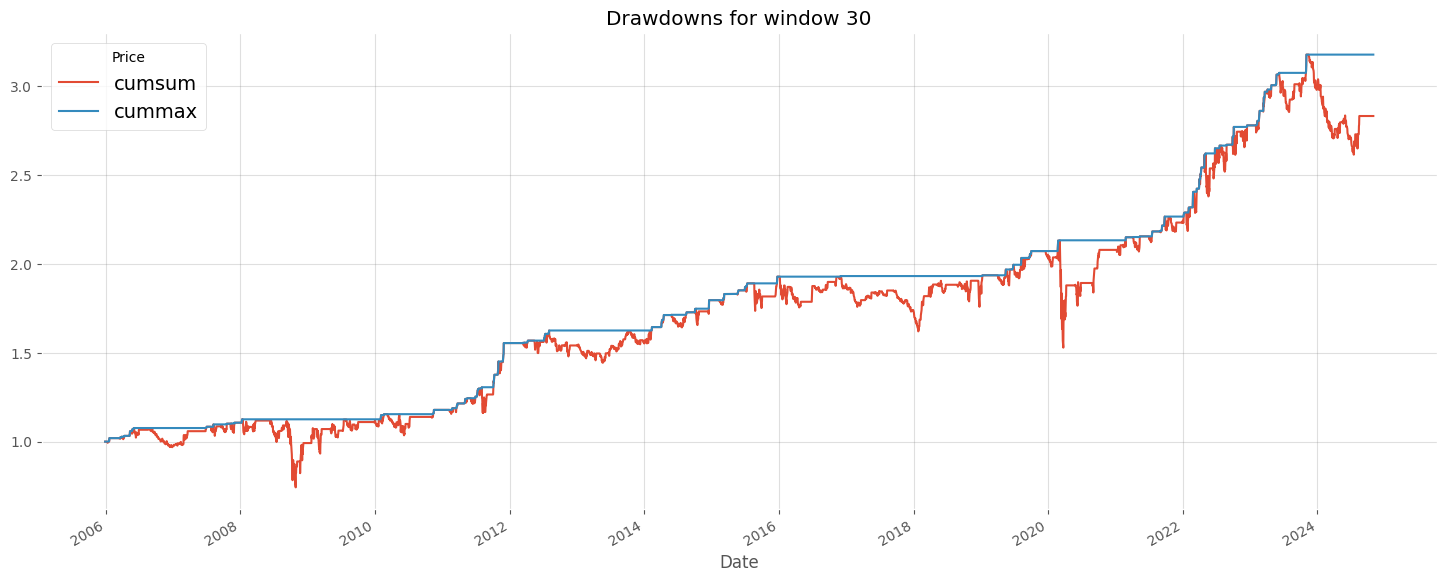

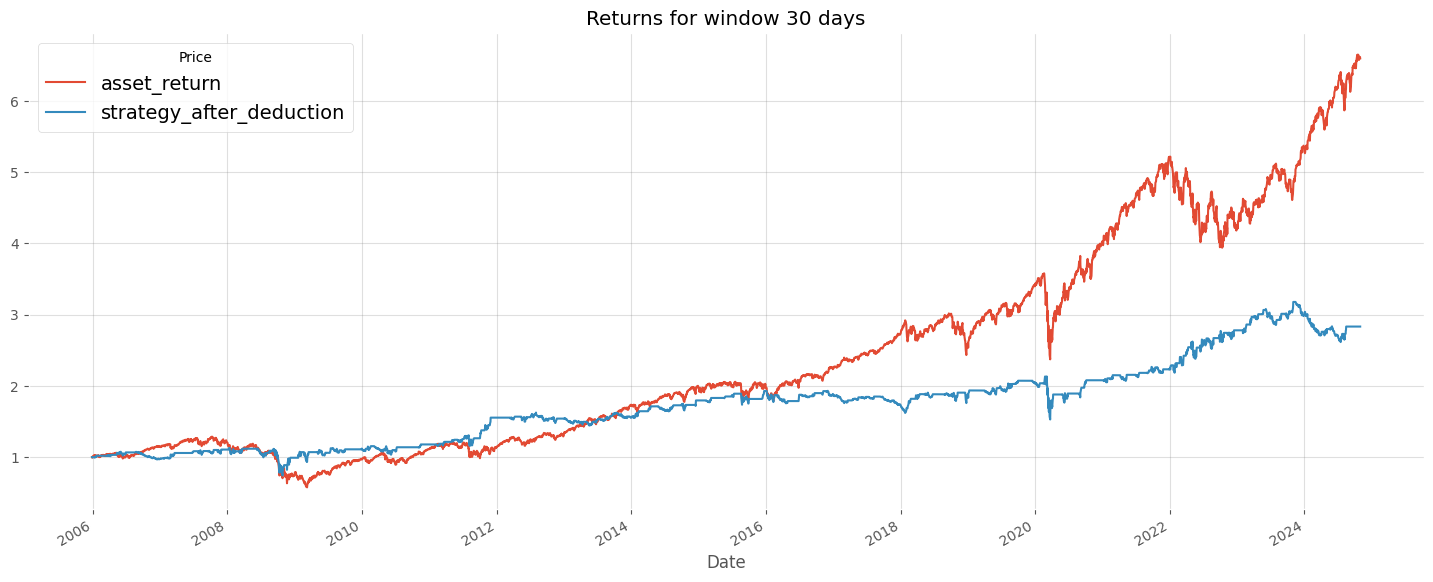

In [56]:
#SPY for reference
backtest(SPY1,30)

###Simple moving average

In [57]:
test2 = test.copy()
SPY2 = SPY.copy()


final amount left is $-27.836488969492766

Max Drawdown for the 30 days window is -0.41203875500999565


Max Drawdown duration for the 20-60 days window is 213 days

Drawdown duration for drawdown still continuing is 1154 days

The sharpe is -0.4360078538613364
The CAGR is -0.08226948510610588



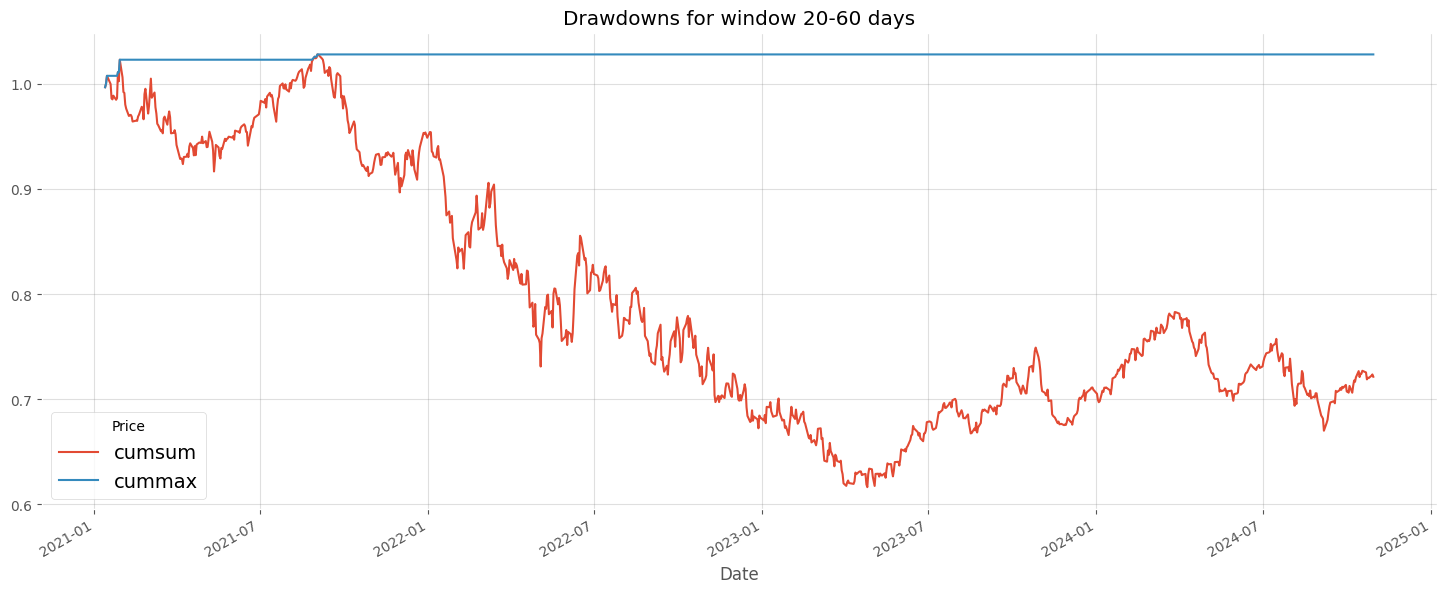

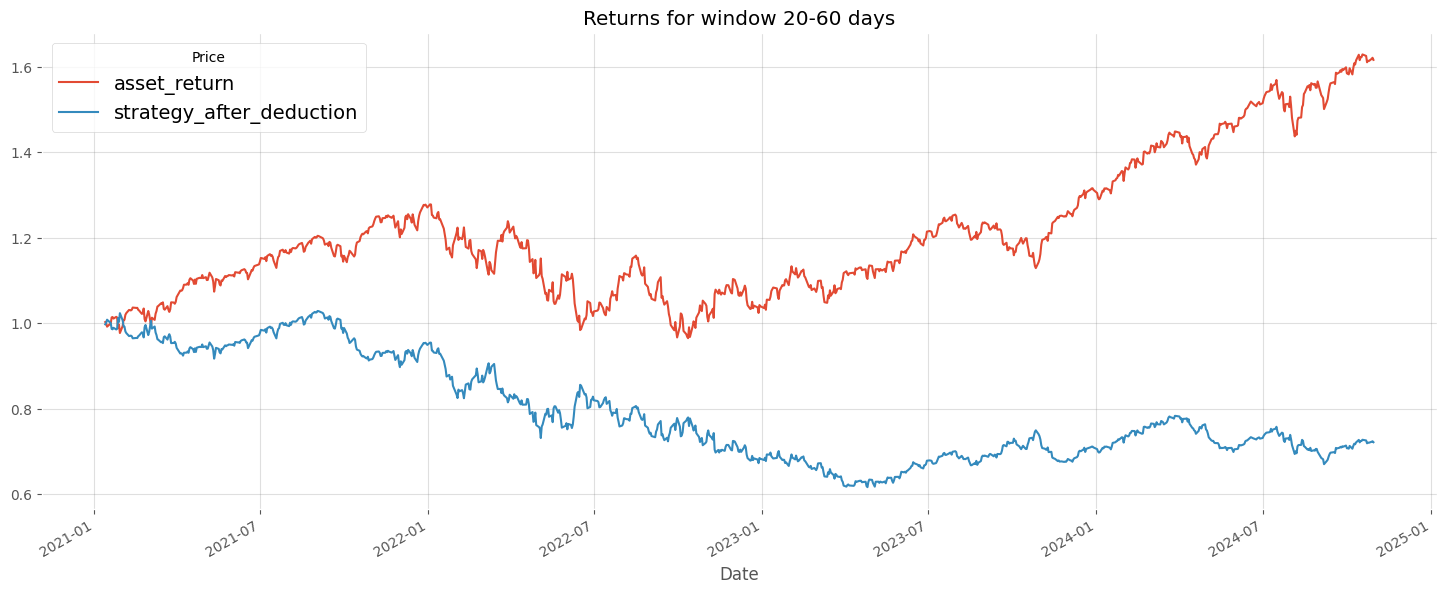

In [58]:
#On test set - strategy evaluation
backtest_sma(test2, 20, 60)


final amount left is $83.87082816673221

Max Drawdown for the 30 days window is -1.049864481904836


Max Drawdown duration for the 20-60 days window is 3309 days

Drawdown duration for drawdown still continuing is 1154 days

The sharpe is 0.2629863184247805
The CAGR is 0.032560977626070686



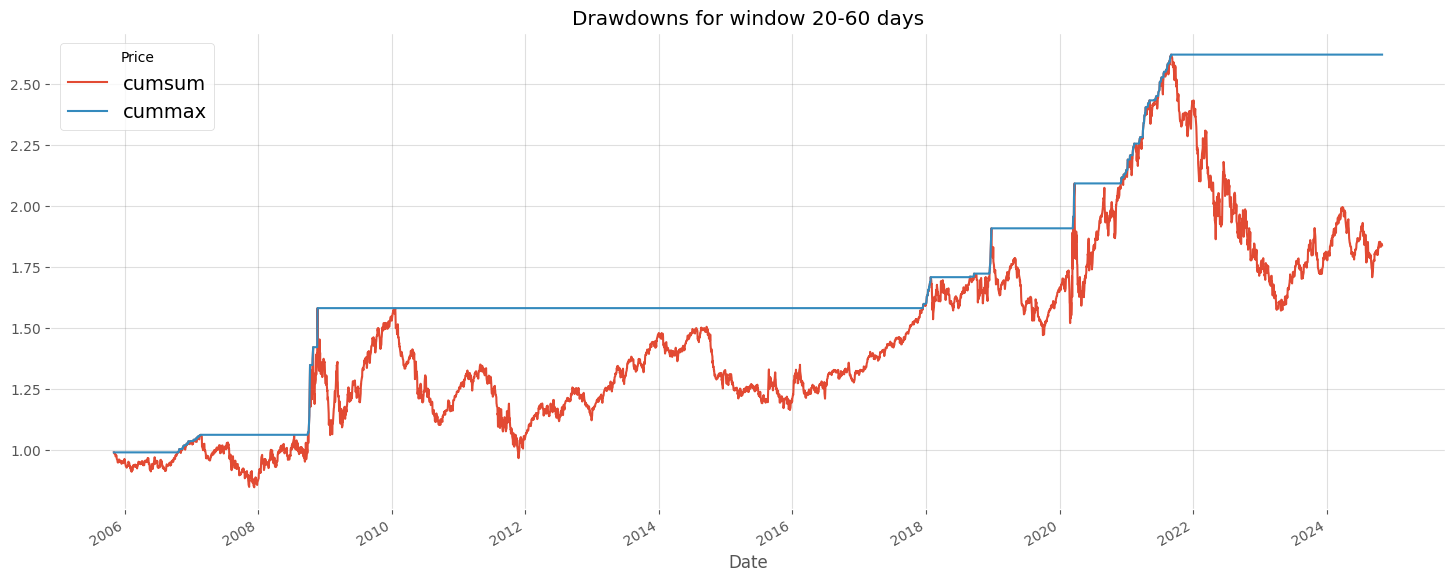

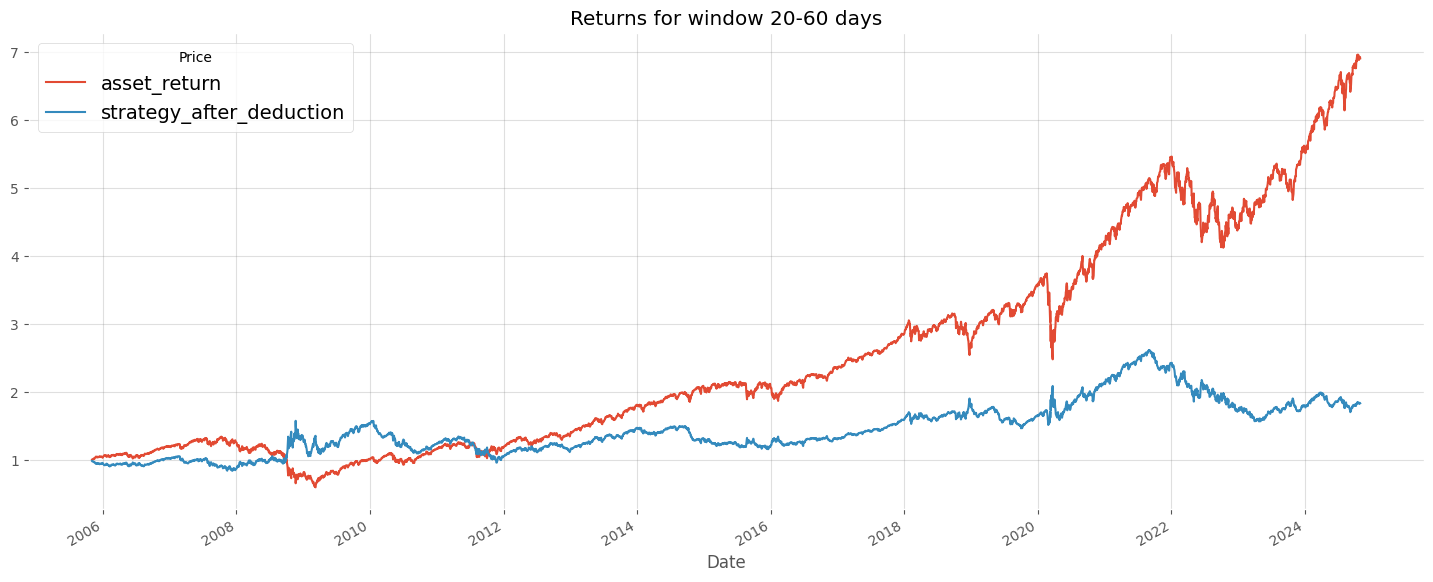

In [59]:
#on whole SPY for reference:
backtest_sma(SPY2, 20, 60)

###Exponential Moving Average


In [61]:
test3 = test.copy()
SPY3 = SPY.copy()


final amount left is $-1.606289716780307

Max Drawdown for the 30 days window is -0.2910154266395435


Max Drawdown duration for the 10-60 days window is 284 days

Drawdown duration for drawdown still continuing is 867 days

The sharpe is 0.05753698037731912
The CAGR is -0.00425232888917948



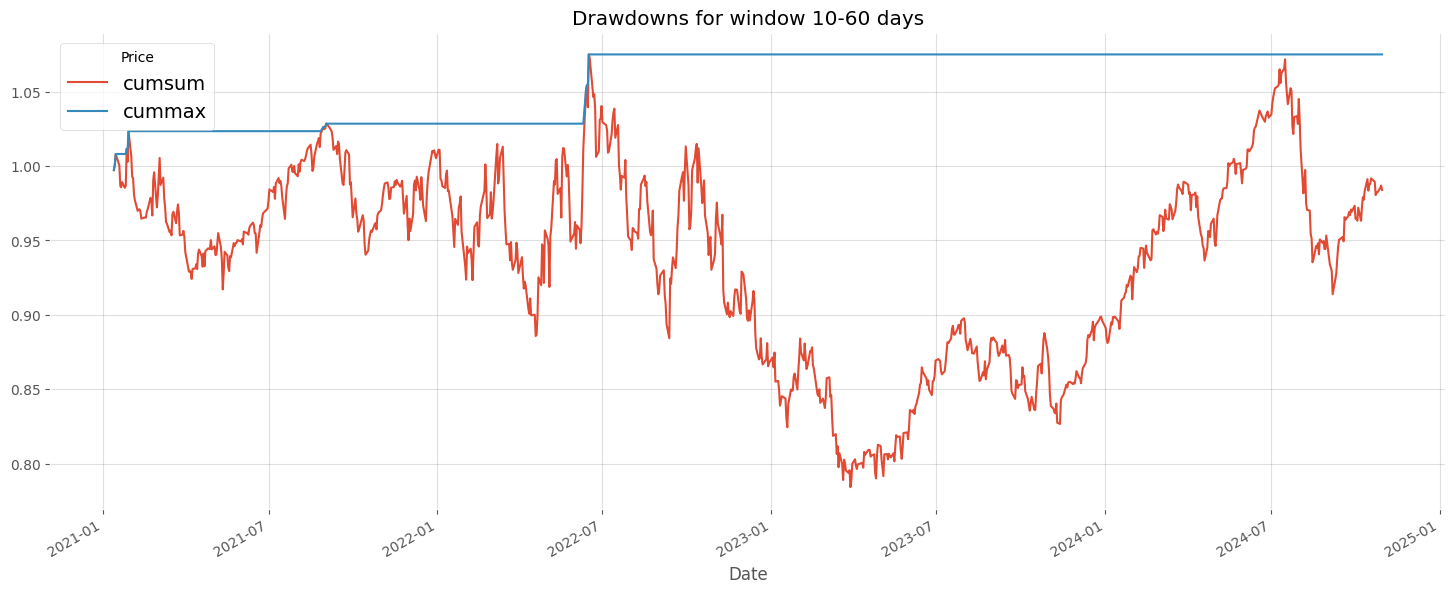

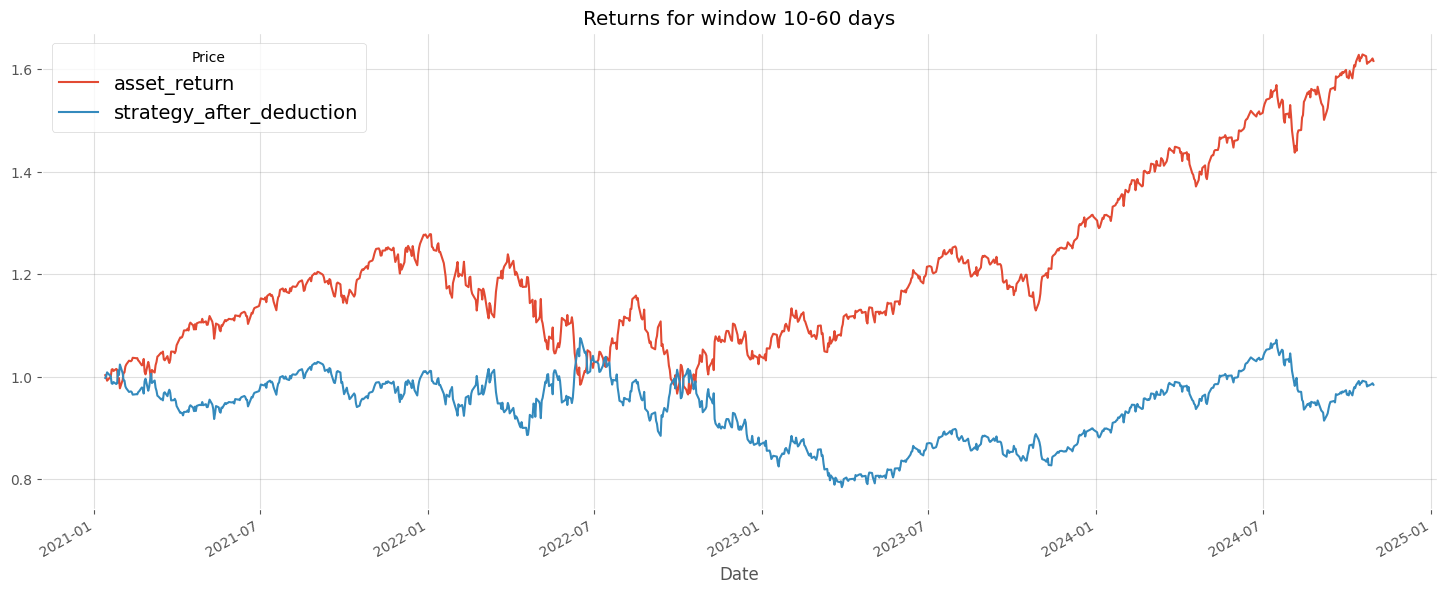

In [62]:
#On test set - strategy evaluation
backtest_ema(test3, 10, 60)


final amount left is $259.1148283661963

Max Drawdown for the 30 days window is -1.0621406052150646


Max Drawdown duration for the 10-60 days window is 1077 days

Drawdown duration for drawdown still continuing is 867 days

The sharpe is 0.4452399119665005
The CAGR is 0.06957235994006816



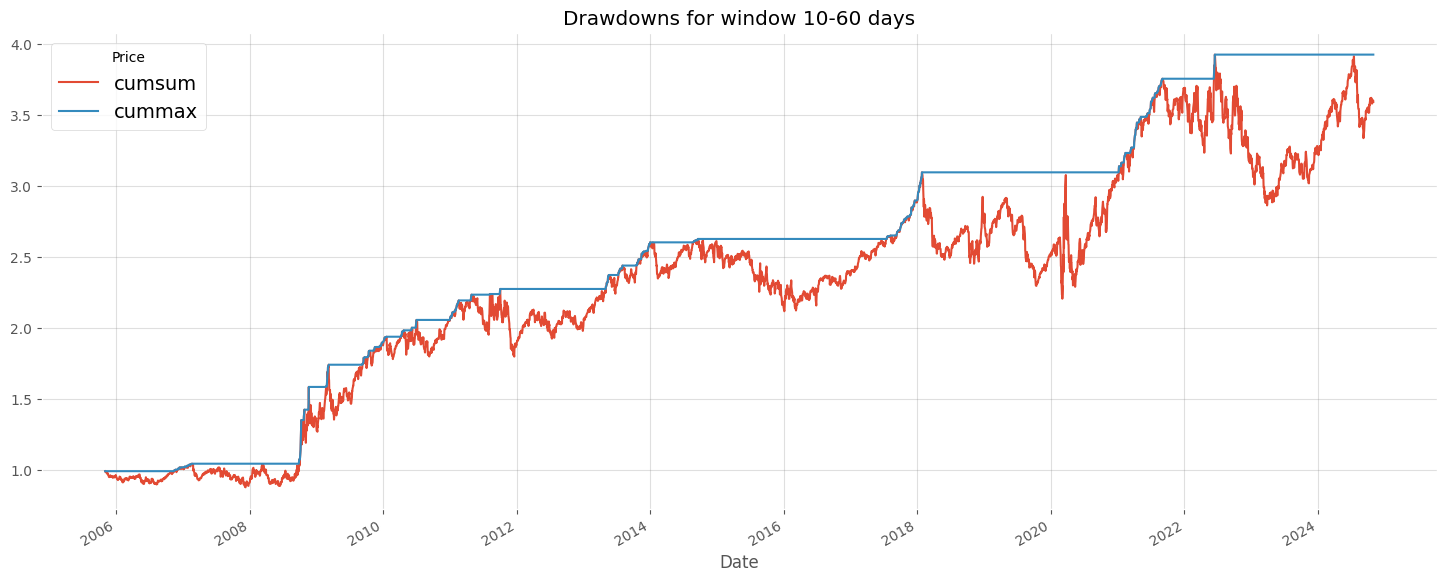

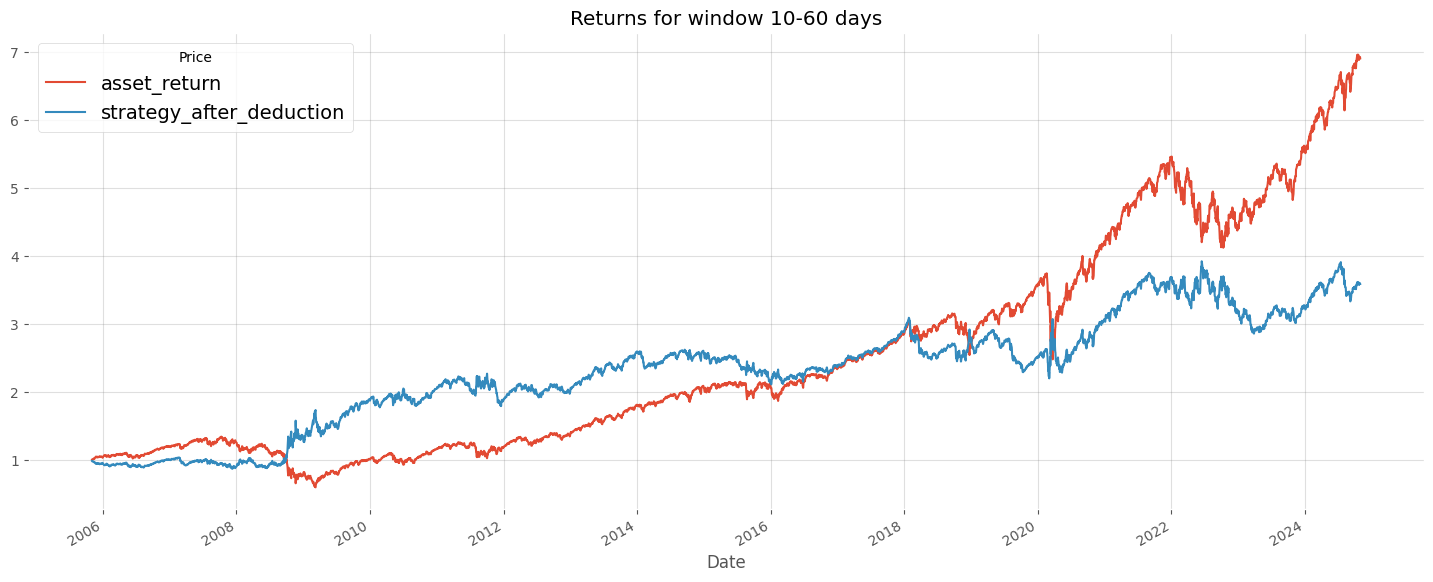

In [63]:
#on whole SPY for reference:
backtest_ema(SPY3, 10, 60)

###Combined EMA, SMA, and Mean Reversion

In [64]:
test4 = test.copy()
SPY4 = SPY.copy()


final amount left is $-2.4081336767142525

Max Drawdown  is -0.09066043068849672


Max Drawdown duration for is 1 days

Drawdown duration for drawdown still continuing is 1310 days

The sharpe is -0.17169005657318526
The CAGR is -0.006748247866439239



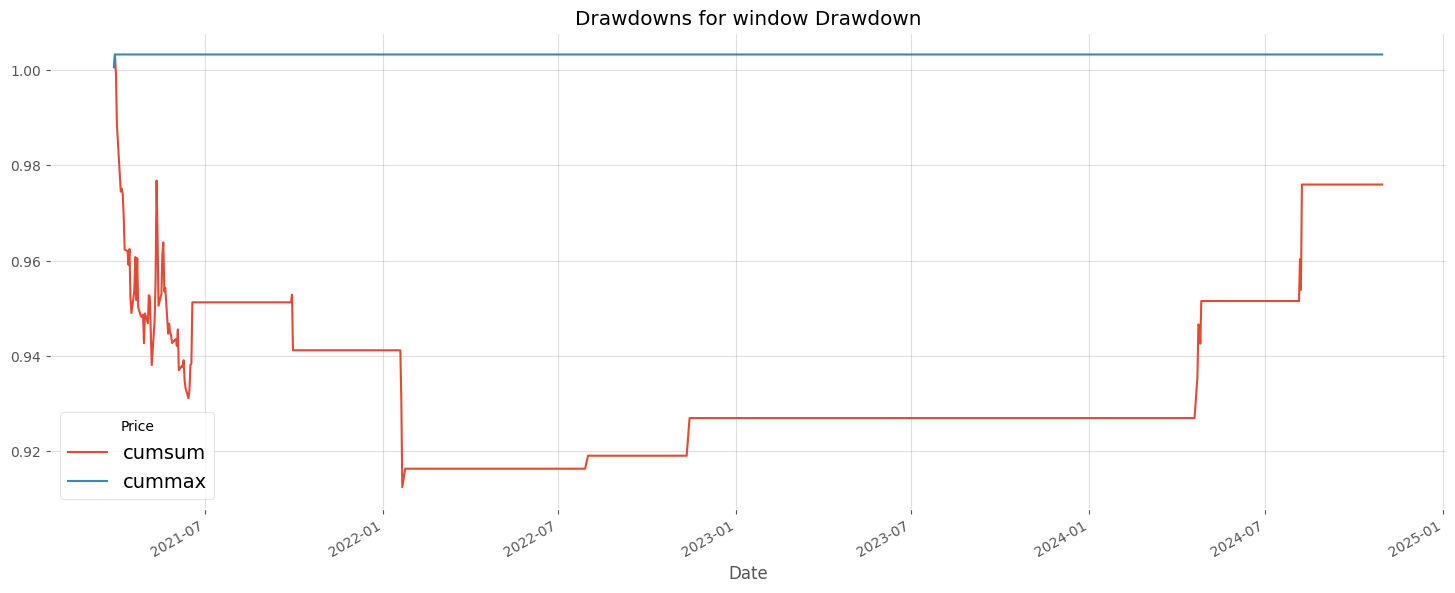

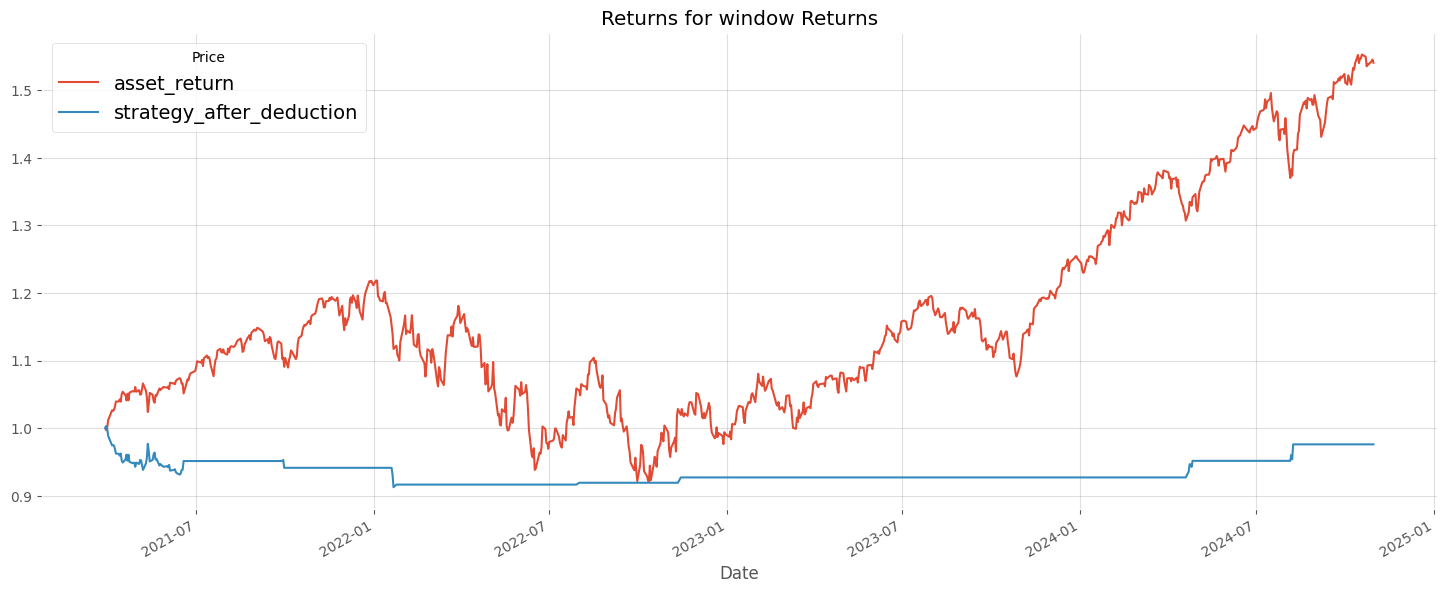

In [65]:
#On test set - strategy evaluation
investments = 100000
sma_s_values = 15
sma_l_values = 60
mean_sma_values = 50
ema_s_values = 10
ema_l_values = 100
threshold_factors = 1.5

backtest_combi1(test4, sma_s_values, sma_l_values, mean_sma_values, ema_s_values, ema_l_values, threshold_factors, investments)


final amount left is $43.18110333812479

Max Drawdown  is -0.07390246674996792


Max Drawdown duration for is 1624 days

Drawdown duration for drawdown still continuing is 0 days

The sharpe is 0.6336505135412396
The CAGR is 0.01926464961178942



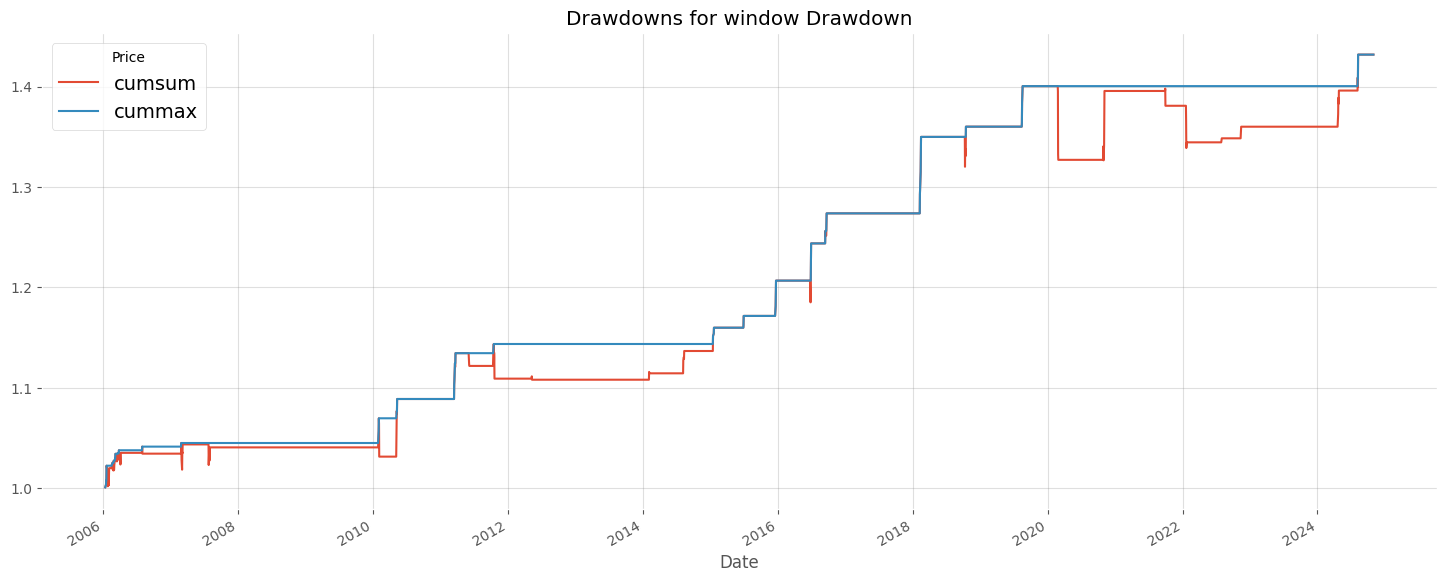

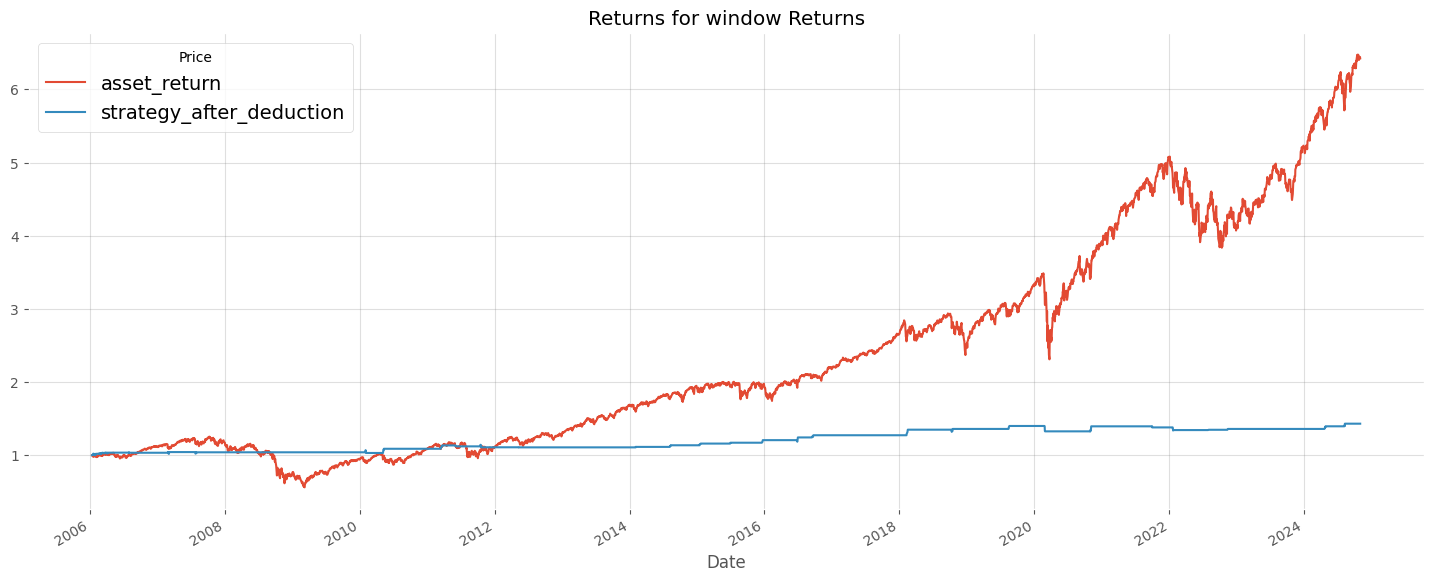

In [66]:
#on whole SPY for reference:
investments = 100000
sma_s_values = 15
sma_l_values = 60
mean_sma_values = 50
ema_s_values = 10
ema_l_values = 100
threshold_factors = 1.5

backtest_combi1(SPY4, sma_s_values, sma_l_values, mean_sma_values, ema_s_values, ema_l_values, threshold_factors, investments)

In [67]:
test5 = test.copy()
SPY5 = SPY.copy()


final amount left is $3.2410380985317566

Max Drawdown  is -0.04690599259900008


Max Drawdown duration for is 579 days

Drawdown duration for drawdown still continuing is 351 days

The sharpe is 0.2675758365636155
The CAGR is 0.008429074700426531



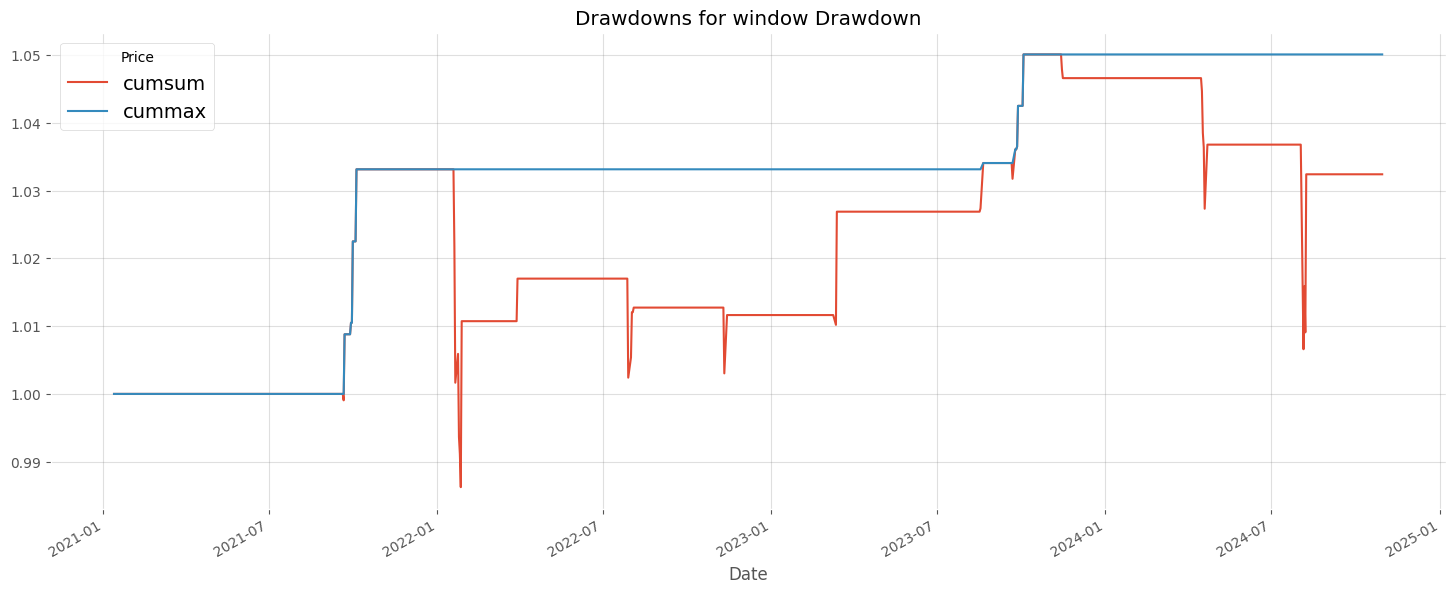

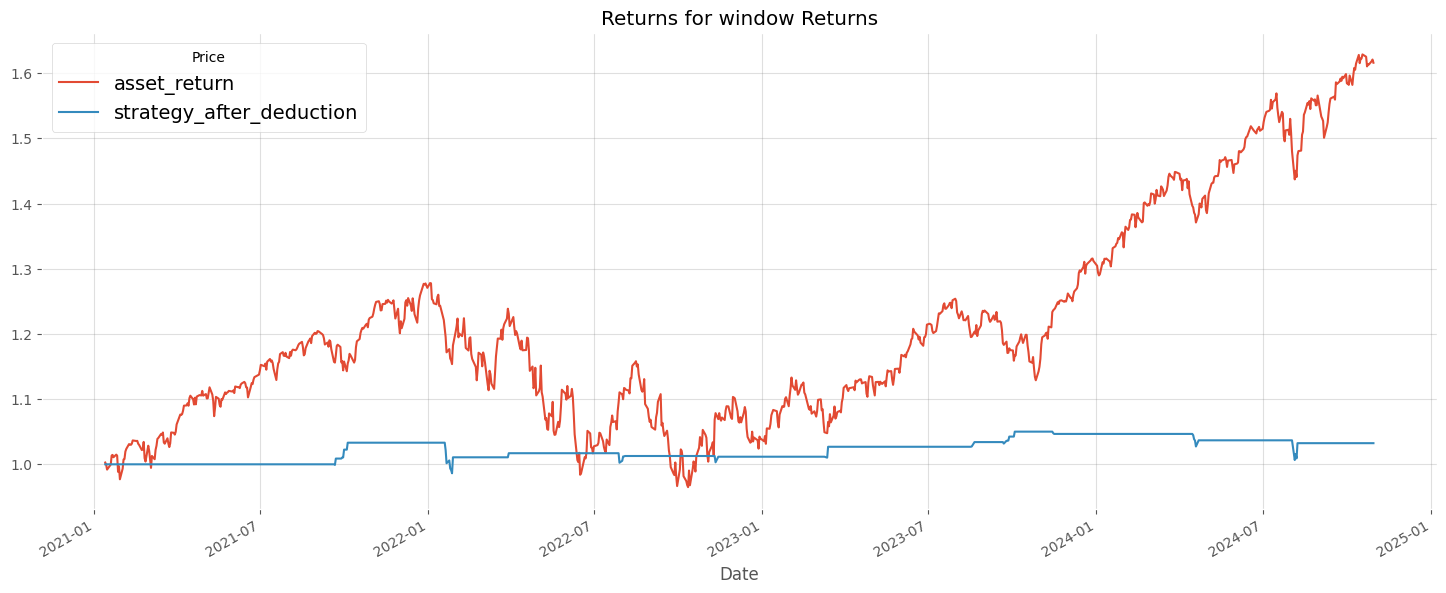

In [68]:
#On test set - strategy evaluation
investments = 100000
sma_s_values = 20
sma_l_values = 100
mean_sma_values = 30
ema_s_values = 10
ema_l_values = 60
threshold_factors = 2

backtest_combi(test5, sma_s_values, sma_l_values, mean_sma_values, ema_s_values, ema_l_values, threshold_factors, investments)


final amount left is $65.59345800483499

Max Drawdown  is -0.0786332416347506


Max Drawdown duration for is 626 days

Drawdown duration for drawdown still continuing is 351 days

The sharpe is 0.6833411460936776
The CAGR is 0.02688923992021719



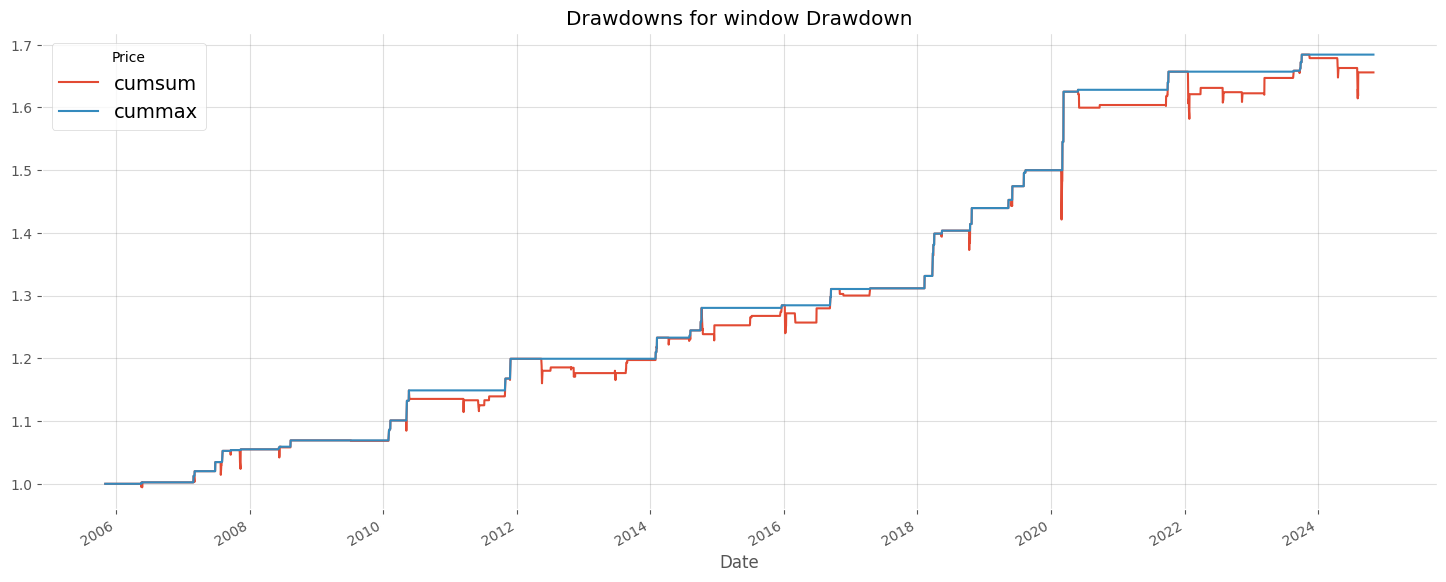

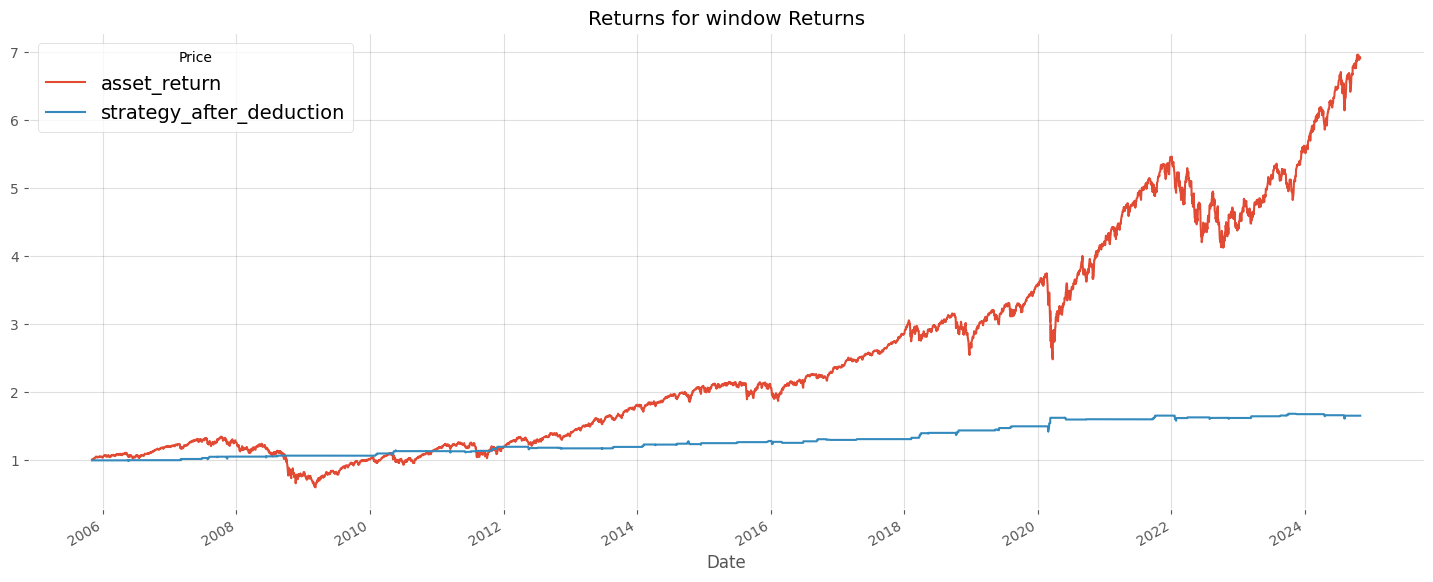

In [69]:
#on whole SPY for reference:
investments = 100000
sma_s_values = 20
sma_l_values = 100
mean_sma_values = 30
ema_s_values = 10
ema_l_values = 60
threshold_factors = 2

backtest_combi(SPY5, sma_s_values, sma_l_values, mean_sma_values, ema_s_values, ema_l_values, threshold_factors, investments)

##**Machine Learning Strategy** - Jisen

In [ ]:
# Backtest a trading strategy using buy/sell signals and compute portfolio value
def backtest_with_signals(data, signal_column, initial_balance=100000):

    data['Portfolio'] = initial_balance
    position = 0
    cash = initial_balance

    for i in range(len(data)):
        if int(data[signal_column].iloc[i]) == 1 and position == 0:  # Buy signal
            position = cash / data['Adj Close'].iloc[i]
            cash = 0
        elif int(data[signal_column].iloc[i]) == 0 and position > 0:  # Sell signal
            cash = position * data['Adj Close'].iloc[i]
            position = 0
        data['Portfolio'].iloc[i] = cash + position * data['Adj Close'].iloc[i]

    return data

# Calculate the Sharpe Ratio for a portfolio
def calculate_sharpe_ratio(data, risk_free_rate=0.01):

    daily_returns = data['Portfolio'].pct_change().dropna()
    excess_returns = daily_returns - (risk_free_rate / 252)
    sharpe_ratio = np.sqrt(252) * excess_returns.mean() / excess_returns.std()

    return sharpe_ratio

# Calculate the Compound Annual Growth Rate (CAGR)
def calculate_cagr(data, initial_balance, years):

    final_balance = data['Portfolio'].iloc[-1]
    cagr = (final_balance / initial_balance) ** (1 / years) - 1

    return cagr

#Calculate the maximum drawdown of a portfolio and its start and end dates.
def calculate_max_drawdown(data):

    data['Peak'] = data['Portfolio'].cummax()
    data['Drawdown'] = (data['Portfolio'] - data['Peak']) / data['Peak']
    max_drawdown = data['Drawdown'].min()
    end_date = data['Drawdown'].idxmin()
    start_date = data.loc[:end_date, 'Portfolio'].idxmax()

    return max_drawdown, start_date, end_date

In [ ]:
for model_name, result in results.items():
    print(f"Backtesting {model_name}...")

    SPY_test[f"{model_name}_Signal"] = result["test_pred"]

    # Perform backtesting and calculate portfolio values based on the model's signals
    SPY_test[f"{model_name}_Portfolio"] = backtest_with_signals(
        SPY_test,
        f"{model_name}_Signal"
    )['Portfolio']

    # Calculate performance metrics
    sharpe_ratio = calculate_sharpe_ratio(SPY_test)
    cagr = calculate_cagr(SPY_test, initial_balance=100000, years=(len(SPY_test) / 252))
    max_drawdown, drawdown_start, drawdown_end = calculate_max_drawdown(SPY_test)

    results[model_name].update({
        "sharpe_ratio": sharpe_ratio,
        "cagr": cagr,
        "max_drawdown": max_drawdown,
        "drawdown_start": drawdown_start,
        "drawdown_end": drawdown_end
    })

Backtesting Random Forest...
Backtesting Gradient Boosting...
Backtesting Logistic Regression...
Backtesting SVM...
Backtesting Decision Tree...
Backtesting Extra Trees...


###**Sharpe Ratio, CAGR and MDD Performance**

In [ ]:
# Extract metrics into a DataFrame
results_df = pd.DataFrame({
    model_name: {
        "Sharpe Ratio": metrics['sharpe_ratio'],
        "CAGR": metrics['cagr'],
        "Max Drawdown": metrics['max_drawdown'],
        "Drawdown Start": metrics['drawdown_start'],
        "Drawdown End": metrics['drawdown_end']
    }
    for model_name, metrics in results.items()
}).T

results_df

Sharpe Ratio      CAGR Max Drawdown       Drawdown Start  \
Random Forest           0.343442  0.042529    -0.254549  2022-01-05 00:00:00   
Gradient Boosting      -0.309525 -0.000136    -0.039323  2023-08-18 00:00:00   
Logistic Regression     0.761397  0.129996    -0.265088  2022-01-03 00:00:00   
SVM                     0.811283  0.139728    -0.244964  2022-01-03 00:00:00   
Decision Tree           0.818045   0.13814    -0.244964  2022-01-03 00:00:00   
Extra Trees             0.564033  0.072458    -0.211674  2021-12-23 00:00:00   

                            Drawdown End  
Random Forest        2022-11-09 00:00:00  
Gradient Boosting    2024-08-05 00:00:00  
Logistic Regression  2022-10-12 00:00:00  
SVM                  2022-10-12 00:00:00  
Decision Tree        2022-10-12 00:00:00  
Extra Trees          2022-09-30 00:00:00

###**MDD Visualization**

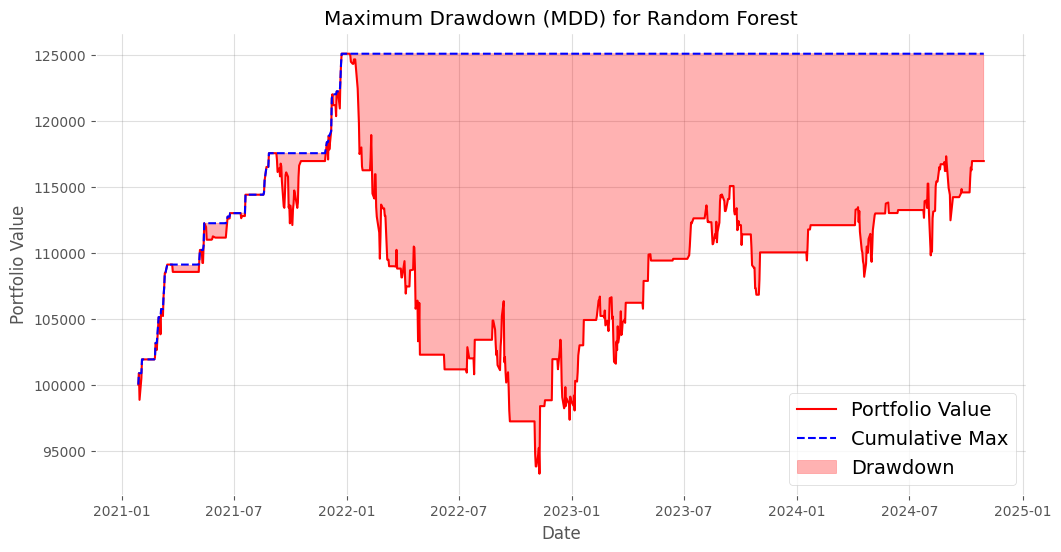

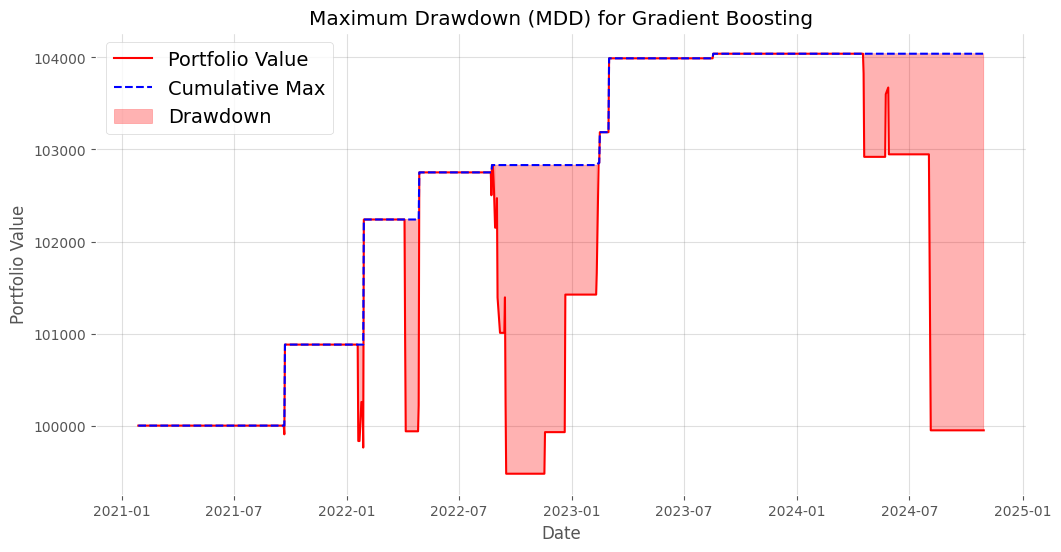

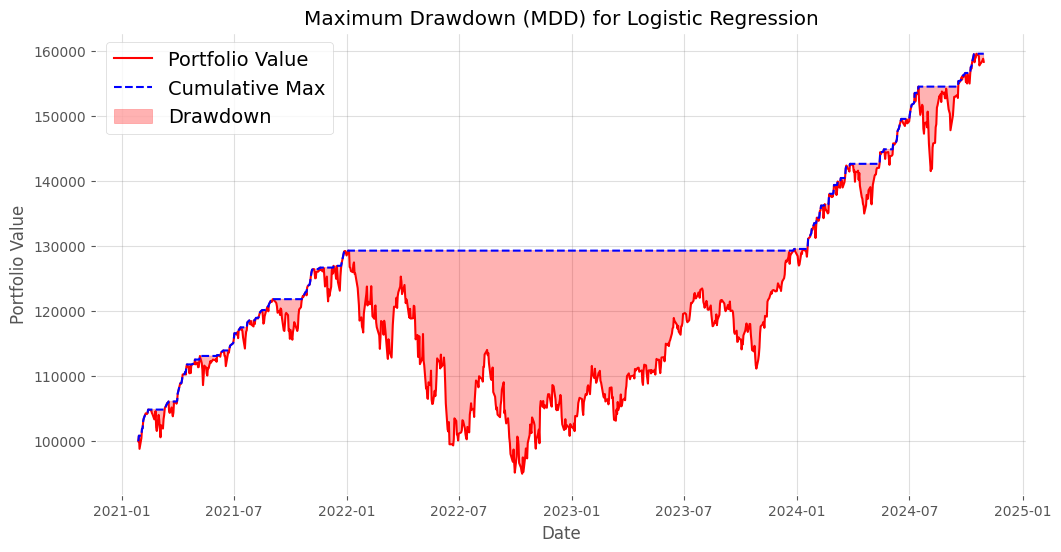

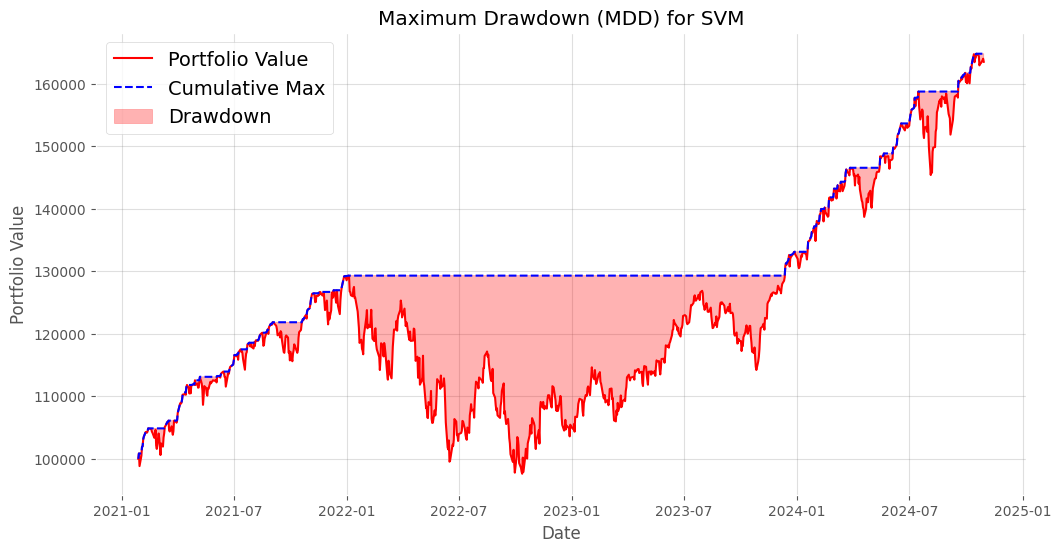

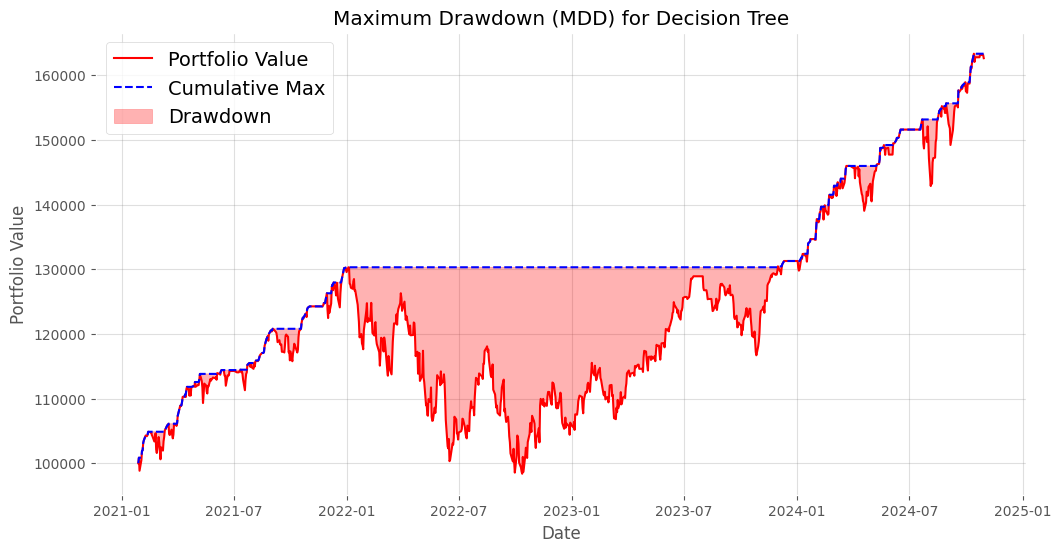

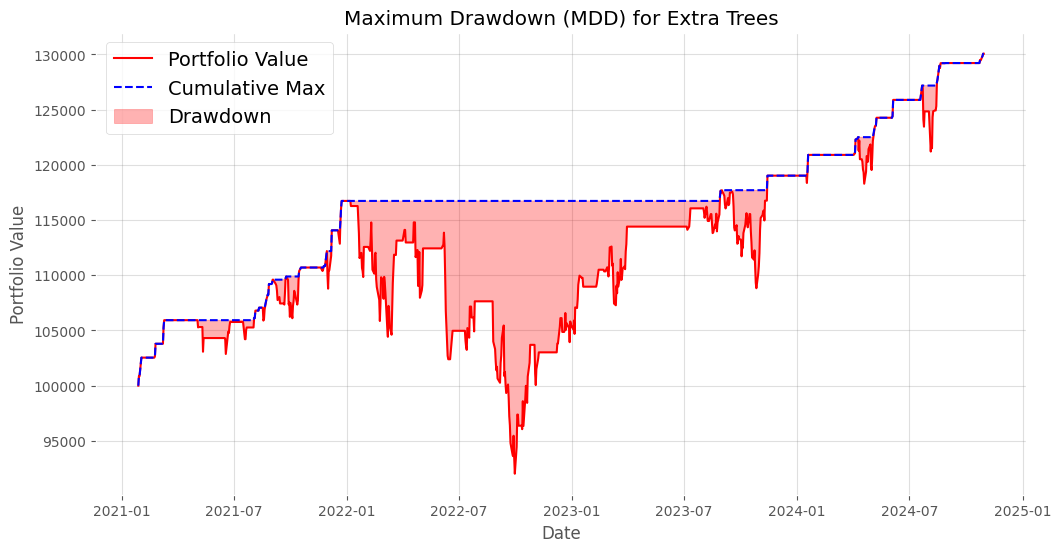

In [ ]:
for model_name in results.keys():
    SPY_test[f"{model_name}_Cummax"] = SPY_test[f"{model_name}_Portfolio"].cummax()
    SPY_test[f"{model_name}_Drawdown"] = SPY_test[f"{model_name}_Portfolio"] - SPY_test[f"{model_name}_Cummax"]

    # MDD graph for each model
    plt.figure(figsize=(12, 6))
    plt.plot(SPY_test.index, SPY_test[f"{model_name}_Portfolio"], label='Portfolio Value', color='red')
    plt.plot(SPY_test.index, SPY_test[f"{model_name}_Cummax"], label='Cumulative Max', color='blue', linestyle='--')
    plt.fill_between(SPY_test.index, SPY_test[f"{model_name}_Portfolio"], SPY_test[f"{model_name}_Cummax"],
                     where=(SPY_test[f"{model_name}_Portfolio"] < SPY_test[f"{model_name}_Cummax"]),
                     color='red', alpha=0.3, label='Drawdown')
    plt.title(f'Maximum Drawdown (MDD) for {model_name}')
    plt.xlabel('Date')
    plt.ylabel('Portfolio Value')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

###**Strategy Return Visualization**

In [ ]:
SPY_test["Adj_Close_Daily_Return"] = SPY_test["Adj Close"].pct_change()
# Calculate cumulative returns
SPY_test["Adj_Close_CumReturn"] = (1 + SPY_test["Adj_Close_Daily_Return"]).cumprod()

portfolio_columns = [col for col in SPY_test.columns if "Portfolio" in col]
portfolio_cumreturns = pd.DataFrame(index=SPY_test.index)


for col in portfolio_columns:
    SPY_test[f"{col}_Pct_Change"] = SPY_test[col].pct_change()
    SPY_test[f"{col}_CumReturn"] = (1 + SPY_test[f"{col}_Pct_Change"]).cumprod()

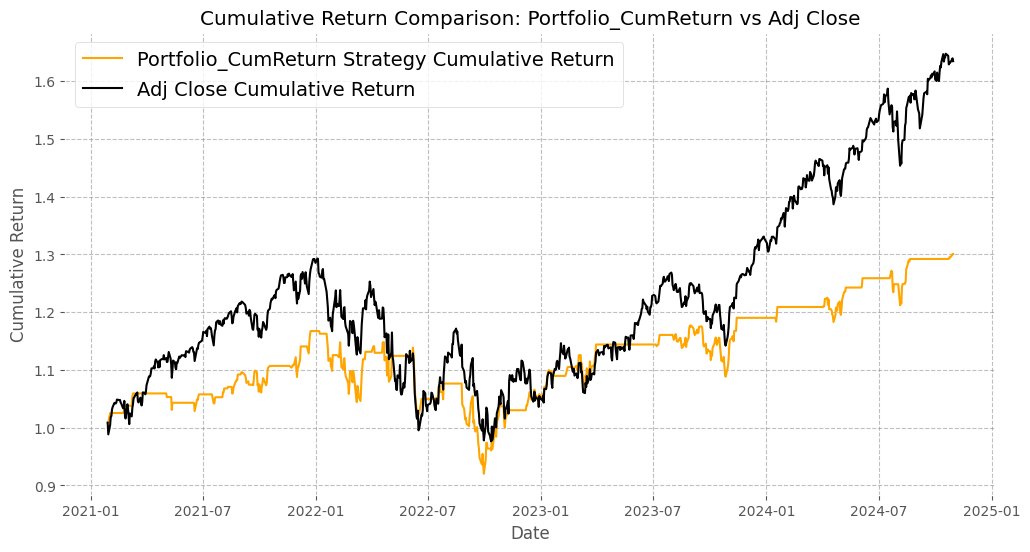

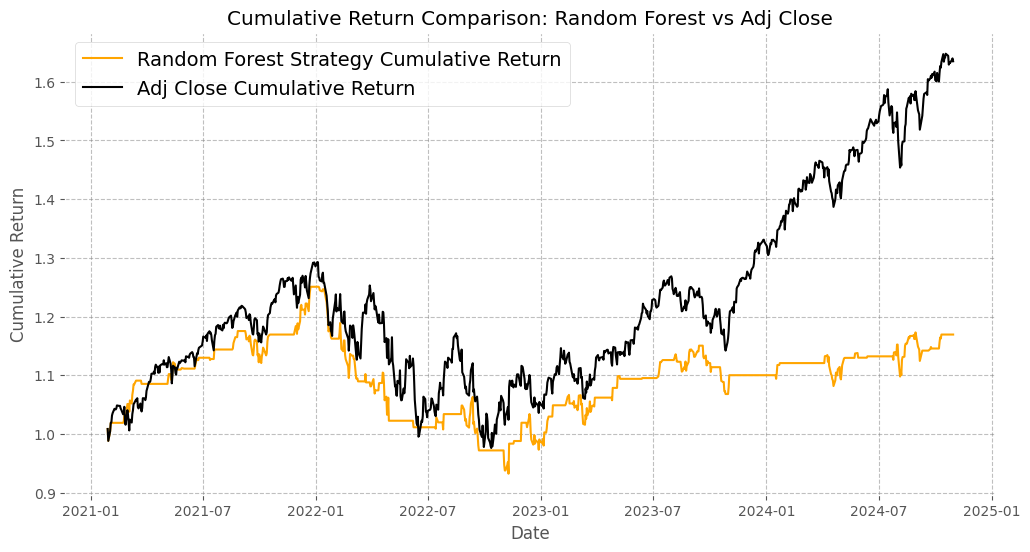

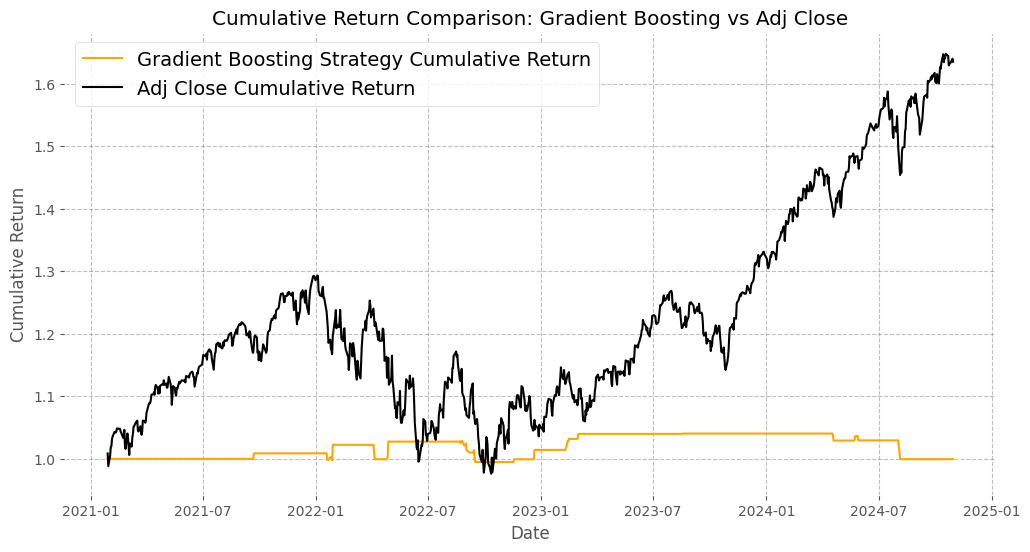

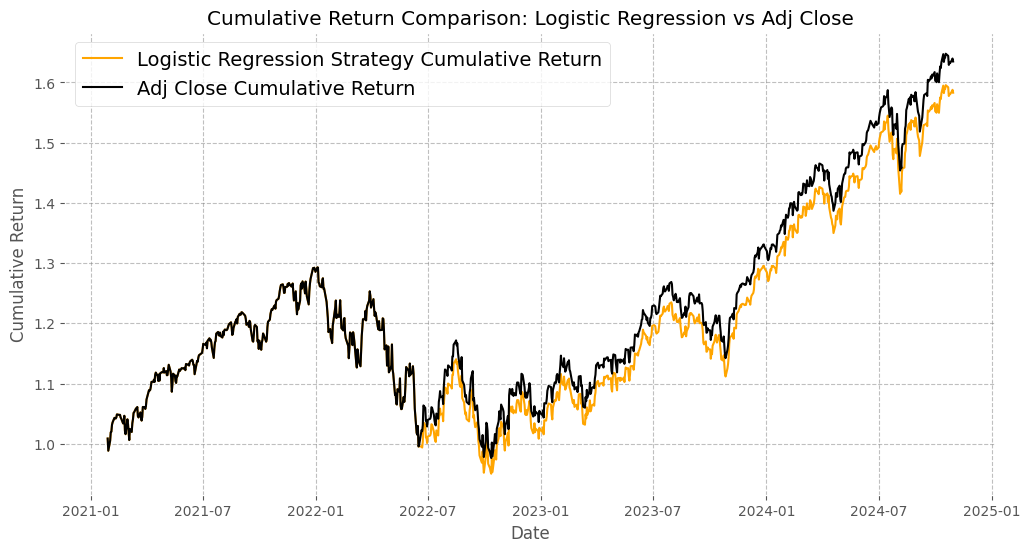

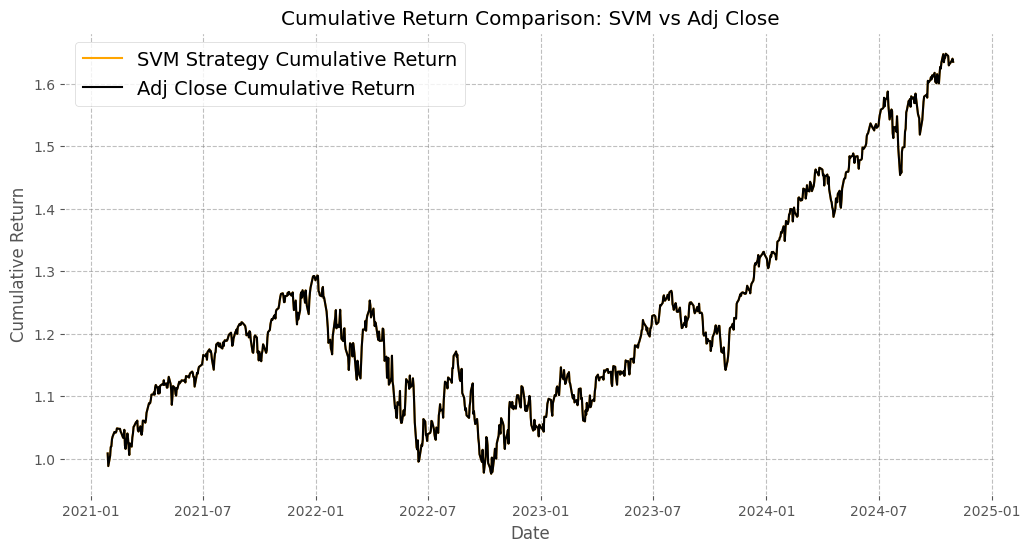

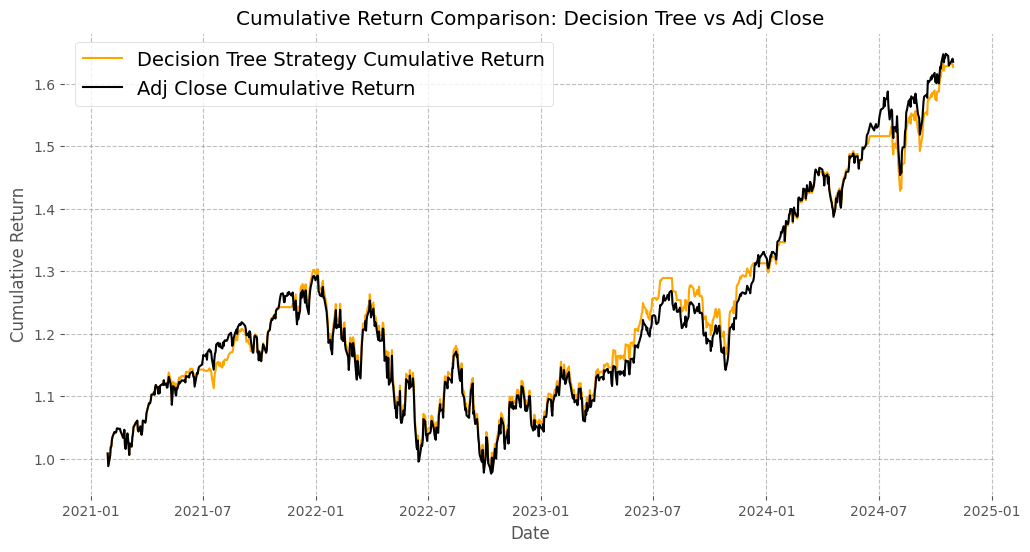

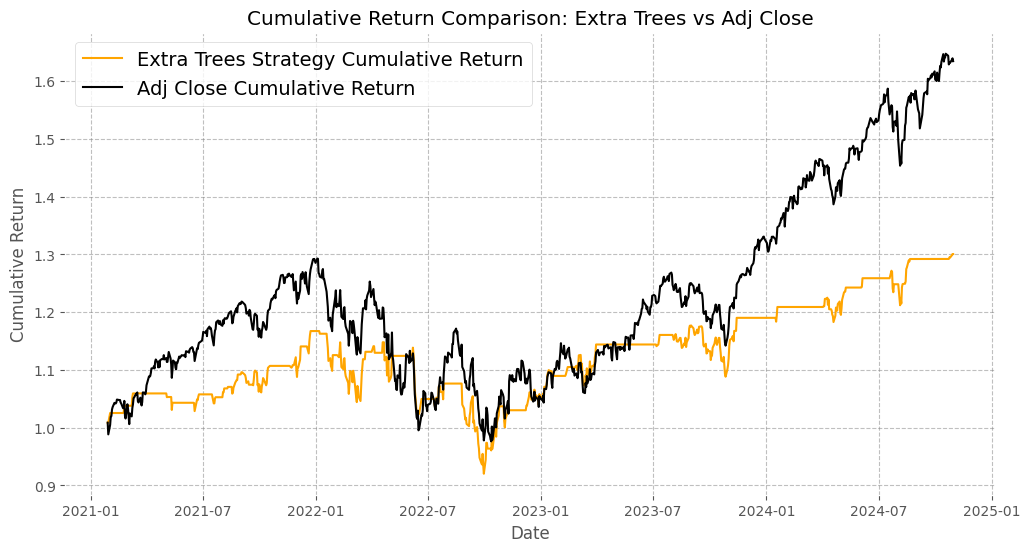

In [ ]:
portfolio_cumreturn_columns = [col for col in SPY_test.columns if "CumReturn" in col and "Portfolio" in col]

for col in portfolio_cumreturn_columns:
    model_name = col.replace("_Portfolio_CumReturn", "")

    plt.figure(figsize=(12, 6))
    plt.plot(SPY_test.index, SPY_test[col], label=f"{model_name} Strategy Cumulative Return", color="orange")
    plt.plot(SPY_test.index, SPY_test["Adj_Close_CumReturn"], label="Adj Close Cumulative Return", color="black")
    plt.title(f"Cumulative Return Comparison: {model_name} vs Adj Close")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Return")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

---
#**Part 3** - Zuoyu

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

## Executive summary of strategies

### 1. Momentum Strategy

In [ ]:
strategy_description_1 = """
#### **Strategy Description**
This strategy is based on momentum signals, incorporating multi-layer filtering (MACD signals, trend strategies, and spike alerts) to adjust positions. It aims to capture trends while avoiding significant volatility.

#### **Key Performance Metrics**
- **Sharpe Ratio**: 1.01
- **CAGR**: 18.56%
- **Max Drawdown**: -23.41%
- **Longest Drawdown Duration**: 561 days
- **Final Equity**: $224,165.29 (Initial investment $100,000 from January 2020 to October 2024)

#### **Advantages and Disadvantages**
- **Advantages**: High Sharpe Ratio indicates excellent risk-adjusted returns. The strategy's CAGR significantly outperforms the price benchmark, showing steady growth, with cumulative returns exceeding benchmark performance.
- **Disadvantages**: Maximum drawdown of -23.41%, and the longest drawdown duration of 561 days indicate the strategy may face significant risks and volatility.
"""

display(Markdown(strategy_description_1))



#### **Strategy Description**
This strategy is based on momentum signals, incorporating multi-layer filtering (MACD signals, trend strategies, and spike alerts) to adjust positions. It aims to capture trends while avoiding significant volatility.

#### **Key Performance Metrics**
- **Sharpe Ratio**: 1.01  
- **CAGR**: 18.56%  
- **Max Drawdown**: -23.41%  
- **Longest Drawdown Duration**: 561 days  
- **Final Equity**: $224,165.29 (Initial investment $100,000 from January 2020 to October 2024)

#### **Advantages and Disadvantages**
- **Advantages**: High Sharpe Ratio indicates excellent risk-adjusted returns. The strategy's CAGR significantly outperforms the price benchmark, showing steady growth, with cumulative returns exceeding benchmark performance.  
- **Disadvantages**: Maximum drawdown of -23.41%, and the longest drawdown duration of 561 days indicate the strategy may face significant risks and volatility.


### 2. Mean-Reversion Strategy

In [ ]:
strategy_description_2 = """
#### **Strategy Description**
This strategy utilizes mean-reversion signals, attempting to perform countertrend operations when prices deviate from the mean. Performance varies across different window periods.

#### **Window Test Results**
- **30-Day Window**:
  - Sharpe Ratio: 0.663
  - CAGR: 7.78%
  - Max Drawdown: -26.19%

- **20-60 Day Window (SMA Strategy)**:
  - Sharpe Ratio: -0.436
  - CAGR: -8.23%
  - Max Drawdown: -41.20%

- **10-60 Day Window (EMA Strategy)**:
  - Sharpe Ratio: 0.058
  - CAGR: -0.43%
  - Max Drawdown: -29.10%

#### **Best Window Selection**
The 30-day window performs relatively better, with positive Sharpe Ratio and CAGR, and relatively lower drawdown risk.

#### **Advantages and Disadvantages**
- **Advantages**: In short-term windows (30 days), the strategy demonstrates some mean-reversion effects with moderate risk.
- **Disadvantages**: In longer windows (e.g., 20-60 days), the strategy deteriorates, indicating potential vulnerability to market trends.
"""

display(Markdown(strategy_description_2))



#### **Strategy Description**
This strategy utilizes mean-reversion signals, attempting to perform countertrend operations when prices deviate from the mean. Performance varies across different window periods.

#### **Window Test Results**
- **30-Day Window**:  
  - Sharpe Ratio: 0.663  
  - CAGR: 7.78%  
  - Max Drawdown: -26.19%  

- **20-60 Day Window (SMA Strategy)**:  
  - Sharpe Ratio: -0.436  
  - CAGR: -8.23%  
  - Max Drawdown: -41.20%  

- **10-60 Day Window (EMA Strategy)**:  
  - Sharpe Ratio: 0.058  
  - CAGR: -0.43%  
  - Max Drawdown: -29.10%  

#### **Best Window Selection**
The 30-day window performs relatively better, with positive Sharpe Ratio and CAGR, and relatively lower drawdown risk.

#### **Advantages and Disadvantages**
- **Advantages**: In short-term windows (30 days), the strategy demonstrates some mean-reversion effects with moderate risk.  
- **Disadvantages**: In longer windows (e.g., 20-60 days), the strategy deteriorates, indicating potential vulnerability to market trends.


### 3. Machine Learning Strategy

In [ ]:
strategy_description_3 = """
#### **Strategy Description**
This strategy uses machine learning models (e.g., Random Forest, SVM, Logistic Regression) to predict market signals and adjust positions.

#### **Key Performance Metrics**
| Model              | Sharpe Ratio | CAGR      | Max Drawdown | Drawdown Duration           |
|---------------------|--------------|-----------|--------------|-----------------------------|
| Random Forest       | 0.343        | 4.25%     | -25.45%      | 2022-01-05 to 2022-11-09    |
| Gradient Boosting   | -0.310       | -0.01%    | -3.93%       | 2023-08-18 to 2024-08-05    |
| Logistic Regression | 0.761        | 13.00%    | -26.51%      | 2022-01-03 to 2022-10-12    |
| SVM                 | 0.811        | 13.97%    | -24.50%      | 2022-01-03 to 2022-10-12    |
| Decision Tree       | 0.818        | 13.81%    | -24.50%      | 2022-01-03 to 2022-10-12    |
| Extra Trees         | 0.564        | 7.25%     | -21.17%      | 2021-12-23 to 2022-09-30    |

#### **Advantages and Disadvantages**
- **Advantages**: SVM and Decision Tree models perform best, with high Sharpe Ratios and CAGR. The drawdown risks are lower compared to the Momentum strategy.
- **Disadvantages**: Some models (e.g., Gradient Boosting) perform poorly, with negative returns.
"""

display(Markdown(strategy_description_3))


#### **Strategy Description**
This strategy uses machine learning models (e.g., Random Forest, SVM, Logistic Regression) to predict market signals and adjust positions.

#### **Key Performance Metrics**
| Model              | Sharpe Ratio | CAGR      | Max Drawdown | Drawdown Duration           |
|---------------------|--------------|-----------|--------------|-----------------------------|
| Random Forest       | 0.343        | 4.25%     | -25.45%      | 2022-01-05 to 2022-11-09    |
| Gradient Boosting   | -0.310       | -0.01%    | -3.93%       | 2023-08-18 to 2024-08-05    |
| Logistic Regression | 0.761        | 13.00%    | -26.51%      | 2022-01-03 to 2022-10-12    |
| SVM                 | 0.811        | 13.97%    | -24.50%      | 2022-01-03 to 2022-10-12    |
| Decision Tree       | 0.818        | 13.81%    | -24.50%      | 2022-01-03 to 2022-10-12    |
| Extra Trees         | 0.564        | 7.25%     | -21.17%      | 2021-12-23 to 2022-09-30    |

#### **Advantages and Disadvantages**
- **Advantages**: SVM and Decision Tree models perform best, with high Sharpe Ratios and CAGR. The drawdown risks are lower compared to the Momentum strategy.  
- **Disadvantages**: Some models (e.g., Gradient Boosting) perform poorly, with negative returns.


In [ ]:
data = {
    'Strategy': ['Momentum', 'Mean-Reversion (30d)', 'Machine Learning (SVM/DT)'],
    'Sharpe Ratio': [1.01, 0.663, 0.811],
    'CAGR (%)': [18.56, 7.78, 13.97],
    'Max Drawdown (%)': [-23.41, -26.19, -24.50]
}

df = pd.DataFrame(data)

## Sharpe Ratio


### **Sharpe Ratio Analysis**


- **Momentum Strategy** has the highest Sharpe Ratio of **1.01**, indicating the best risk-adjusted return and is suitable for investors seeking high risk-reward ratios.
- **Machine Learning Strategy (SVM/DT)** comes second with a Sharpe Ratio of **0.811**, showing strong risk-return balance.
- **Mean-Reversion Strategy (30d)** has the lowest Sharpe Ratio of **0.663**, but still demonstrates some robustness.


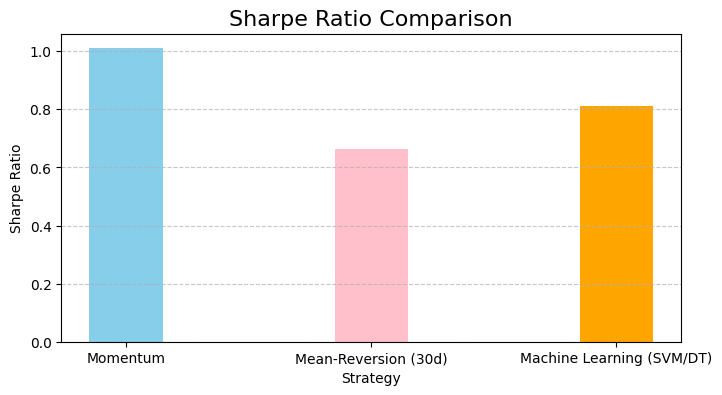

In [ ]:
display(Markdown("### **Sharpe Ratio Analysis**"))
display(Markdown("""
- **Momentum Strategy** has the highest Sharpe Ratio of **1.01**, indicating the best risk-adjusted return and is suitable for investors seeking high risk-reward ratios.
- **Machine Learning Strategy (SVM/DT)** comes second with a Sharpe Ratio of **0.811**, showing strong risk-return balance.
- **Mean-Reversion Strategy (30d)** has the lowest Sharpe Ratio of **0.663**, but still demonstrates some robustness.
"""))

plt.figure(figsize=(8, 4))
plt.bar(df['Strategy'], df['Sharpe Ratio'], color=['skyblue', 'pink', 'orange'], width=0.3)
plt.title('Sharpe Ratio Comparison', fontsize=16)
plt.ylabel('Sharpe Ratio')
plt.xlabel('Strategy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Compound annual growth rate

### **CAGR Analysis**


- **Momentum Strategy** has the highest CAGR of **18.56%**, demonstrating excellent compounding returns over time.
- **Machine Learning Strategy (SVM/DT)** follows with a CAGR of **13.97%**, suitable for investors seeking steady growth.
- **Mean-Reversion Strategy (30d)** has the lowest CAGR of **7.78%**, showing weaker compounding performance.


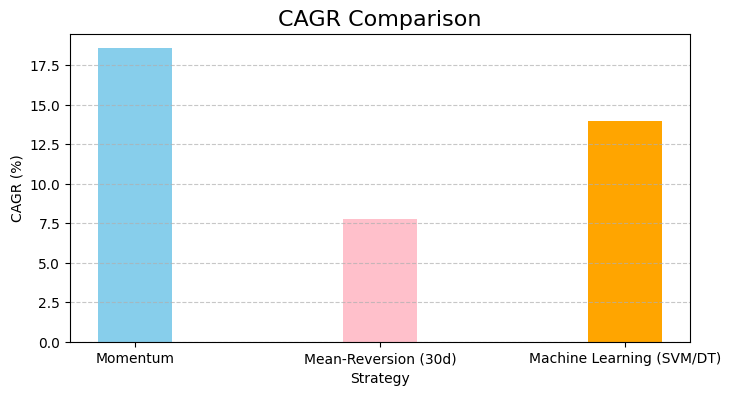

In [ ]:
display(Markdown("### **CAGR Analysis**"))
display(Markdown("""
- **Momentum Strategy** has the highest CAGR of **18.56%**, demonstrating excellent compounding returns over time.
- **Machine Learning Strategy (SVM/DT)** follows with a CAGR of **13.97%**, suitable for investors seeking steady growth.
- **Mean-Reversion Strategy (30d)** has the lowest CAGR of **7.78%**, showing weaker compounding performance.
"""))

plt.figure(figsize=(8, 4))
plt.bar(df['Strategy'], df['CAGR (%)'], color=['skyblue', 'pink', 'orange'], width=0.3)
plt.title('CAGR Comparison', fontsize=16)
plt.ylabel('CAGR (%)')
plt.xlabel('Strategy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Maximum drawdown

### **Max Drawdown Analysis**


- **Machine Learning Strategy (SVM/DT)** has the smallest max drawdown of **-24.50%**, indicating better risk control.
- **Momentum Strategy** has a max drawdown of **-23.41%**, slightly higher but still within acceptable limits.
- **Mean-Reversion Strategy (30d)** has the highest drawdown of **-26.19%**, suggesting higher vulnerability during adverse market conditions.


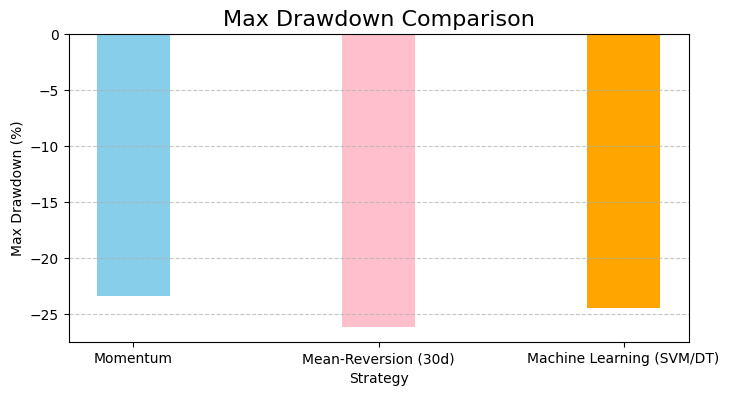

In [ ]:
display(Markdown("### **Max Drawdown Analysis**"))
display(Markdown("""
- **Machine Learning Strategy (SVM/DT)** has the smallest max drawdown of **-24.50%**, indicating better risk control.
- **Momentum Strategy** has a max drawdown of **-23.41%**, slightly higher but still within acceptable limits.
- **Mean-Reversion Strategy (30d)** has the highest drawdown of **-26.19%**, suggesting higher vulnerability during adverse market conditions.
"""))

plt.figure(figsize=(8, 4))
plt.bar(df['Strategy'], df['Max Drawdown (%)'], color=['skyblue', 'pink', 'orange'], width=0.3)
plt.title('Max Drawdown Comparison', fontsize=16)
plt.ylabel('Max Drawdown (%)')
plt.xlabel('Strategy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## <font color = darkred>**Total Compare (Recommendation)**

In [ ]:
summary_text = """
### **Strategy Comparison and Summary**

| Strategy Name               | Sharpe Ratio | CAGR      | Max Drawdown | Final Conclusion                                   |
|-----------------------------|--------------|-----------|--------------|---------------------------------------------------|
| **Momentum Strategy**       | 1.01         | 18.56%    | -23.41%      | Best risk-adjusted return, suitable for long-term investment |
| **Mean-Reversion (30 days)**| 0.663        | 7.78%     | -26.19%      | Decent performance, suitable for short- to mid-term investment |
| **Machine Learning (SVM/DT)**| 0.811       | 13.97%    | -24.50%      | Strong overall performance, ideal for diversified portfolios |

### **Total Compare**
- The **best strategy** is **Momentum Strategy**, leading in Sharpe Ratio and CAGR. Despite a relatively higher drawdown, it excels in long-term performance.
- For **lower-risk preferences**, the **Machine Learning Strategy (SVM/DT)** is a strong contender, offering balanced returns with lower risk.
- The **Mean-Reversion Strategy** performs reasonably well in short windows (30 days) but lags overall compared to other strategies.
"""

display(Markdown(summary_text))


### **Strategy Comparison and Summary**

| Strategy Name               | Sharpe Ratio | CAGR      | Max Drawdown | Final Conclusion                                   |
|-----------------------------|--------------|-----------|--------------|---------------------------------------------------|
| **Momentum Strategy**       | 1.01         | 18.56%    | -23.41%      | Best risk-adjusted return, suitable for long-term investment |
| **Mean-Reversion (30 days)**| 0.663        | 7.78%     | -26.19%      | Decent performance, suitable for short- to mid-term investment |
| **Machine Learning (SVM/DT)**| 0.811       | 13.97%    | -24.50%      | Strong overall performance, ideal for diversified portfolios |

### **Total Compare**
- The **best strategy** is **Momentum Strategy**, leading in Sharpe Ratio and CAGR. Despite a relatively higher drawdown, it excels in long-term performance.
- For **lower-risk preferences**, the **Machine Learning Strategy (SVM/DT)** is a strong contender, offering balanced returns with lower risk.
- The **Mean-Reversion Strategy** performs reasonably well in short windows (30 days) but lags overall compared to other strategies.


---
#**Part 4**

## Data discussion - Ishani

The SPY ETF, which tracks the S&P 500 Index, serves as a gauge of the U.S. economy by reflecting the performance of 500 of the largest publicly traded U.S. companies. The ETF's top 10 holdings now account for approximately 50.79% of the fund, indicating a concentration risk in leading technology and growth-oriented companies.Thus, shifts in these areas disproportionately impact the fund's performance.

**`Survivorship Bias:`**

The S&P 500 index, as tracked by SPY, is periodically rebalanced - replacing underperforming firms with stronger ones. For instance, tech stocks now dominate SPY holdings, reflecting a shift in market dynamics, but this dominance was not as pronounced earlier (e.g., pre-2008). This rebalancing creates an inherent survivorship bias.This may inflate historical performance of index-based strategies. The risk is that our strategies may be overfitted to a survival-skewed dataset, thus inflating historical performance and misestimating future applicability.

**`Market Regime Shift:`**

Market regimes are continuously changing. There are the generic bull and bear markets while more detailed regime definitions also exist. MSCI has defined 4 economic regimes - Goldilocks, Stagflation, Slow Growth and Heating up. They have also advised which stocks perform better in which regime. Our models don't assume that there are market regime changes and so are not reflected in the SPY returns. However, given that SPY current weightage is primarily in technology sector, market regimes would indeed affect their returns



## Mean-Reversion and Moving Average Strategies critique - Ishani

For all the relevant strategies for mean reversion I tried to minimise lookahead bias by using the 80% train set to determine the best window period for the strategies and then applying that to the test set. This was also the primary reason why I didn't use the whole 20 years worth of SPY data to determine the strategy performance. Aother reason is, if I used the whole 20 years worth of data to evaluate strategy performance it could lead to overfitting and there could be a lack of generalisability of the strategy.

It is also worth noting that since the test set is significantly smaller than the train set and it includes 2020 (pandemic) data the returns are greatly impacted by the financial shocks. The train set also contains 2008 data but it is offset by other multiple years of data.

Since the window periods for all strategies are fixed, thus they are not adaptable to market changes. So it would be better to develop more dynamic strategies that can adjust window periods according to the market regime

Strategies based solely on moving averages like sma or ema crossover or mean reversion may often underperform due to their lagging nature and inability to adapt to market changes quick enough. in markets where prices fluctuate around a mean (mean reversion) they may generate false signals, leading to frequent losses and high transaction costs. So they should be considered with other indicators like MACD and RSI. Additionally, risk adjusted ratios like Sortino and Information ratio should also be used to evaluate the strategy and balance downside risk.

## Pure Momentum Strategy Discussions (Binh)

* No stragey is perfect. Each works on a specific condition. Hence, as a quant, we try best to have a diversified and deep unstanding of the available techniques. Following this, we can employ the techniques properly to enhance certain circumstances.
* For the `MACD_strategy`, the essential part is the parameters of the threshold as well as crossing conditions. This requires experiments, optimization and logics of the developer. For the current asset SPY, during this period there are about 3 different regimes that require some adjustment of these parameters. But in this assignment, I choose the one that fit well will a majority of states because it is just my 1st layer of strategy.
* As no strategy is fixed forever, hence dynamic adjustments, even day-by-day is not a big problem. Hence, for a period of 20 years with around 3-4 points to adjust the hyper parameters for MACD, then it is acceptable, especially when we consider its simplicity as well as computation expenditures compared to other state-of-the-art techniques.
* How do we anticipate that there is a signficant change in the behaviour of MACD? The occurence of a signiciant spikes in the parameters  that has not ever appeared or for a long time ago. At these point, we should be conservative and anticipate that our parameters for MACD may not work at this regime. Hence, we may need to wait for more data to adjust. Otherwise, we should employ the hedging tools to protect our position.
* MACD also endures a problem of Short signals, but it works decent for Long signals, at least on this asset. To correct its weakness, I employ the `trend_252` strategy, which is basically another momentum strategy using EMA and VWAP 200/252 days. The reason of choosing these windows is about optimization. And when we think about the convergence of movements to the equilibrium point in any fields if we have sufficient data, then the cumulative effect of the previous 252 trading days (1 year) is a good choice.
* The `spike_strategy` is one that I customize personally after some experiments and observations of the weaknesses of the combined strategy of `MACD` and `trend_252`. This works better for market index rather than a particular stock. At the points such that the overall market, which is the cumulative effects of all assets, indicates a spike in log return and volume, we may don't want to trade around that point. In real life trading, when those spike signals occur, we may consider liquidating our positions to stay neutral, or using hedging techniques to render the portfolio neutral. We should not be greedy, but rather extremely conservative at those points as they may indicate significant shifts in the market regime.
* If ones have concerns regarding the parameter chosen in this notebook, then my simple answer is that we can write an Optimization function (Solver) to solve back the parameters by choosing a particular objective function.

##**Machine Learning Strategy** - Jisen
### Self-Critique of Machine Learning Models

#### Random Forest


- **Strengths**:
  - Excellent performance on the training set, achieving high accuracy and effectively handling multi-feature inputs.
  - Feature importance analysis indicates that Random Forest can successfully identify the most influential technical indicators (e.g., RSI and SMA-related features).
- **Weaknesses**:
  - Moderate performance on the test set, suggesting potential overfitting to the training data, especially during periods of low market volatility.
  - Limited ability to capture sequential dependencies in the data, making it less adaptable to market shocks or extreme movements.
- **Improvements**:
  - Use time-series cross-validation instead of standard random cross-validation to better simulate real-world trading scenarios.
  - Add regularization parameters, such as `min_samples_split`, to reduce overfitting risks.

---

#### Gradient Boosting

- **Strengths**:
  - Notable improvement in test set performance, particularly in identifying market reversal signals during periods of consolidation.
  - High stability in low-volatility market conditions.
- **Weaknesses**:
  - Computationally expensive, with longer training times, especially when dealing with larger datasets.
  - More sensitive to noise in the data, which reduces prediction accuracy under extreme market conditions.
- **Improvements**:
  - Reduce `n_estimators` or adjust `learning_rate` to lower training time.
  - Optimize hyperparameters through grid search to improve adaptability to varying market conditions.

---

#### Logistic Regression

- **Strengths**:
  - Quick training and testing, with clear interpretability of each feature's impact.
  - Provides a robust baseline model with decent performance in capturing linear trends in the data.
- **Weaknesses**:
  - Limited capability in modeling non-linear market relationships, especially with features like SMA and RSI.
  - Poor adaptability to high-volatility markets, resulting in significant drawdowns.
- **Improvements**:
  - Incorporate non-linear feature transformations, such as polynomial features.
  - Use regularization techniques (e.g., L1 or L2) to mitigate noise in datasets with many features.

---

#### SVM (Support Vector Machine)

- **Strengths**:
  - Performed well in the test set, particularly effective at capturing sparse trading signals in high-dimensional feature spaces.
  - Good adaptability to small training datasets.
- **Weaknesses**:
  - Struggles with larger datasets, where computation becomes slower.
  - Hyperparameter tuning for `C` and kernel functions is time-consuming and critical for performance.
- **Improvements**:
  - Use feature scaling (if not already applied) to ensure better performance with SVM.
  - Explore kernel optimization (e.g., radial basis function or polynomial) tailored to specific data patterns.

---

#### Decision Tree

- **Strengths**:
  - Simple and interpretable, providing insights into decision-making thresholds.
  - Performs reasonably well during periods of consistent trends in the market.
- **Weaknesses**:
  - Overfitting risk, as shown in the discrepancy between training and test set results.
  - Poor generalization to unseen data during volatile periods.
- **Improvements**:
  - Prune the tree by limiting the maximum depth or minimum samples per split.
  - Combine with ensemble techniques (e.g., bagging) to improve generalization.

---

#### Extra Trees

- **Strengths**:
  - Robust to overfitting due to feature randomization, showing consistent test set performance.
  - Efficient at handling large datasets with many features.
- **Weaknesses**:
  - Slightly worse interpretability compared to simpler models like Logistic Regression or Decision Tree.
  - High dependency on hyperparameter settings for optimal performance.
- **Improvements**:
  - Tune the number of trees (`n_estimators`) and features considered per split (`max_features`) for better results.
  - Assess the feature importances to identify and discard less influential features.

---

#### General Observations and Critique

1. **Survivorship Bias**:
   - The model's performance is based on historical data that includes only surviving companies in the S&P 500 index. This could overestimate strategy performance by ignoring delisted or underperforming companies.

2. **Lookahead Bias**:
   - There’s potential risk of inadvertently using future data in the feature engineering process, such as technical indicators computed with moving averages that may not align with real-time availability.

3. **Market Regime Shift**:
   - The strategies perform inconsistently across different market conditions. While some excel in low-volatility periods, they fail to adapt to sharp market regime changes, such as during financial crises or the COVID-19 pandemic.

4. **Overfitting Risk**:
   - Some models, particularly Random Forest and Decision Tree, showed signs of overfitting the training data, as evidenced by a drop in performance on the test set.

5. **Strategy Comparison**:
   - Gradient Boosting outperforms other models in the test set due to its ability to capture non-linear relationships, but its sensitivity to noise requires more careful hyperparameter tuning.

---
#Contribution

##**Ishani**

* General - SPY get ticker function and error correction (fix_dataframe function)
* Part 1 - Mean reversion, sma, ema crossover strategy and combined strategy
* Part 2 - Sharpe, CAGR, final amount, max drawdowm amount, max drawdown duration, ongoing drawdown duration for the mean reversion strategies
* Part 4 - SPY data related disscussion and mean reversion, sma, ema strategy critique.

##**Noah (Binh)**

* Part 1: Do all the momentum strategies, explaining the figures and their combinations to get a decent and realistic outcome.
* Part 2: Backtesting the model on the test set (from 2021), including running the models and calculating its performance metrics.
* Part 4: Discuss the rationale behind my approach, as well as, the pros and cons of some common momentum strategies.

##**Jisen**
* Part 1 - Machine learning models (Random Forest, Gradient Boosting, Logistic Regression, etc.) with technical indicators for predictive trading signals.
* Part 2 - Backtesting for machine learning strategies, including portfolio performance evaluation and visualizations (Sharpe Ratio, CAGR, and MDD analysis).
* Part 4 - Critiqued the robustness of machine learning strategies, identifying potential biases.

##**Zuoyu**

* Part 3 - Summary and selection of the three strategies (choosing the right Window in Mean Reversion, choosing the best model in machine learning strategy).

* Part 3 - Sharpe Ratio, CAGR, Maximum Retracement These three parts correspond to the analysis and summary of the three strategies

* Part 3 - Pick out the most suitable model based on Sharpe ratio, CAGR, maximum retracement and shortcomings of other models
